<h2><font color="#004D7F" size=6>TCGA Data Analysis Tool 1.0 </font></h2>
<h3><font color="#004D7F" size=4>- Jorge Iván Díaz Riaño PhD(c)  </font></h3>

<h1><font color="#004D7F" size=4>1. Loading and preprocessing data</font></h1>

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<h1><font color="#004D7F" size=4>1.1. Loading required packages and libraries </font></h1>

In [4]:
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from lifelines import KaplanMeierFitter
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import LinearSegmentedColormap
import warnings
import io
from ipywidgets import FileUpload, Button
from IPython.display import display
from sklearn.cluster import DBSCAN
from scipy.stats import expon
from datetime import datetime

<h1><font color="#004D7F" size=4>1.2. Creating directory data structure </font></h1>

In [5]:
projectName = "CPTAC-3"
# Get the current working directory
working_directory = os.getcwd()
print(working_directory)
# Get the current date
current_date = datetime.now()
# Format the date as YYMMDD
formatted_date = current_date.strftime('%y%m%d')
# Define directory paths
output_directory = os.path.join(working_directory, f"{formatted_date}_TCGA_{projectName}_Output")
overview_directory = os.path.join(output_directory, f"{formatted_date}_TCGA_{projectName}_Overview")
toPlots_directory = os.path.join(overview_directory, f"{formatted_date}_TCGA_{projectName}_Plots")
toPlotsCutoff_directory = os.path.join(toPlots_directory, f"{formatted_date}_TCGA_{projectName}_Cutoff")
toData_directory = os.path.join(overview_directory, f"{formatted_date}_TCGA_{projectName}_Data")
toDataCutoff_directory = os.path.join(toData_directory, f"{formatted_date}_TCGA_{projectName}_Cutoff")
todea_directory = os.path.join(output_directory, f"{formatted_date}_TCGA_{projectName}_DEA")
deainput_directory = os.path.join(todea_directory, f"{formatted_date}_TCGA_{projectName}_DEA_Input")
deaoutput_directory = os.path.join(todea_directory, f"{formatted_date}_TCGA_{projectName}_DEA_Output")
# Create directories if they don't exist
os.makedirs(output_directory, exist_ok=True)
os.makedirs(overview_directory, exist_ok=True)
os.makedirs(toPlots_directory, exist_ok=True)
os.makedirs(toPlotsCutoff_directory, exist_ok=True)
os.makedirs(toData_directory, exist_ok=True)
os.makedirs(toDataCutoff_directory, exist_ok=True)
os.makedirs(todea_directory, exist_ok=True)
os.makedirs(deainput_directory, exist_ok=True)
os.makedirs(deaoutput_directory, exist_ok=True)
print("Directories created successfully:")
print(output_directory)
print(overview_directory)
print(toPlots_directory)
print(toPlotsCutoff_directory)
print(toData_directory)
print(toDataCutoff_directory)
print(todea_directory)
print(deainput_directory)
print(deaoutput_directory)

C:\Users\TTUSVM\Documents\TCGA2
Directories created successfully:
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_Overview
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_Overview\240502_TCGA_CPTAC-3_Plots
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_Overview\240502_TCGA_CPTAC-3_Plots\240502_TCGA_CPTAC-3_Cutoff
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_Overview\240502_TCGA_CPTAC-3_Data
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_Overview\240502_TCGA_CPTAC-3_Data\240502_TCGA_CPTAC-3_Cutoff
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA
C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input


<h1><font color="#004D7F" size=4>1.3. Loading input table </font></h1>

In [29]:
dataset=input("Enter path for csv clinical (TPM and clinical variables) file: ") 
dataset_raw=input("Enter path for csv raw count file: ")
#C:\\Users\\TTUSVM\\Documents\\GitHub\\TCGA-TTU\\TC3R\\Input\MAGE-TCGA-GBM_tpm_clinical.csv GBM Clinical
#C:/Users/TTUSVM/Documents/TCGA2/Output/240425_TCGA-PAAD/240425_TCGA-PAAD_tpm_clinical.csv   PAAD Clinical
#C:\Users\TTUSVM\Documents\TCGA2\Output\240425_CPTAC-3\240425_CPTAC-3_tpm_clinical.csv CPTAC-3 Clinical
#C:\Users\TTUSVM\Documents\TCGA2\Output\240425_CPTAC-3\240425_CPTAC-3_raw-counts.csv CPTAC-3 RawCounts
#C:\Users\TTUSVM\Documents\TCGA2\Output\240502_CPTAC-3\240502_CPTAC-3_tpm_clinical.csv CPTAC-3-normal clinical
#C:\Users\TTUSVM\Documents\TCGA2\Output\240502_CPTAC-3\240502_CPTAC-3_tpm_clinical.csv CPTAC-3-normal RawCounts

Enter path for csv clinical (TPM and clinical variables) file: C:\Users\TTUSVM\Documents\TCGA2\Output\240425_CPTAC-3\240425_CPTAC-3_tpm_clinical.csv
Enter path for csv raw count file: C:\Users\TTUSVM\Documents\TCGA2\Output\240425_CPTAC-3\240425_CPTAC-3_raw-counts.csv


In [7]:
# replace empty/invalid values with NaN
data= pd.read_csv(dataset, sep=',')
df = pd.DataFrame(data)
df.replace("\'--", np.nan, inplace=True)
df.replace('not reported', np.nan, inplace=True)
df.replace('Not Reported', np.nan, inplace=True)
df.set_index('sample', inplace=True)
df.head(4)

MAGEC2      TRO  MAGEB2    MAGED2  MAGEB4  MAGEA9  MAGEA10  \
sample                                                                     
C3L-00017-02     0.0   2.7888     0.0  106.6235     0.0     0.0   0.0475   
C3L-00102-01     0.0   6.9490     0.0  146.8381     0.0     0.0   0.0000   
C3L-00189-02     0.0  16.1324     0.0  175.4755     0.0     0.0   0.0580   
C3L-00277-03     0.0   5.6272     0.0  133.2166     0.0     0.0   0.2566   

               TRIM28  MAGEA4  MAGED4  ...  treatment_arm  treatment_dose  \
sample                                 ...                                  
C3L-00017-02  64.7977     0.0  0.0143  ...            NaN             NaN   
C3L-00102-01  77.6363     0.0  0.0170  ...            NaN             NaN   
C3L-00189-02  57.8380     0.0  0.0350  ...            NaN             NaN   
C3L-00277-03  56.2706     0.0  0.0000  ...            NaN             NaN   

              treatment_dose_units  treatment_effect  \
sample                                                 
C3L-00017-02                   NaN               NaN   
C3L-00102-01                   NaN               NaN   
C3L-00189-02                   NaN               NaN   
C3L-00277-03                   NaN               NaN   

              treatment_effect_indicator  treatment_frequency  \
sample                                                          
C3L-00017-02                         NaN                  NaN   
C3L-00102-01                         NaN                  NaN   
C3L-00189-02                         NaN                  NaN   
C3L-00277-03                         NaN                  NaN   

              treatment_intent_type  treatment_or_therapy  treatment_outcome  \
sample                                                                         
C3L-00017-02                    NaN                   NaN                NaN   
C3L-00102-01                    NaN                   NaN                NaN   
C3L-00189-02                    NaN                   NaN                NaN   
C3L-00277-03                    NaN                   NaN                NaN   

              treatment_type  
sample                        
C3L-00017-02             NaN  
C3L-00102-01             NaN  
C3L-00189-02             NaN  
C3L-00277-03             NaN  

[4 rows x 203 columns]

In [8]:
# Count of null data points
print(df.isnull().sum())

MAGEC2                     0
TRO                        0
MAGEB2                     0
MAGED2                     0
MAGEB4                     0
                        ... 
treatment_frequency      179
treatment_intent_type    179
treatment_or_therapy     179
treatment_outcome        179
treatment_type           179
Length: 203, dtype: int64


In [9]:
# drop columns with >0.8 NaN's
df = df.loc[:, df.isnull().mean() < .5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, C3L-00017-02 to C3N-04284-01
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MAGEC2                             179 non-null    float64
 1   TRO                                179 non-null    float64
 2   MAGEB2                             179 non-null    float64
 3   MAGED2                             179 non-null    float64
 4   MAGEB4                             179 non-null    float64
 5   MAGEA9                             179 non-null    float64
 6   MAGEA10                            179 non-null    float64
 7   TRIM28                             179 non-null    float64
 8   MAGEA4                             179 non-null    float64
 9   MAGED4                             179 non-null    float64
 10  MAGEC1                             179 non-null    float64
 11  MAGEA8                             179 non-

In [10]:
df.describe()
# Write DataFrame description to CSV
df.describe().to_csv(os.path.join(toData_directory, 'DescriptiveStatistics.csv'))

<h1><font color="#004D7F" size=5>2. Visualization</font></h1>

In [11]:
df_numeric = df.select_dtypes(include=['number'])
# Reorder columns based on the provided order
column_order = [
    "MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "TRIM28", "NDN"
]
#df_numeric = df_numeric[column_order]
df_numeric=df_numeric[column_order]

<h1><font color="#004D7F" size=4>2.1 Distribution of TPMs expression.</font></h1>

In [12]:
# Set colors
colors_pastel = sns.color_palette("Set2")

def plot_gene_histograms_type1(gene_list):
    num_genes = len(gene_list)
    num_rows = (num_genes // 6) + (1 if num_genes % 6 != 0 else 0)  # Calculate number of rows
    plt.figure(figsize=(15, 2 * num_rows))
    for i, gene in enumerate(gene_list, start=1):
        plt.subplot(num_rows, 6, i)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[2], edgecolor='black')
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(toPlots_directory, 'type1_TPM_Expression_histogram.png'), dpi=300)  # Save as PNG with high quality
    plt.show()
    
def plot_gene_histograms_type2(gene_list):
    plt.figure(figsize=(15, 10))
    for gene in gene_list:
        plt.subplot(5, 6, gene_list.index(gene) + 1)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[5], edgecolor='black')  # Using color from palette
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(toPlots_directory, 'type2_TPM_Expression_histogram.png'), dpi=300)  # Save as PNG with high quality
    plt.show()

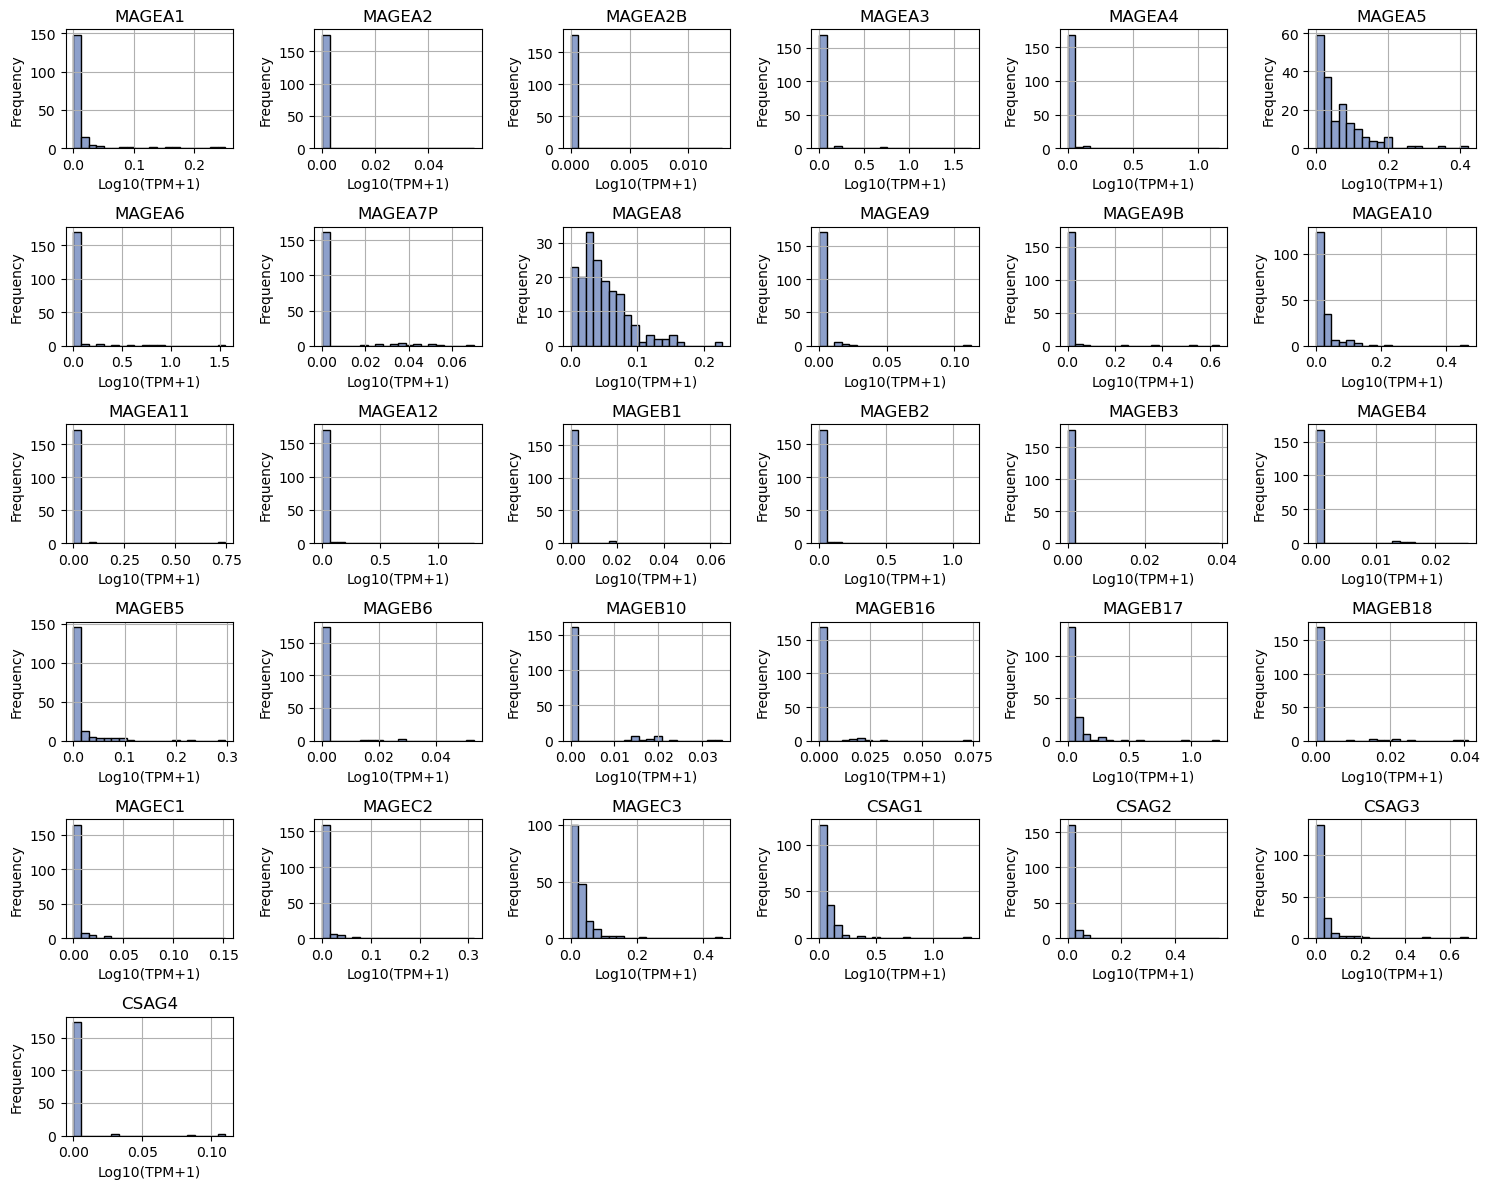

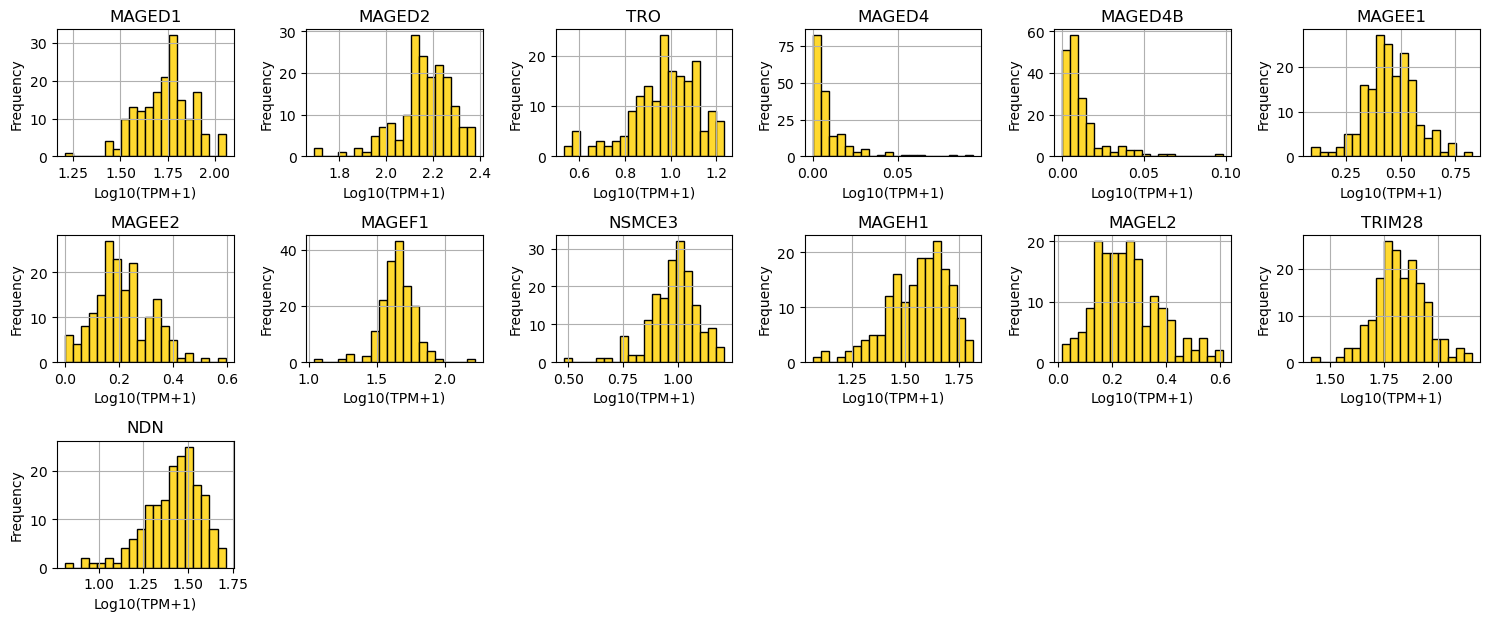

In [13]:
Type1 = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9","MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3","CSAG1", "CSAG2", "CSAG3", "CSAG4"]
Type2 = [ "MAGED1", "MAGED2", "TRO","MAGED4", "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "TRIM28", "NDN"]
plot_gene_histograms_type1(Type1)
plot_gene_histograms_type2(Type2)

<h1><font color="#004D7F" size=4>2.2. Composition of Positive and Negative Tumors by MAGEs.</font></h1>

In [14]:
no_zero = df_numeric.astype(bool).sum(axis=0)
zero = df_numeric.shape[0] - no_zero
# New df to order output
output_df = pd.DataFrame({'Positive_counts': no_zero, 'Negative_counts': zero})
output_df['Total_counts'] = output_df['Positive_counts'] + output_df['Negative_counts']
# Calculate percentages
percentage_df = output_df[['Positive_counts', 'Negative_counts']].div(output_df['Total_counts'], axis=0) * 100
# Concatenate percentages with original DataFrame
output_df = pd.concat([output_df, percentage_df.add_suffix('_percentage')], axis=1)
# Sort DataFrame by column names (alphabetical order)
output_df = output_df.sort_index()
finalTable= output_df[['Positive_counts','Positive_counts_percentage','Negative_counts','Negative_counts_percentage']]
finalTable=finalTable.round(1)
finalTable=finalTable.loc[column_order]
finalTable.to_csv(os.path.join(toData_directory, 'MAGE_PosNeg_Composition.csv'))
finalTable.head(3)

Positive_counts  Positive_counts_percentage  Negative_counts  \
MAGEA1                33                        18.4              146   
MAGEA2                 4                         2.2              175   
MAGEA2B                2                         1.1              177   

         Negative_counts_percentage  
MAGEA1                         81.6  
MAGEA2                         97.8  
MAGEA2B                        98.9

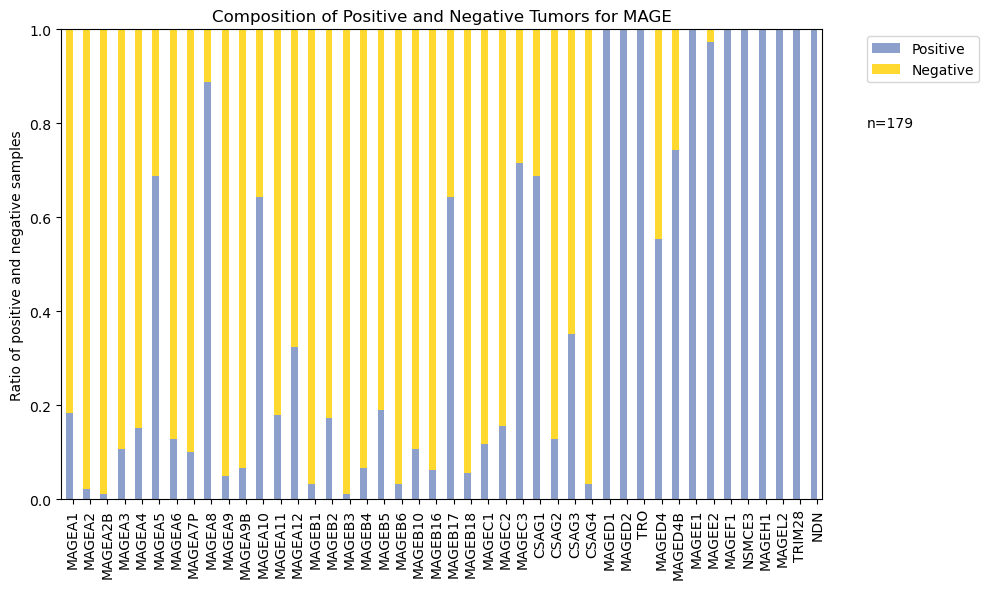

In [15]:
# Normalization
total_counts = no_zero + zero
if total_counts.nunique() == 1:  # Ensures all values are the same
    n = total_counts.iloc[0]
else:
    print("Not all values are the same.")

positive_normalized = no_zero / total_counts
positive_normalized= positive_normalized[column_order]
negative_normalized = zero / total_counts
negative_normalized= negative_normalized[column_order]
# Set colors
colors_pastel = sns.color_palette("Set2")
# Stacked barplot
plt.figure(figsize=(10, 6))
positive_normalized.plot(kind='bar', color=colors_pastel[2], width=0.4, position=1, label='Positive')
negative_normalized.plot(kind='bar', color=colors_pastel[5], width=0.4, position=1, bottom=positive_normalized, label='Negative')
plt.title('Composition of Positive and Negative Tumors for MAGE')
plt.ylabel('Ratio of positive and negative samples')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.text(1.09, 0.8, f'n={n}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig(os.path.join(toPlots_directory, 'MAGE_PosNeg_Composition.png'), dpi=300)
plt.show()

<h1><font color="#004D7F" size=5>3. Analysis </font></h1>

<h1><font color="#004D7F" size=4>3.1 Correlation</font></h1>

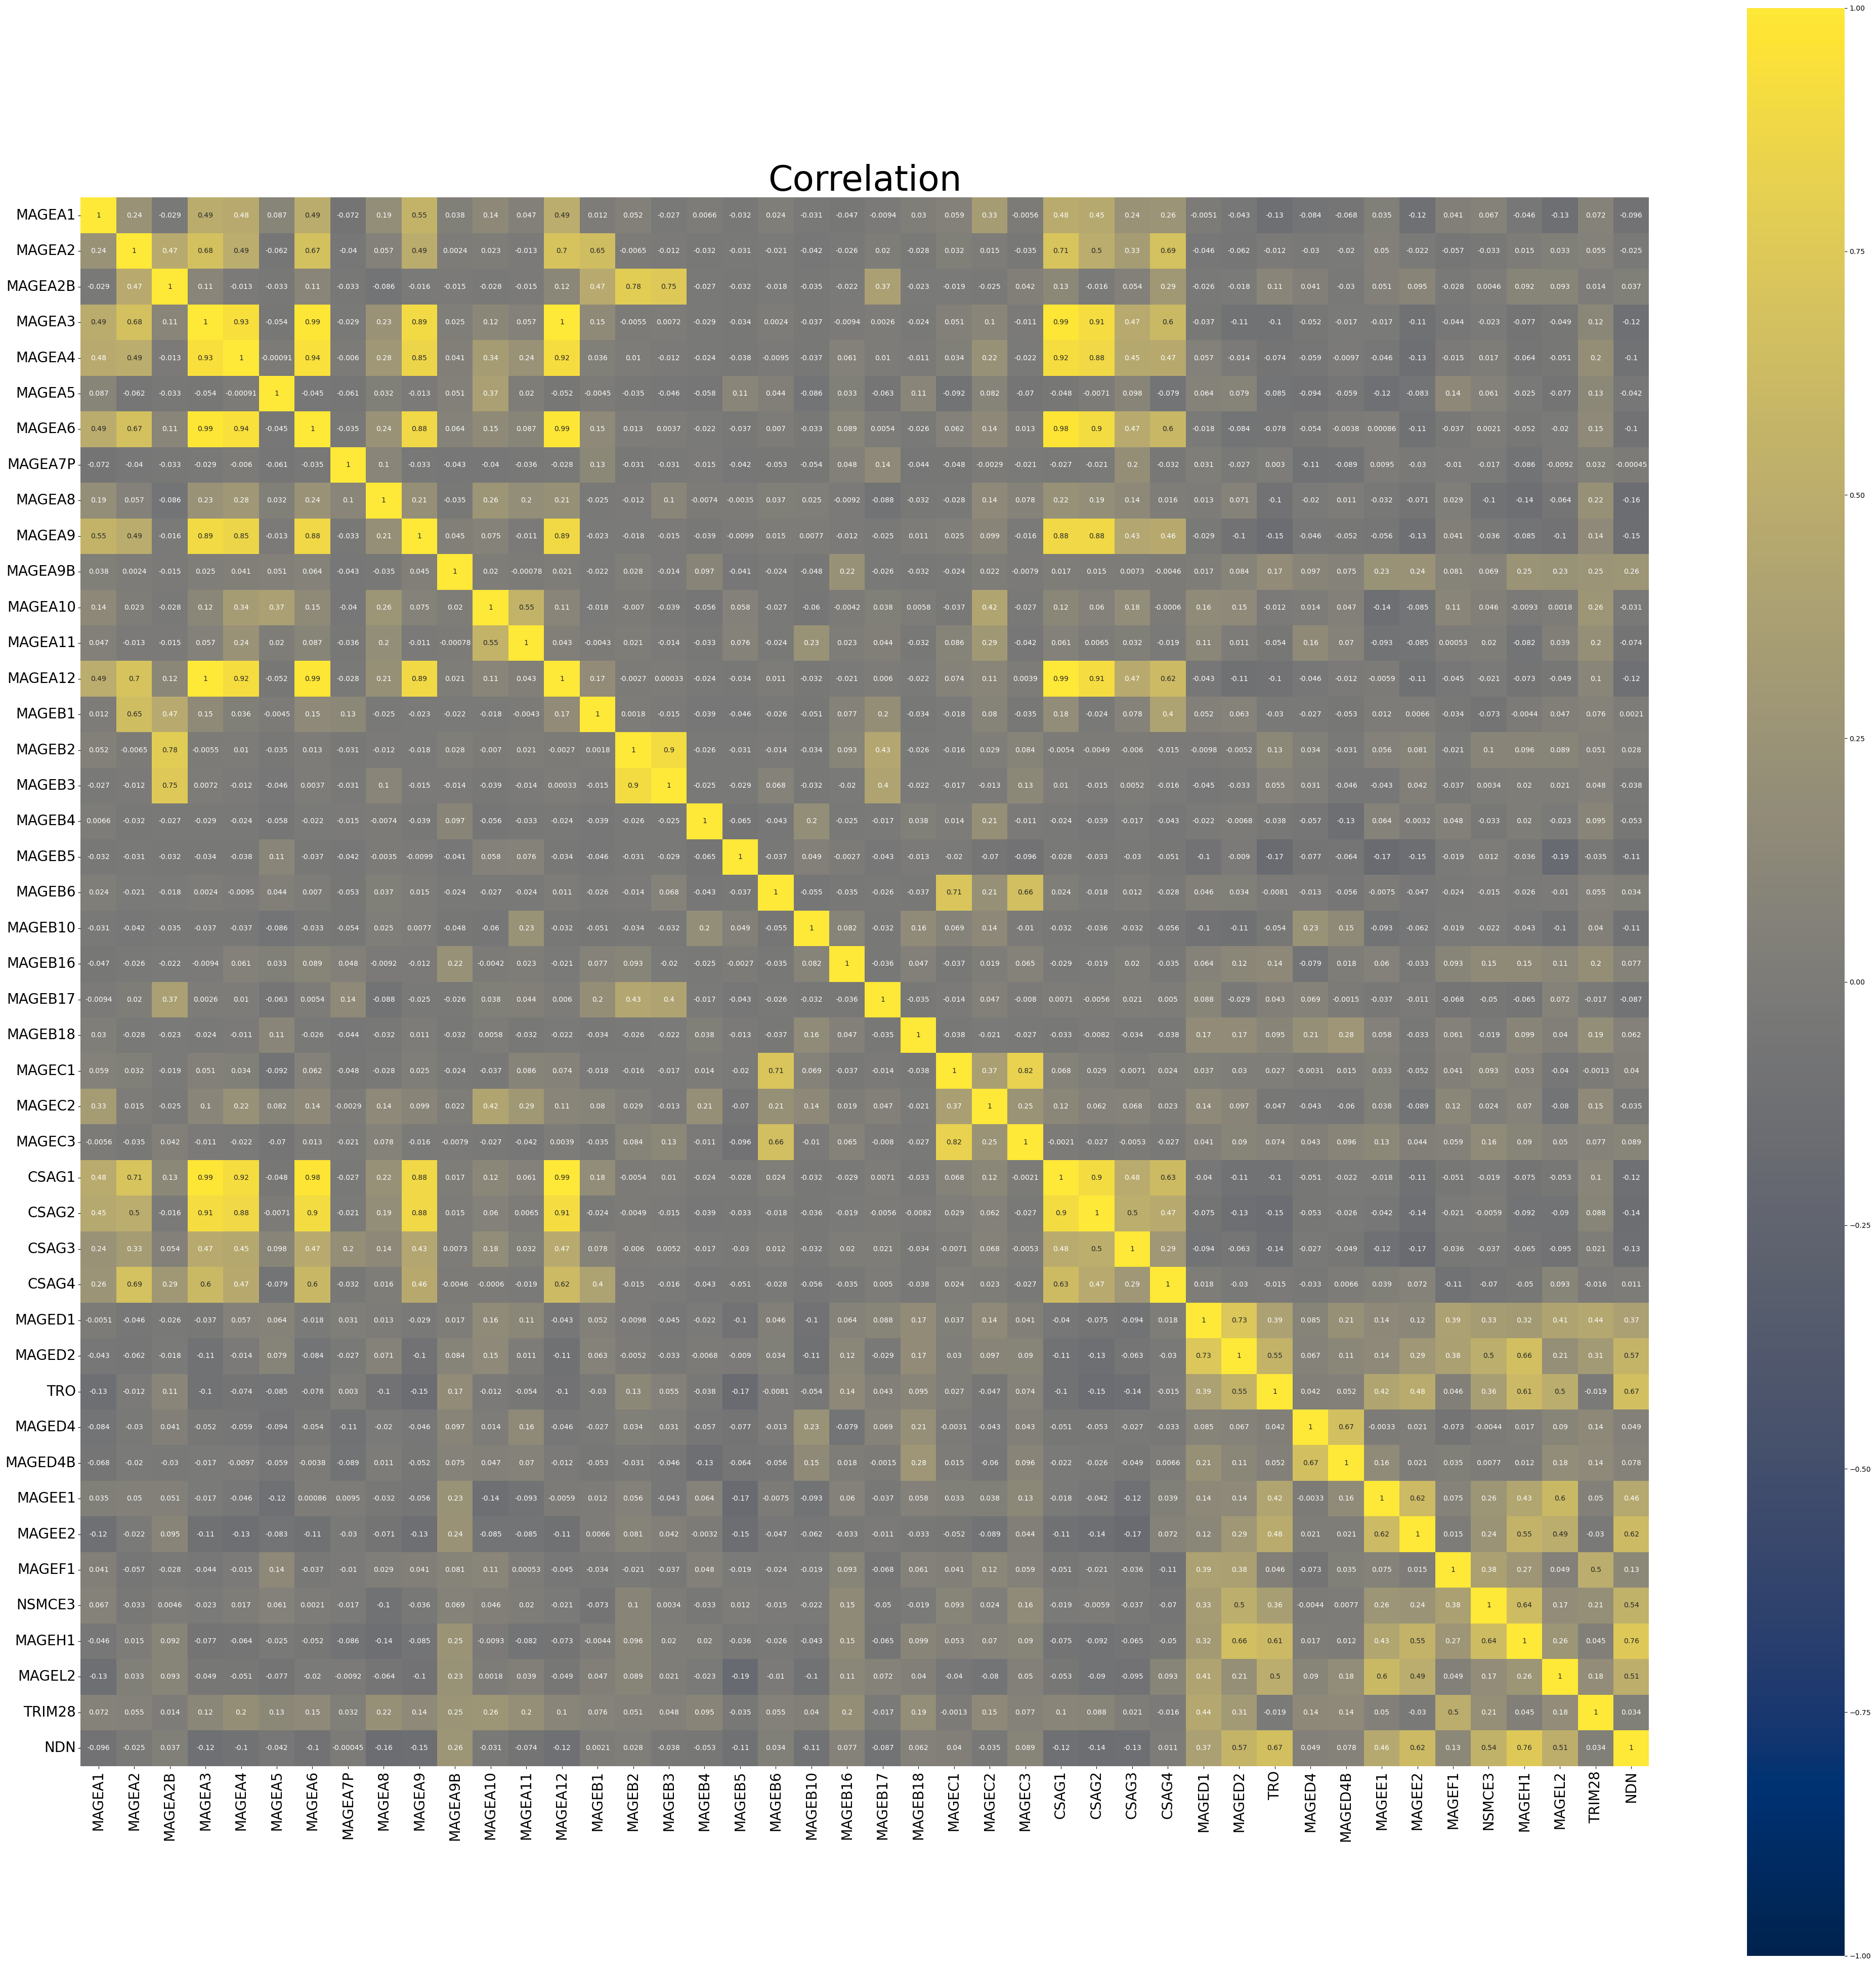

In [16]:
# Perform correlation (Pearson)
correlation = df_numeric.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(correlation, vmax=1, vmin=-1, square=True, annot=True, cmap='cividis')  # Correlations from -1 to 1, change to vmin
correlation.to_csv(os.path.join(toData_directory, 'MAGE_PearsonCorrelation.csv'))
plt.title('Correlation', fontsize=50)  # Increase title font size
plt.xticks(rotation=90)  # Rotate X labels to 90 degrees
plt.yticks(rotation=0)  # Rotate Y labels to default (0 degrees)
# Increase font size of tick labels
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(toPlots_directory, 'MAGE_PearsonCorrelation_heatmap.png'), dpi=300)
plt.show()

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    '''Get top absolute correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df, n=5):
    '''Get bottom absolute correlations'''
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

def get_all_abs_correlations(df):
    '''Get all absolute correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [18]:
numberCorr=int(input("Enter number of top/bottom correlations to be displayed: "))

Enter number of top/bottom correlations to be displayed: 30


In [19]:
# Print and save top correlations
print('Top of correlations')
topabs = get_top_abs_correlations(df_numeric, numberCorr)
print(topabs)
topabs.to_csv(os.path.join(toData_directory, f'Top_{numberCorr}_Correlation.csv'))

# Print and save bottom correlations
print('\nBottom of correlations')
botabs = get_bottom_abs_correlations(df_numeric, numberCorr)
print(botabs)
botabs.to_csv(os.path.join(toData_directory, f'Bot_{numberCorr}_Correlation.csv'))

Top of correlations
MAGEA3   MAGEA12    0.995670
MAGEA12  CSAG1      0.994689
MAGEA3   CSAG1      0.991418
         MAGEA6     0.988256
MAGEA6   MAGEA12    0.987234
         CSAG1      0.983588
MAGEA4   MAGEA6     0.940109
MAGEA3   MAGEA4     0.930412
MAGEA4   CSAG1      0.920020
         MAGEA12    0.919883
MAGEA3   CSAG2      0.910671
MAGEA12  CSAG2      0.908842
MAGEB2   MAGEB3     0.903880
CSAG1    CSAG2      0.903476
MAGEA6   CSAG2      0.900357
MAGEA3   MAGEA9     0.891325
MAGEA9   MAGEA12    0.890469
         CSAG2      0.881362
MAGEA6   MAGEA9     0.880158
MAGEA9   CSAG1      0.878691
MAGEA4   CSAG2      0.877971
         MAGEA9     0.854609
MAGEC1   MAGEC3     0.820476
MAGEA2B  MAGEB2     0.783106
MAGEH1   NDN        0.755952
MAGEA2B  MAGEB3     0.753885
MAGED1   MAGED2     0.730936
MAGEB6   MAGEC1     0.711688
MAGEA2   CSAG1      0.706698
         MAGEA12    0.699457
dtype: float64

Bottom of correlations
MAGEB5   MAGEL2    -0.191809
         MAGEE1    -0.174050
CSAG3    MAGE

<h1><font color="#004D7F" size=4>3.2 Cutoffs generation</font></h1>

<h1><font color="#004D7F" size=4>3.2.1. Specific Gene</font></h1>

In [20]:
def plot_results(sorted_df, genes, value, optimal_cutoff, sample_names):
    plt.figure(figsize=(20, 6))
    plt.bar(range(len(sorted_df[genes[0]])), np.log10(sorted_df[genes[0]] + 1), label='Expression values', color='skyblue')

    # Plot lines at the points where the curve intersects the X-axis for PosNegCriteria and cutoff_value
    posneg_criteria_value = np.log10(value+1)
    plt.axhline(y=posneg_criteria_value, color='g', linestyle='--', label='PosNegCriteria')
    
    intersect_x_posneg = None
    intersect_y_posneg = None
    intersect_x_optimal = None
    intersect_y_optimal = None

    if optimal_cutoff is not None:
        plt.axhline(y=np.log10(optimal_cutoff+1), color='b', linestyle='--', label='Optimal Cutoff')
        # Find the index where the horizontal line intersects with the data for PosNegCriteria
        intersect_index_posneg = np.argmin(np.abs(np.log10(sorted_df[genes[0]]+1) - posneg_criteria_value))
        intersect_x_posneg = intersect_index_posneg
        intersect_y_posneg = np.log10(sorted_df.iloc[intersect_index_posneg][genes[0]] + 1)
        # Find the index where the horizontal line intersects with the data for Optimal Cutoff
        intersect_index_optimal = np.argmin(np.abs(np.log10(sorted_df[genes[0]]+1) - np.log10(optimal_cutoff+1)))
        intersect_x_optimal = intersect_index_optimal
        intersect_y_optimal = np.log10(sorted_df.iloc[intersect_index_optimal][genes[0]] + 1)
        # Plot vertical lines at the intersection points
        plt.axvline(x=intersect_x_optimal, color='m', linestyle='-', label='Optimal Cutoff for high/medium expressed')
    
    if intersect_x_posneg is not None:
        plt.axvline(x=intersect_x_posneg, color='r', linestyle='-', label='Cutoff to Positive Negative')
        
    plt.title(f"Expression classification according with {genes[0]}", fontsize=14)
    plt.xlabel('Samples ID')
    plt.ylabel('Log10(TPM+1)')
    plt.xticks(range(len(sample_names)), sample_names, rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(toPlotsCutoff_directory, f"Cutoff_Generation_{genes}-gene_barplot.png"), dpi=300)  # Save as PNG with high quality
    plt.show()

def find_optimal_cutoff(df, genes, value):
    # Select only the columns corresponding to the genes
    df_subset = df[genes]
    # Drop rows under positive/negative threshold
    df_subset = df_subset[(df_subset > value).any(axis=1)].dropna()
    # Fit an exponential distribution to the data
    params = expon.fit(df_subset.values.ravel())
    # Generate samples from the fitted distribution
    samples = expon.rvs(*params, size=10000)
    # Cluster the samples using DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(samples.reshape(-1, 1))
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Finding optimal cutoff...")
    # Check if there are at least two clusters
    if len(unique_labels) >= 2:
        # Sort clusters by size
        sorted_clusters = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
        # Calculate the difference between the means of the two largest clusters
        cluster1_indices = np.where(labels == sorted_clusters[0][0])[0]
        cluster2_indices = np.where(labels == sorted_clusters[1][0])[0]
        cluster1_mean = np.mean(samples[cluster1_indices])
        cluster2_mean = np.mean(samples[cluster2_indices])
        diff = np.abs(cluster1_mean - cluster2_mean)
        # Update optimal cutoff and optimal difference if difference is maximized
        optimal_cutoff = np.min([cluster1_mean, cluster2_mean])
        optimal_diff = diff
        optimal_labels = labels
        min_input = np.min(df_subset)
        max_input = np.max(df_subset)
    else:
        print("No optimal cutoff found greater than PosNegCriteria. Returning default values.")
        optimal_cutoff = None
        optimal_diff = None
        optimal_labels = None
    return optimal_cutoff, optimal_diff, optimal_labels, None

In [22]:
GeneName=input("Enter a Gene-name to be evaluated: ")
PosNegCriteria=float(input("Enter a cut-off value to separate positive and negative tumors: "))

Enter a Gene-name to be evaluated: MAGEA8
Enter a cut-off value to separate positive and negative tumors: 0



Processing MAGEA8
Attempt 1:
Finding optimal cutoff...


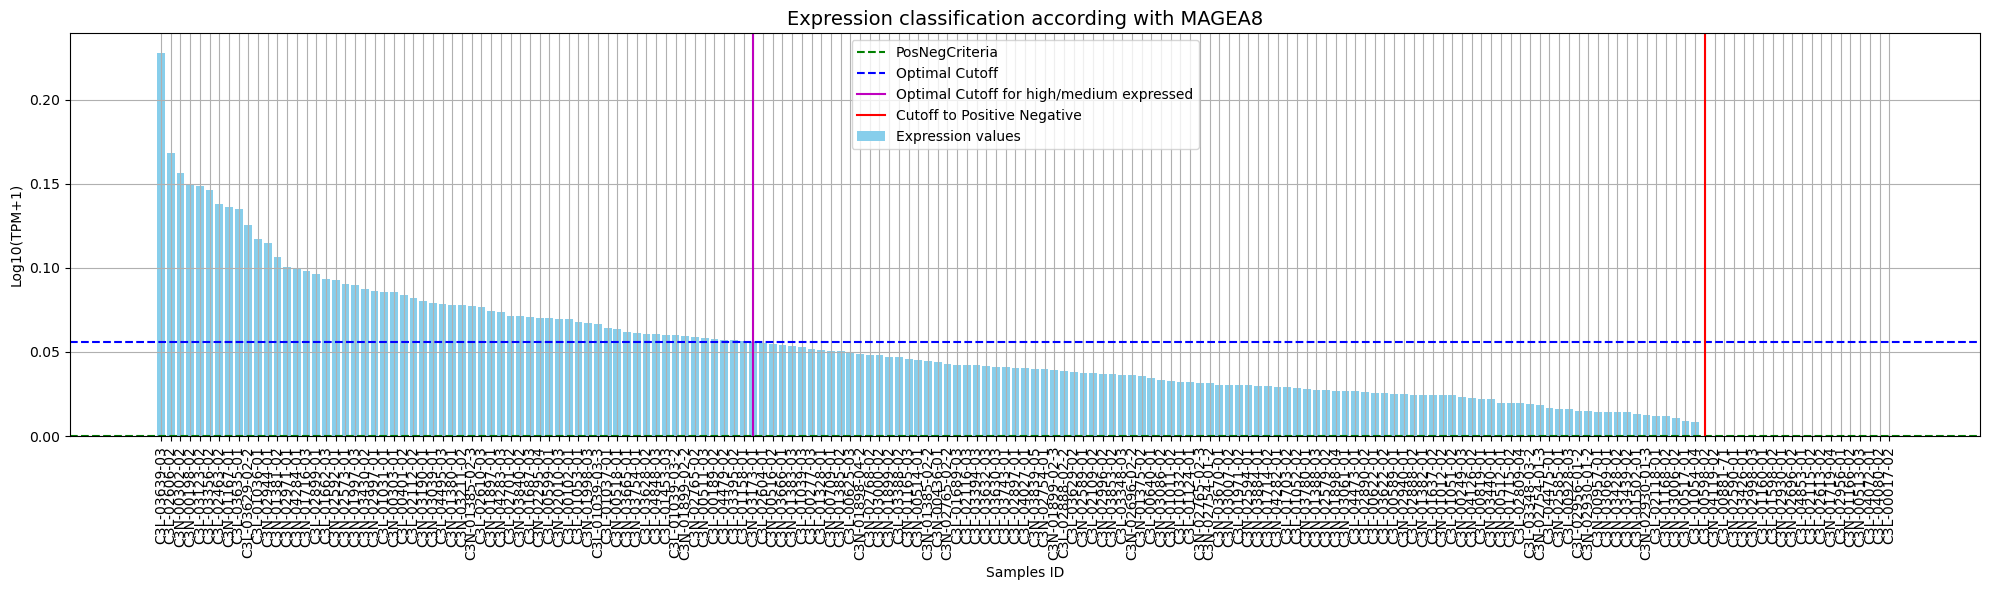

                                            MAGEA8
Parameter                                         
TPM Positive/Negative threshold           0.000000
log10(TPM+1) Positive/Negative threshold  0.000000
Optimal cutoff value                      0.137240
Normalized                                0.055852


In [23]:
# Define the number of attempts
max_attempts = 10
attempt = 1
print(f"\nProcessing {GeneName}")
while attempt <= max_attempts:
    print(f"Attempt {attempt}:")
    cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff(df_numeric, [GeneName], PosNegCriteria)
    
    if cutoff_value is not None and cutoff_value != -1:
        log10_PosNegCriteria = np.log10(PosNegCriteria + 1)
        normalized_cutoff_value = np.log10(cutoff_value + 1)    
        # Sort dataframe based on the selected gene in descending order
        sorted_df = df_numeric.sort_values(by=[GeneName][0], ascending=False)
        sample_names = sorted_df.index  # Extract sample names from index
        plot_results(sorted_df, [GeneName], PosNegCriteria, cutoff_value, sample_names)    
        break  # Exit the loop if a valid cutoff value is found
    else:
        print("Optimal cutoff value not found or equal to -1. Retrying...")
        attempt += 1

# If no valid cutoff value is found within max_attempts, handle accordingly
if attempt > max_attempts:
    print("Maximum attempts reached. Unable to find a valid cutoff value.")
    log10_PosNegCriteria = None
    normalized_cutoff_value = None
    optimal_cutoff = None
    # Sort dataframe based on the selected gene in descending order
    sorted_df = df_numeric.sort_values(by=[GeneName][0], ascending=False)
    sample_names = sorted_df.index  # Extract sample names from index
    plot_results(sorted_df, [GeneName], PosNegCriteria, optimal_cutoff, sample_names)
    
# Create a dictionary with the values
data = {
    "TPM Positive/Negative threshold": [PosNegCriteria],
    "log10(TPM+1) Positive/Negative threshold": [log10_PosNegCriteria],
    "Optimal cutoff value": [cutoff_value],
    "Normalized": [normalized_cutoff_value]
}

# Convert the dictionary into a DataFrame
result_df = pd.DataFrame(data)
# Transpose the DataFrame
result_df = result_df.transpose()
# Rename the column and set the index name
result_df.columns = [GeneName]
result_df.index.name = "Parameter"
result_df.to_csv(os.path.join(toDataCutoff_directory, f'OptimalCutoff_{GeneName}.csv'))
#Print the DataFrame
print(result_df)

<h1><font color="#004D7F" size=4>3.2.2. All set of Genes</font></h1>


Processing MAGEA1
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...


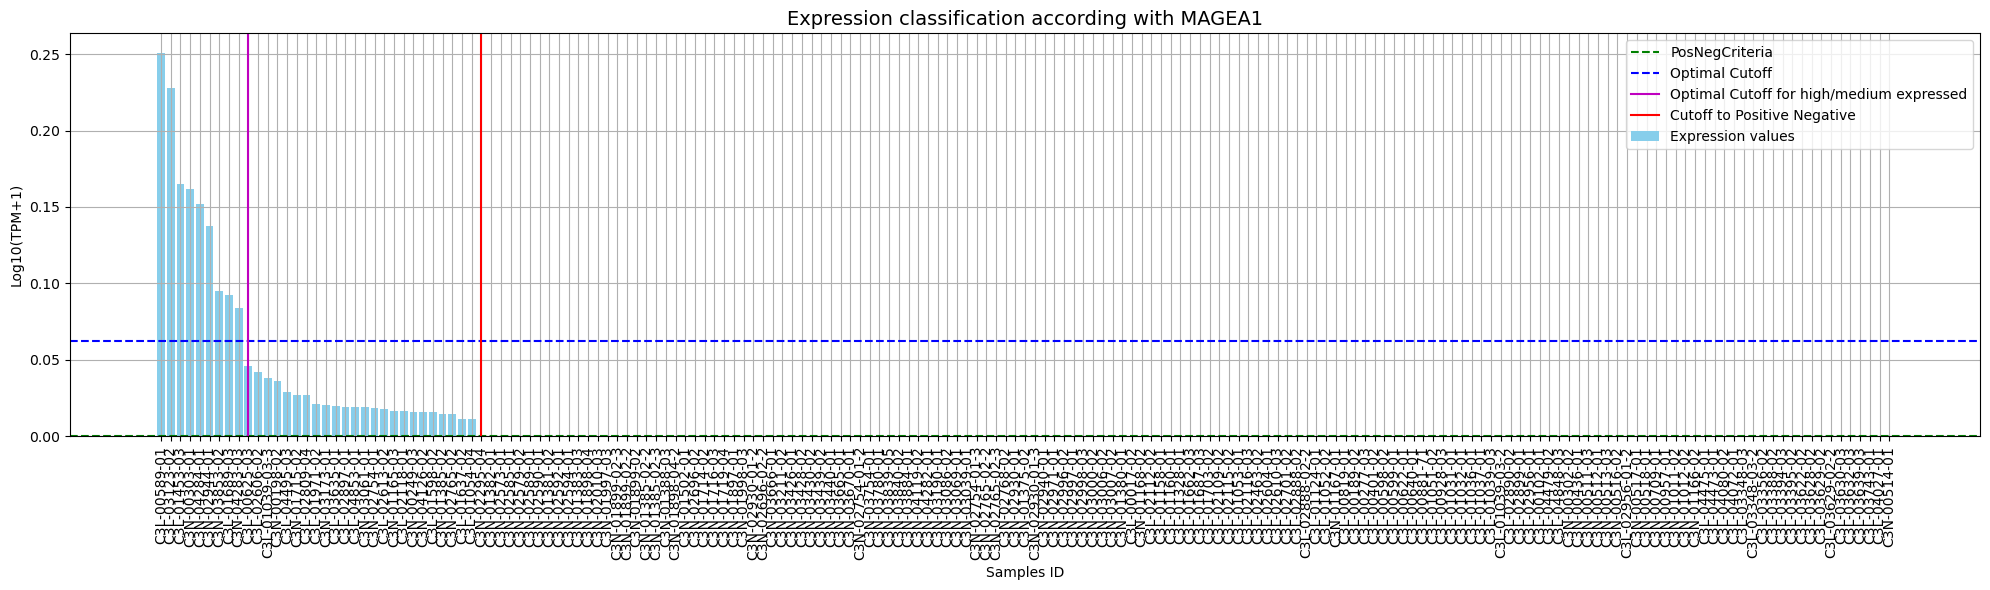


Processing MAGEA2
Attempt 1:
Finding optimal cutoff...


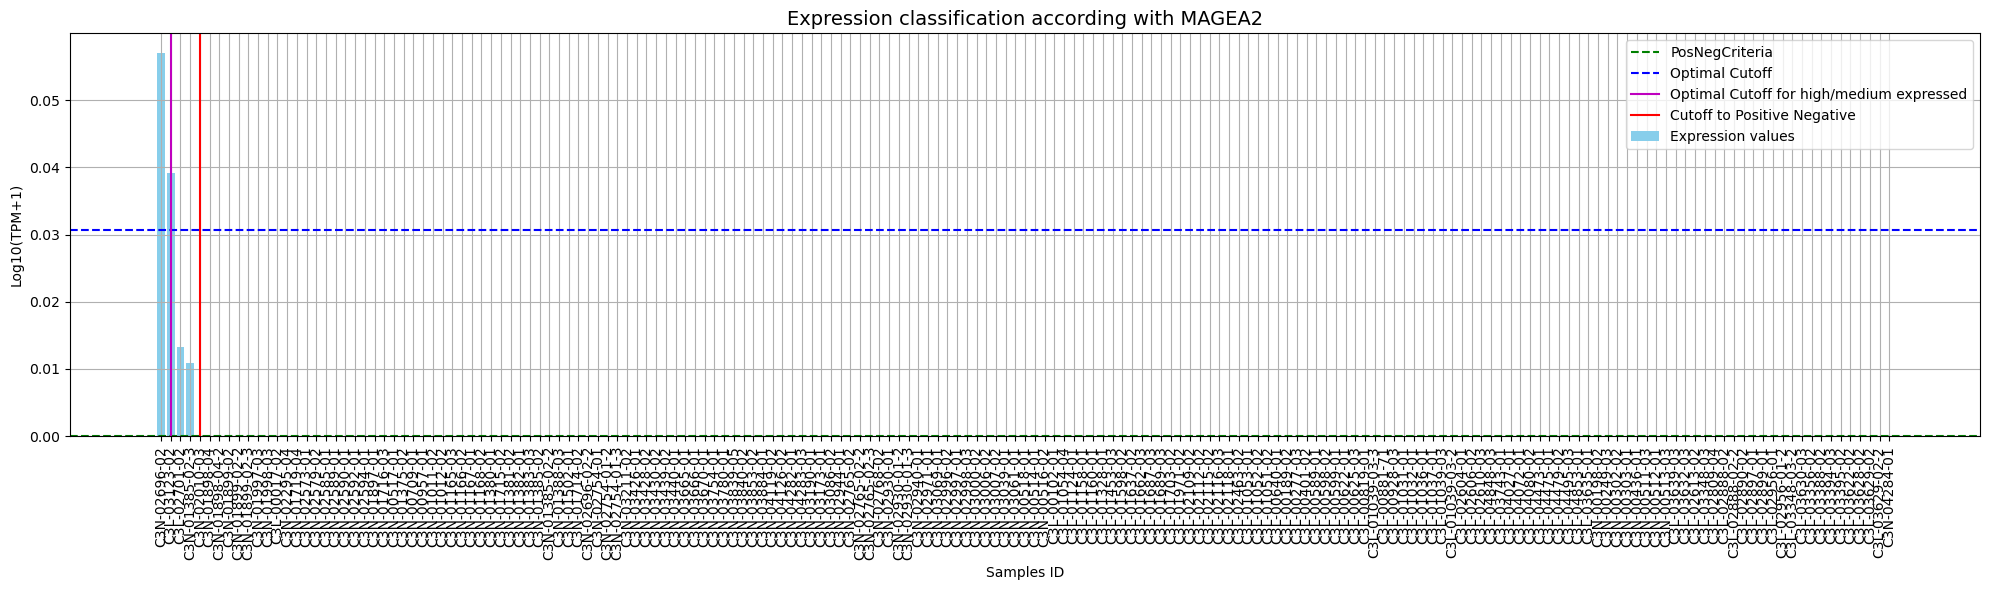


Processing MAGEA2B
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defau

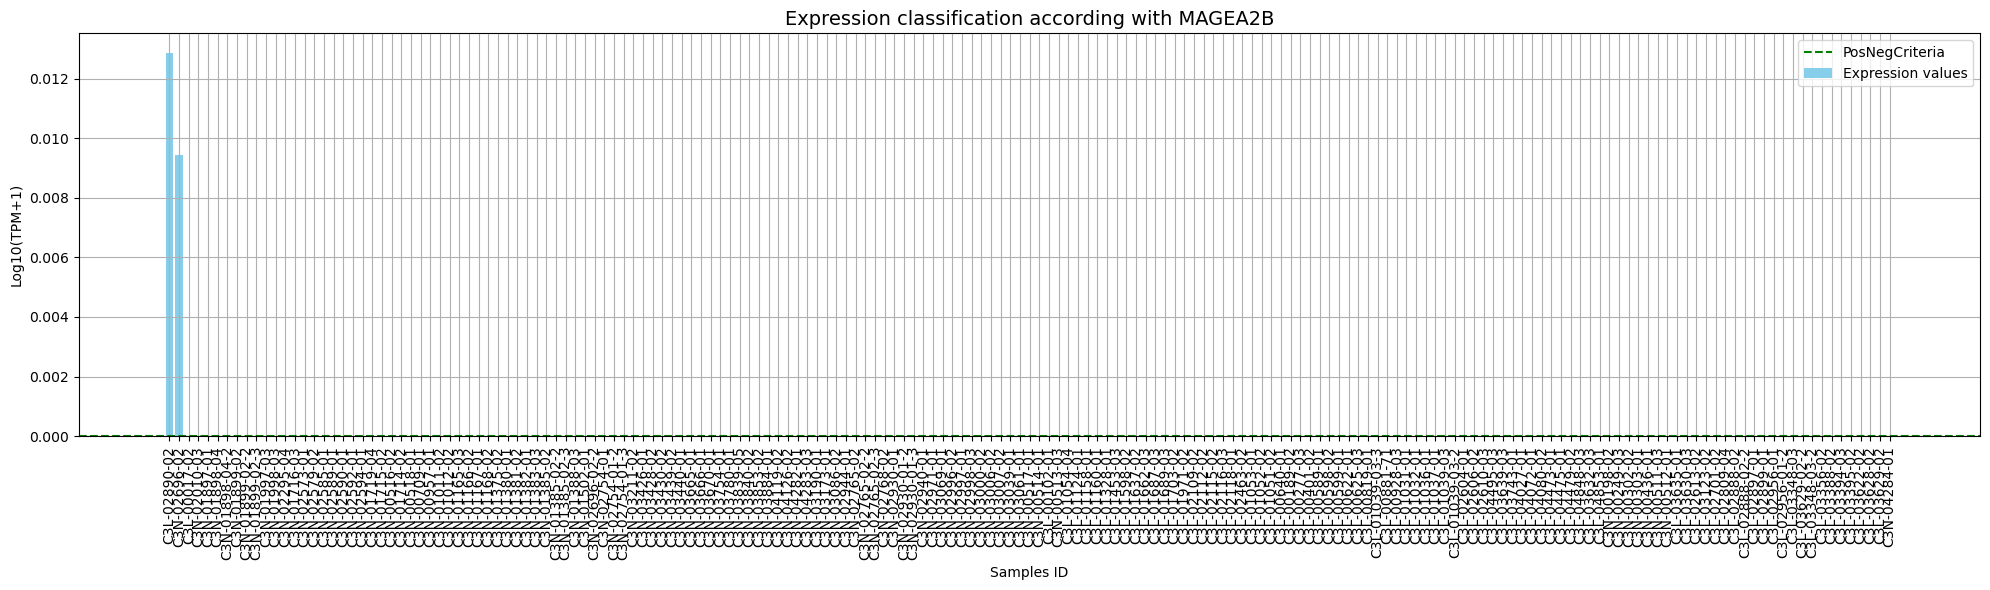


Processing MAGEA3
Attempt 1:
Finding optimal cutoff...


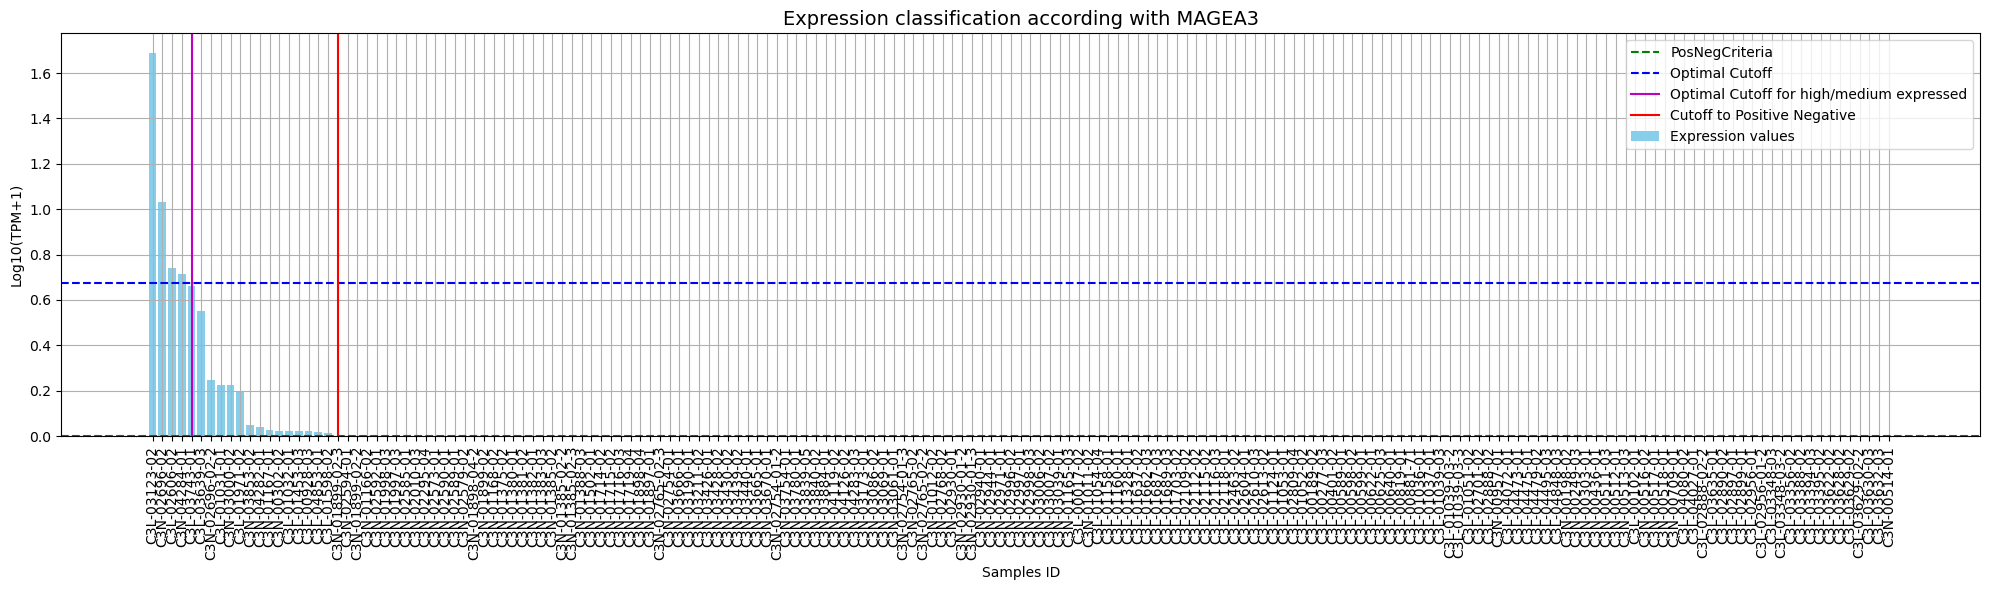


Processing MAGEA4
Attempt 1:
Finding optimal cutoff...


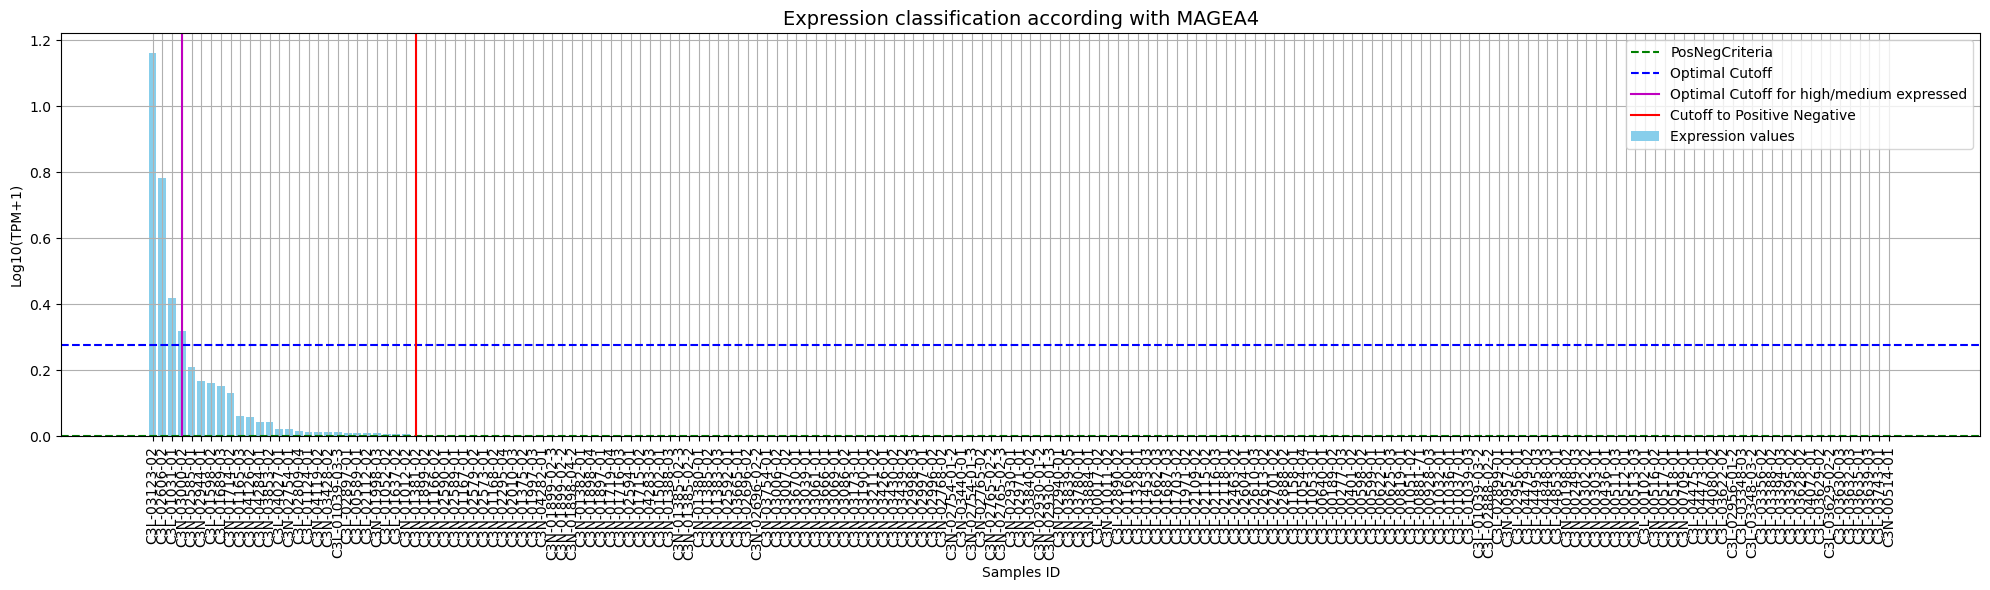


Processing MAGEA5
Attempt 1:
Finding optimal cutoff...


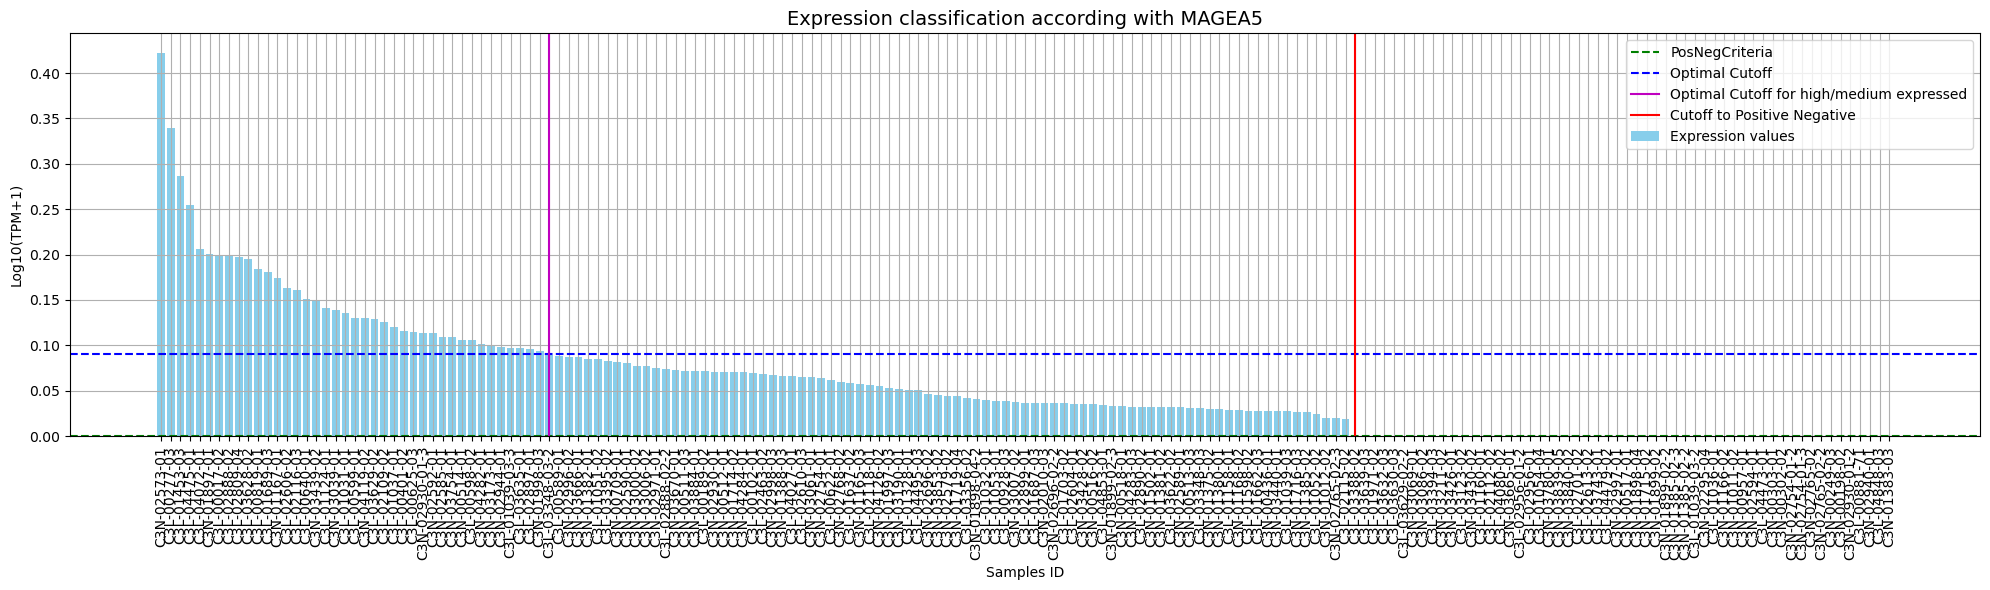


Processing MAGEA6
Attempt 1:
Finding optimal cutoff...


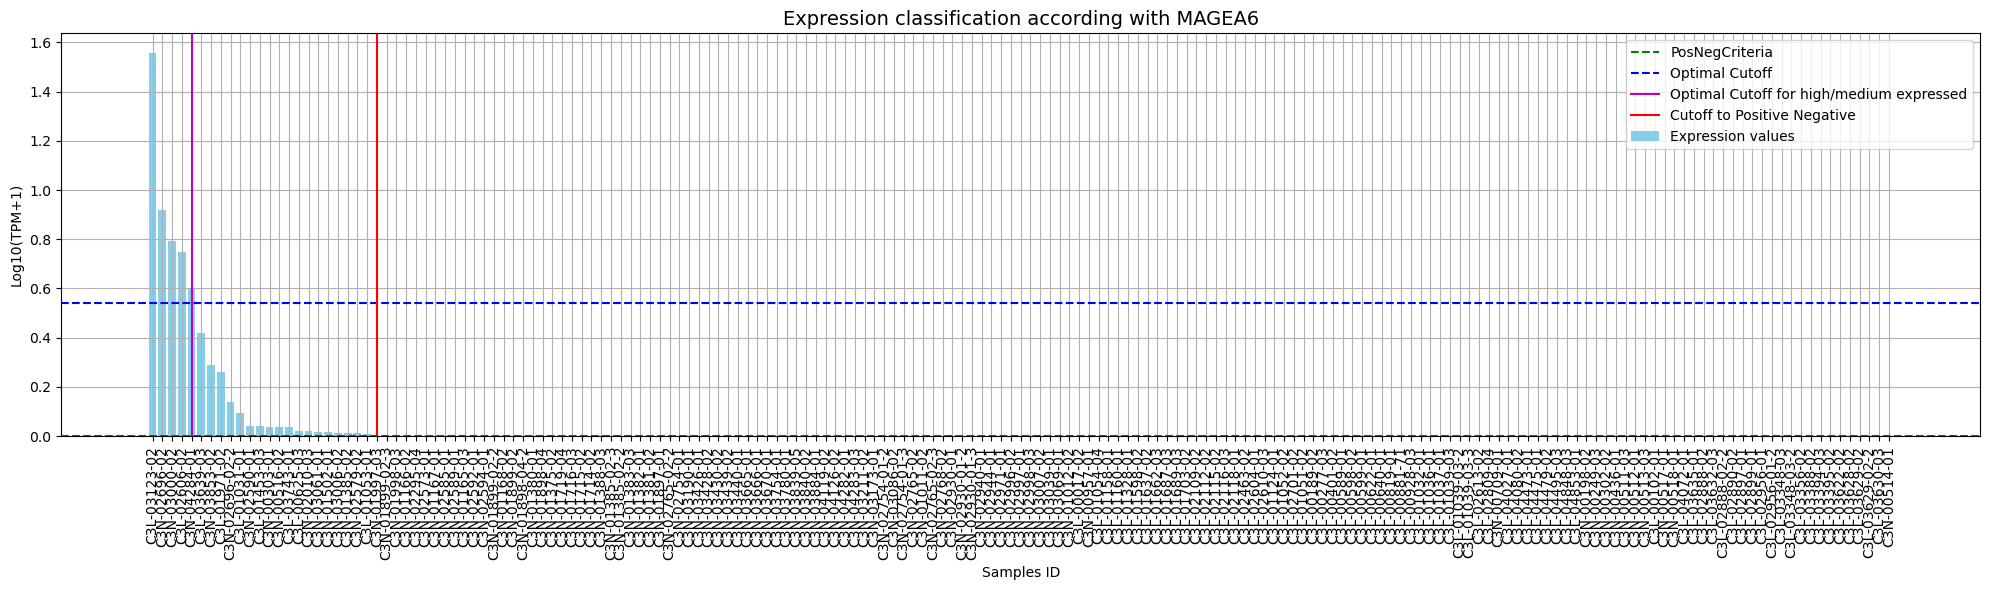


Processing MAGEA7P
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...


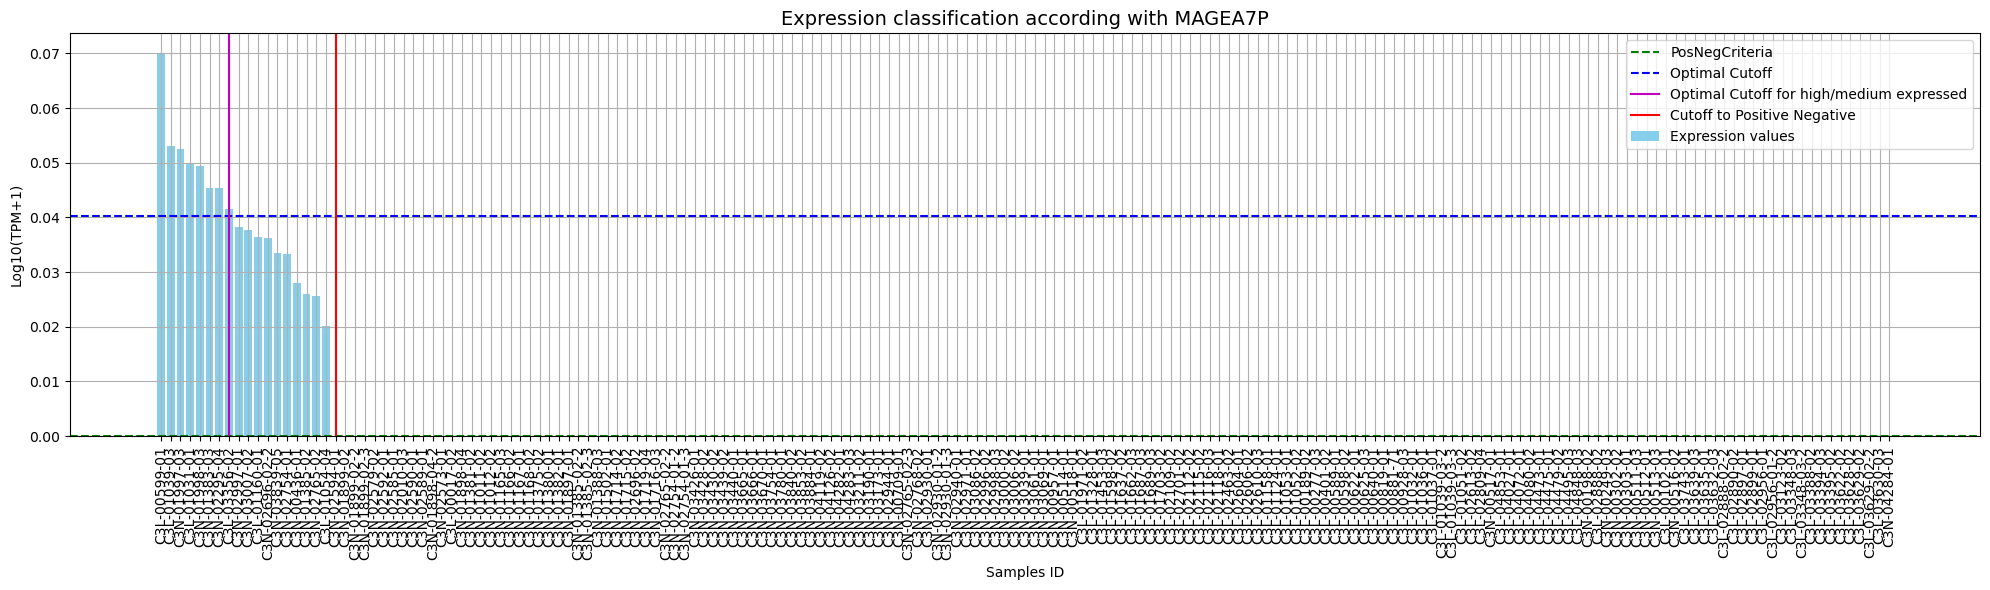


Processing MAGEA8
Attempt 1:
Finding optimal cutoff...


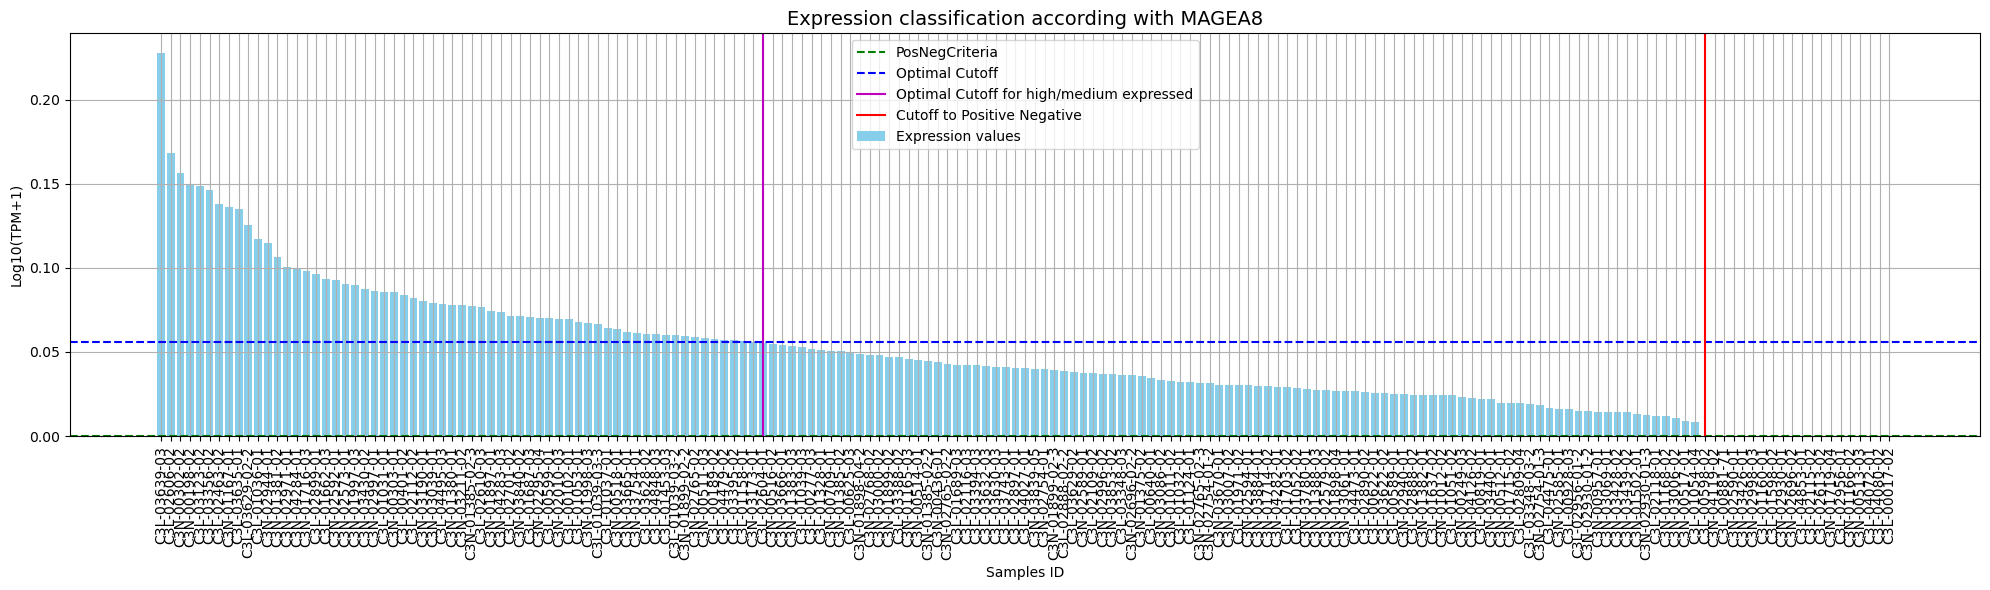


Processing MAGEA9
Attempt 1:
Finding optimal cutoff...


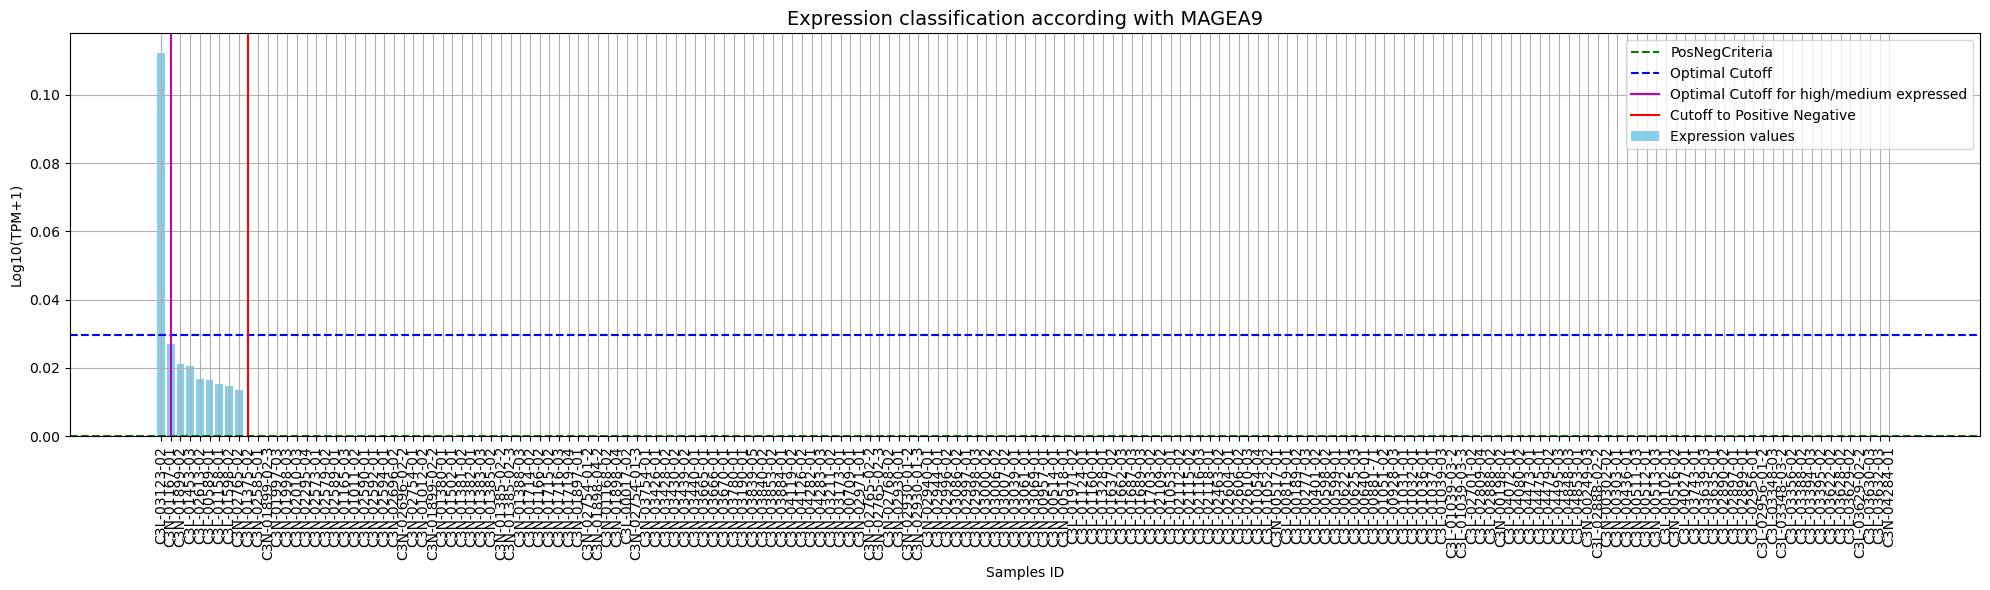


Processing MAGEA9B
Attempt 1:
Finding optimal cutoff...


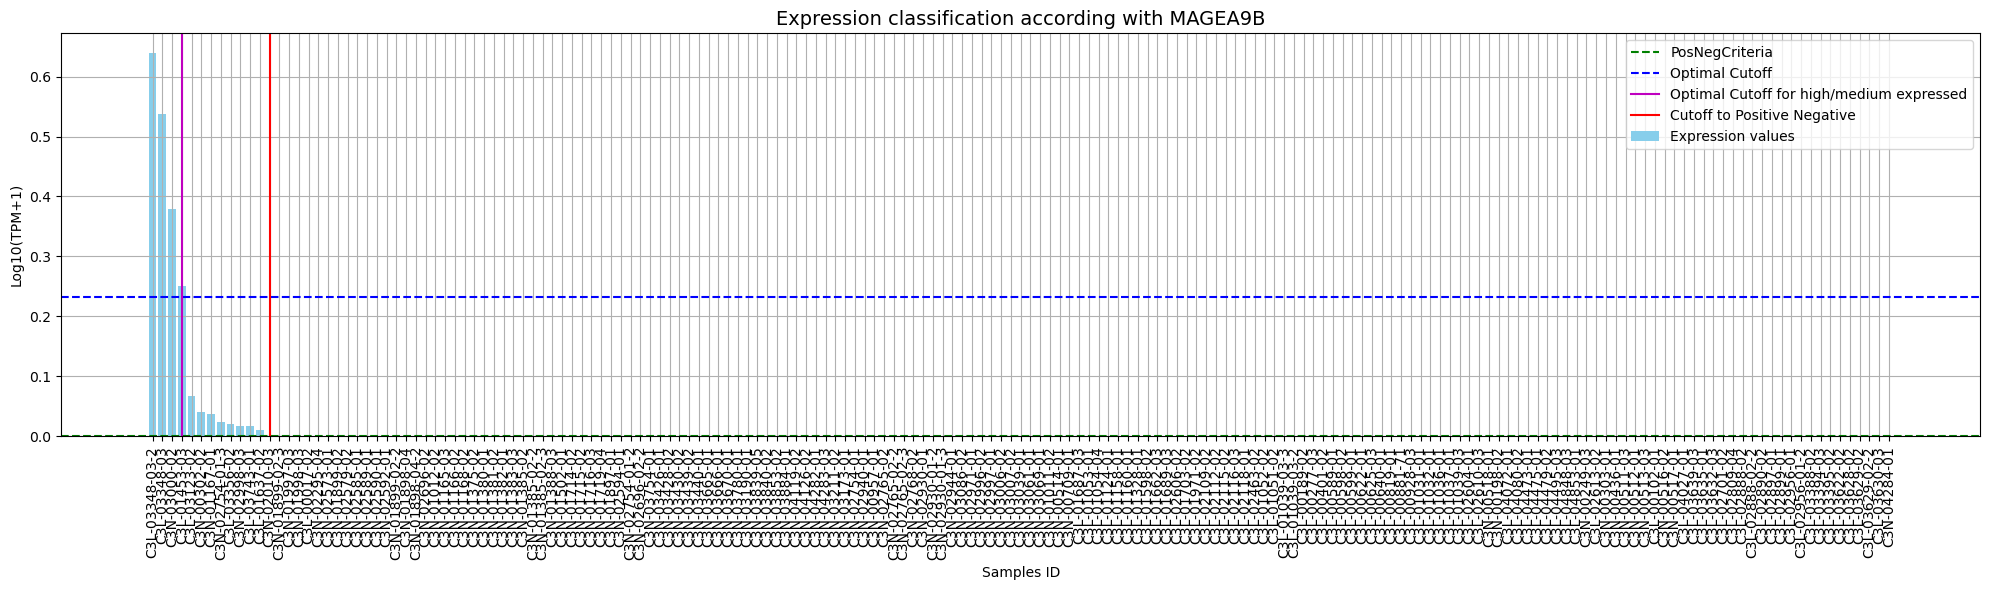


Processing MAGEA10
Attempt 1:
Finding optimal cutoff...


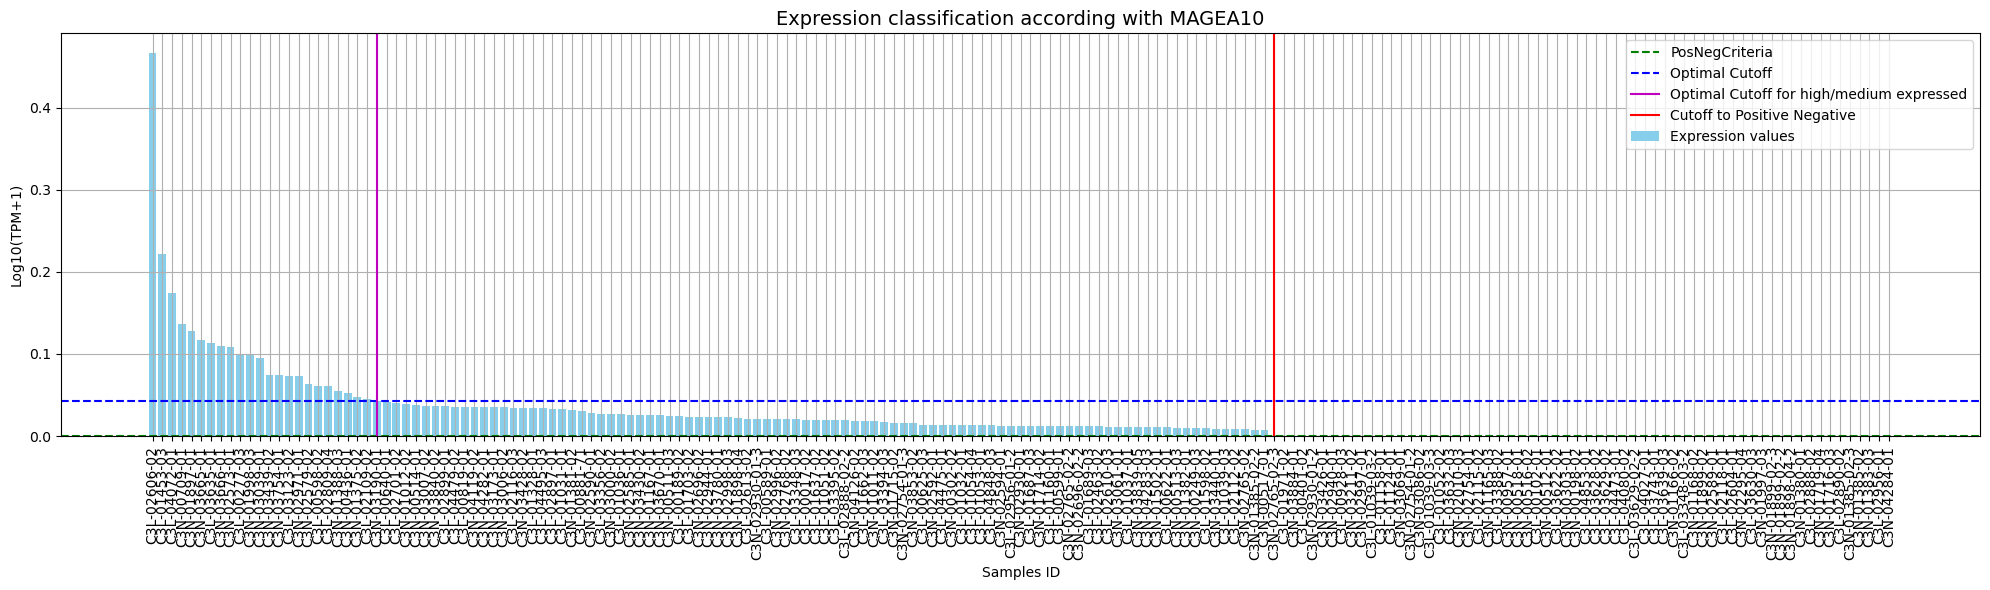


Processing MAGEA11
Attempt 1:
Finding optimal cutoff...


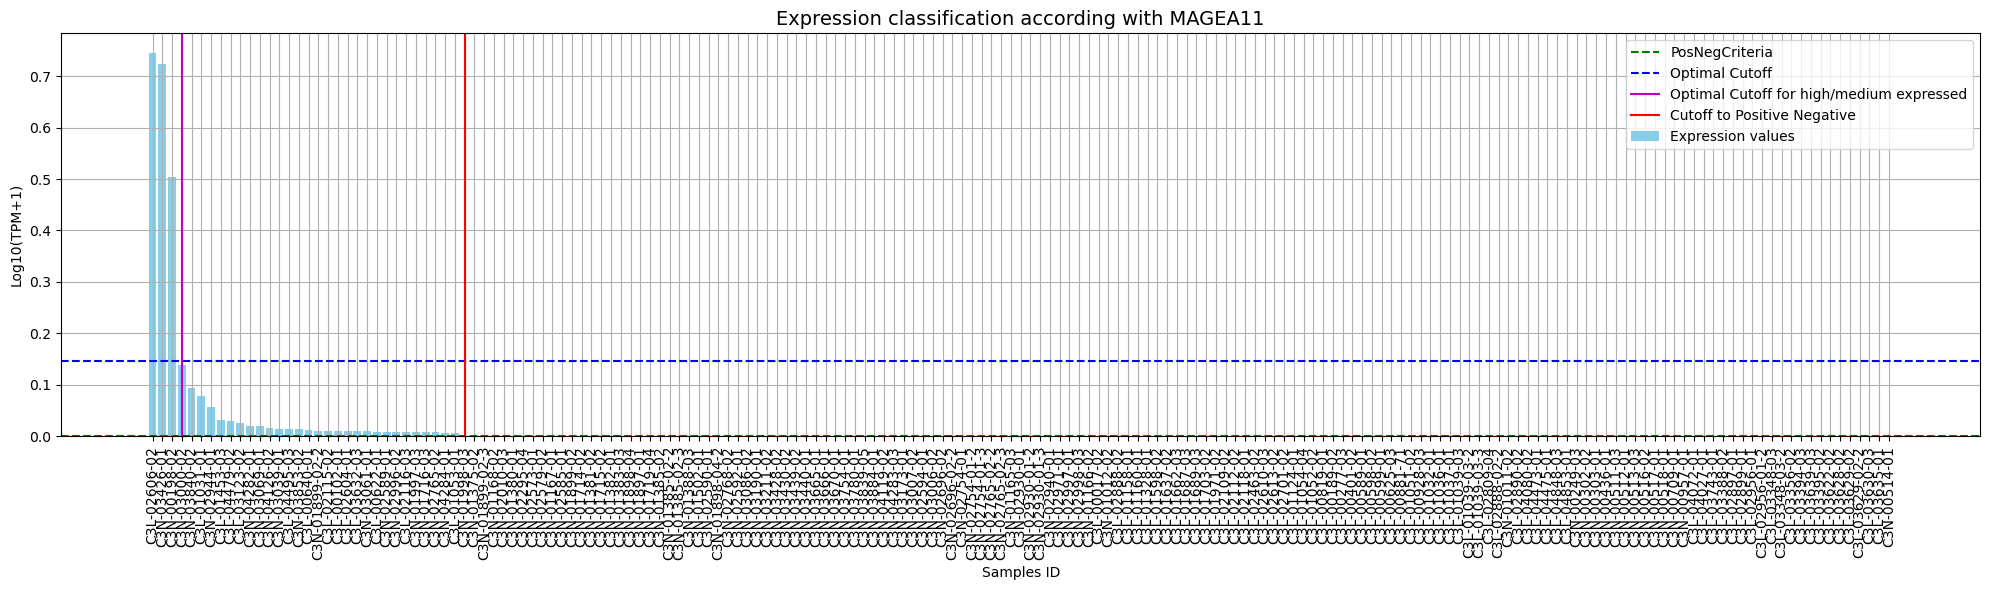


Processing MAGEA12
Attempt 1:
Finding optimal cutoff...


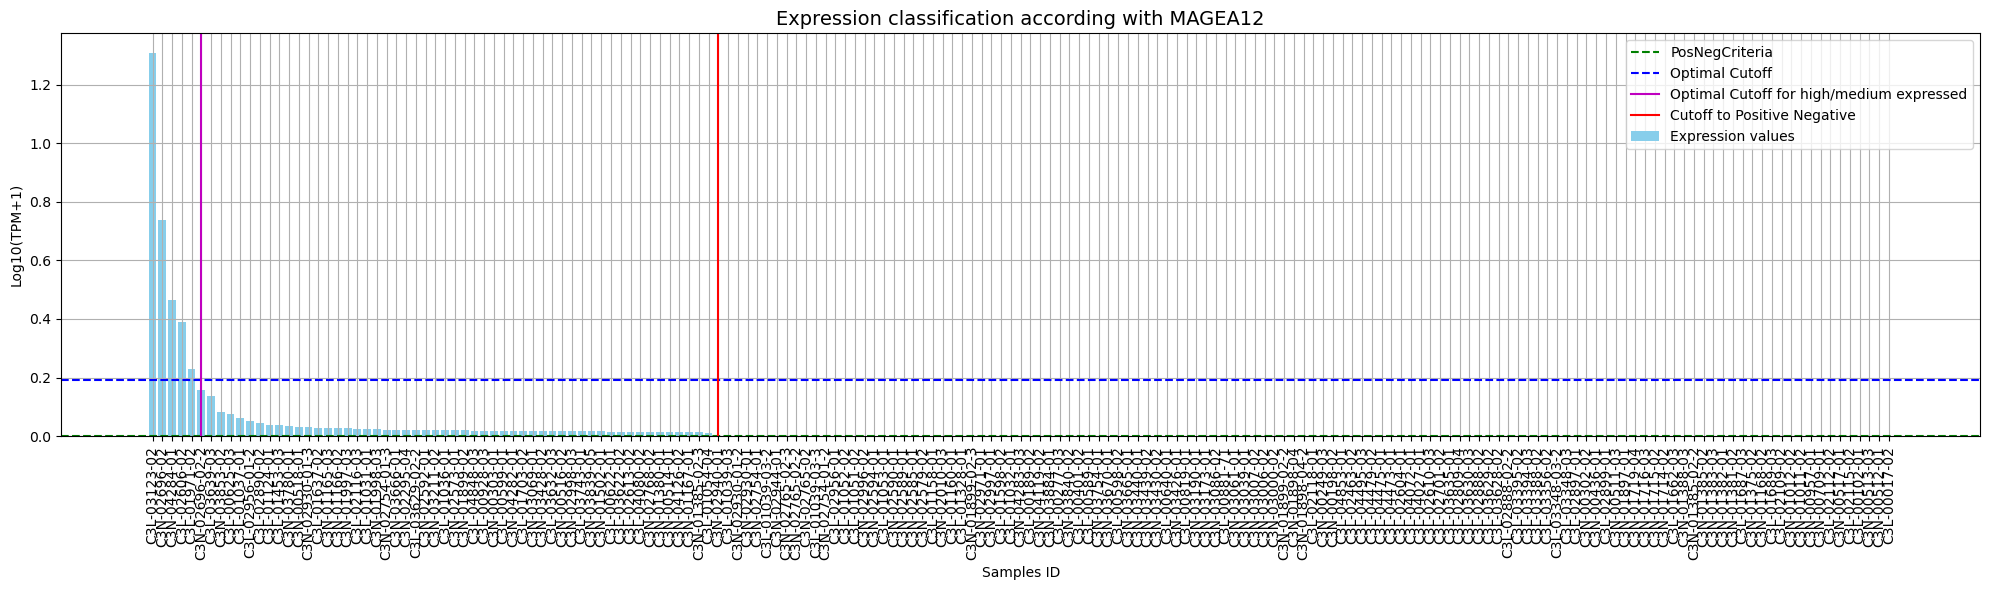


Processing MAGEB1
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...


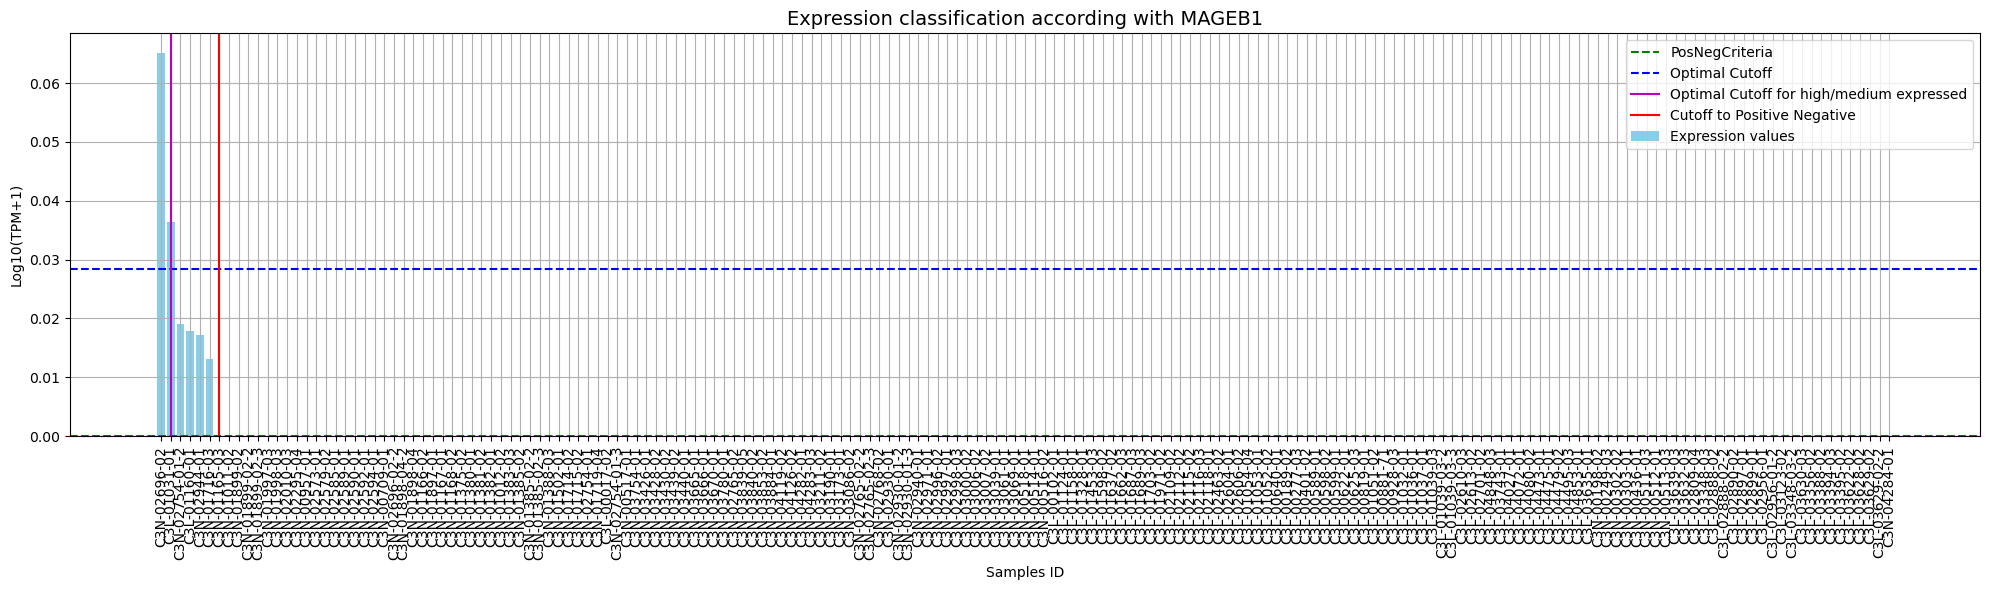


Processing MAGEB2
Attempt 1:
Finding optimal cutoff...


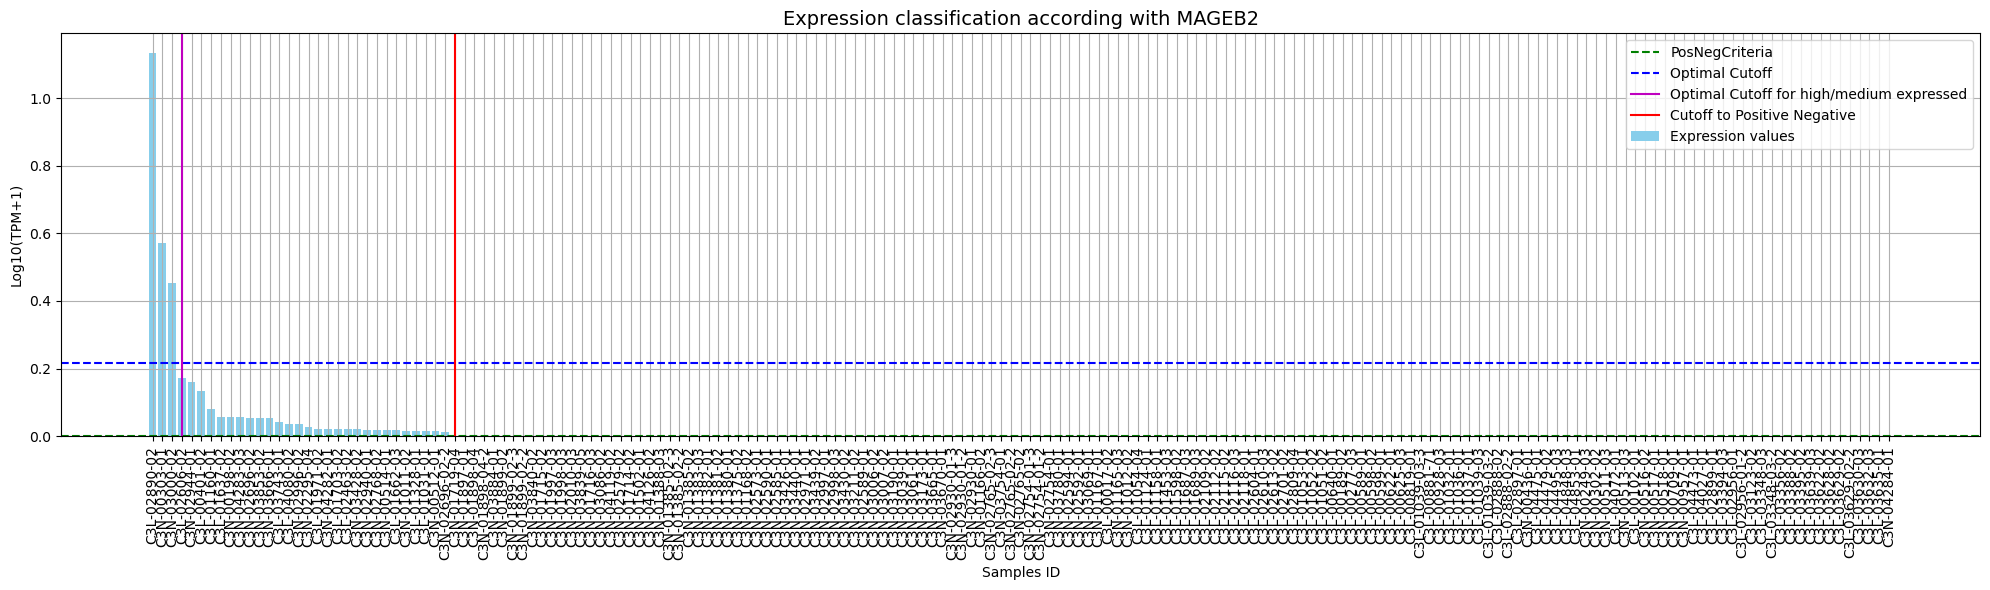


Processing MAGEB3
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defaul

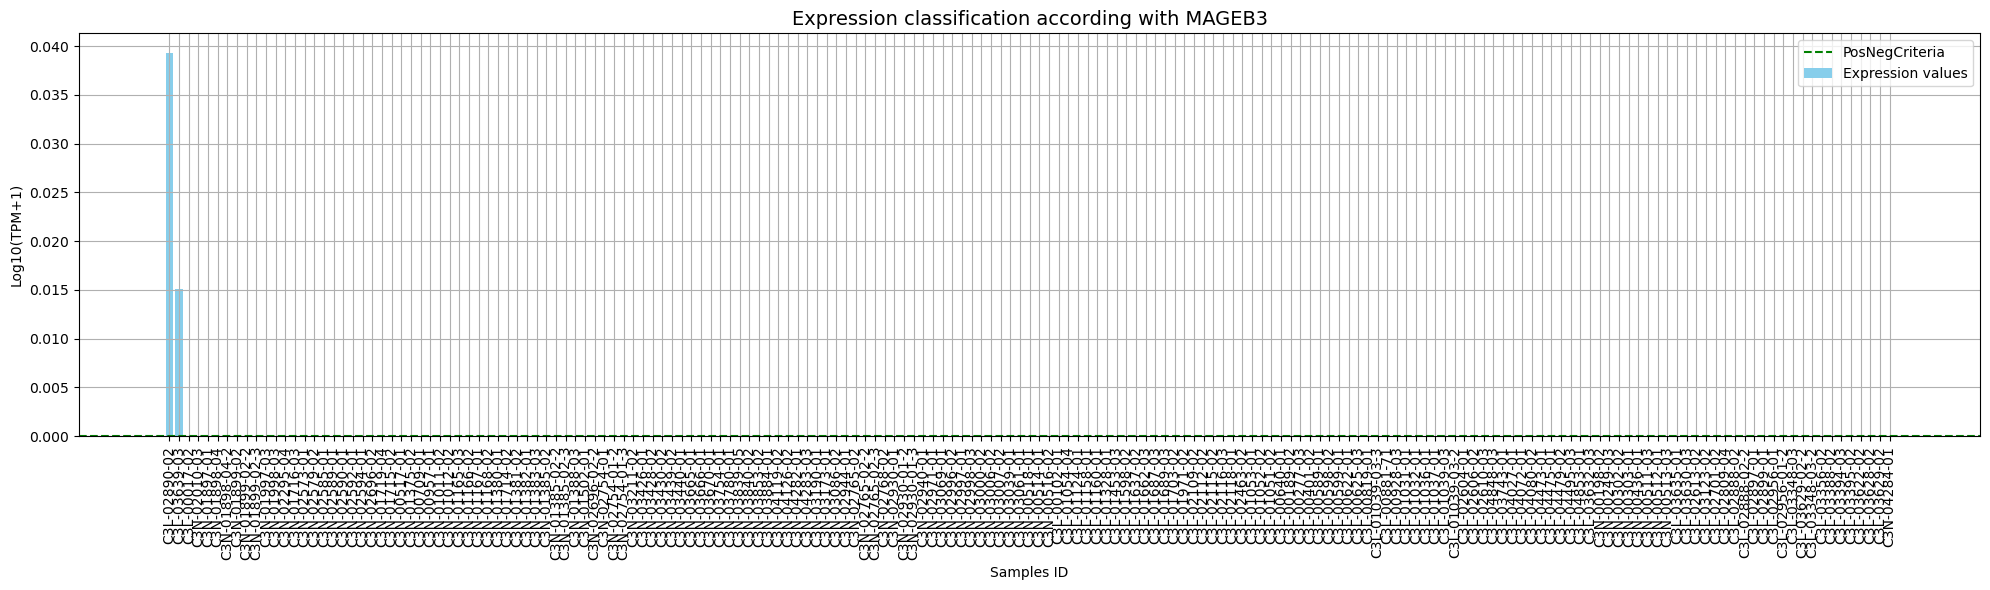


Processing MAGEB4
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defaul

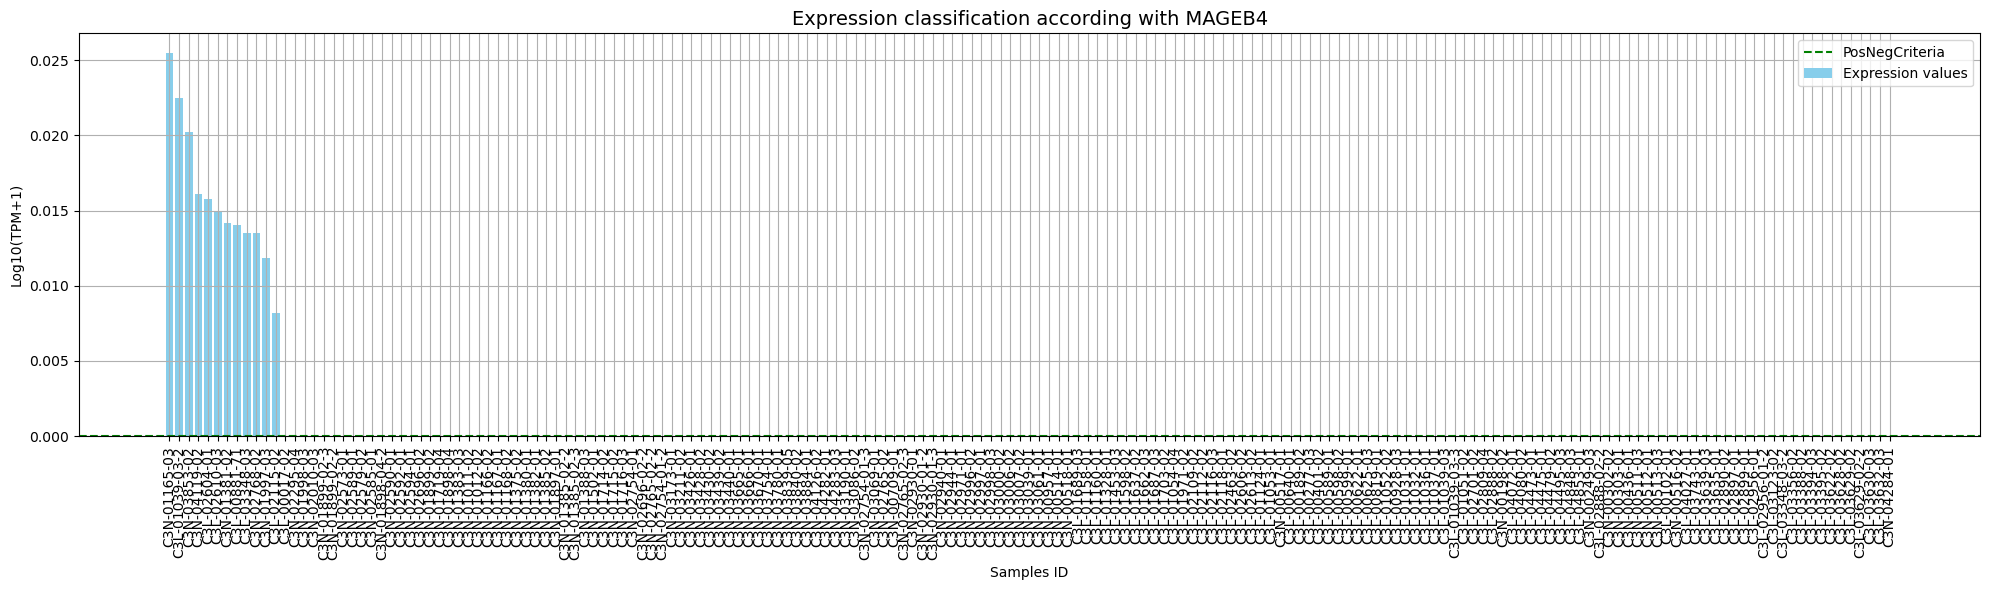


Processing MAGEB5
Attempt 1:
Finding optimal cutoff...


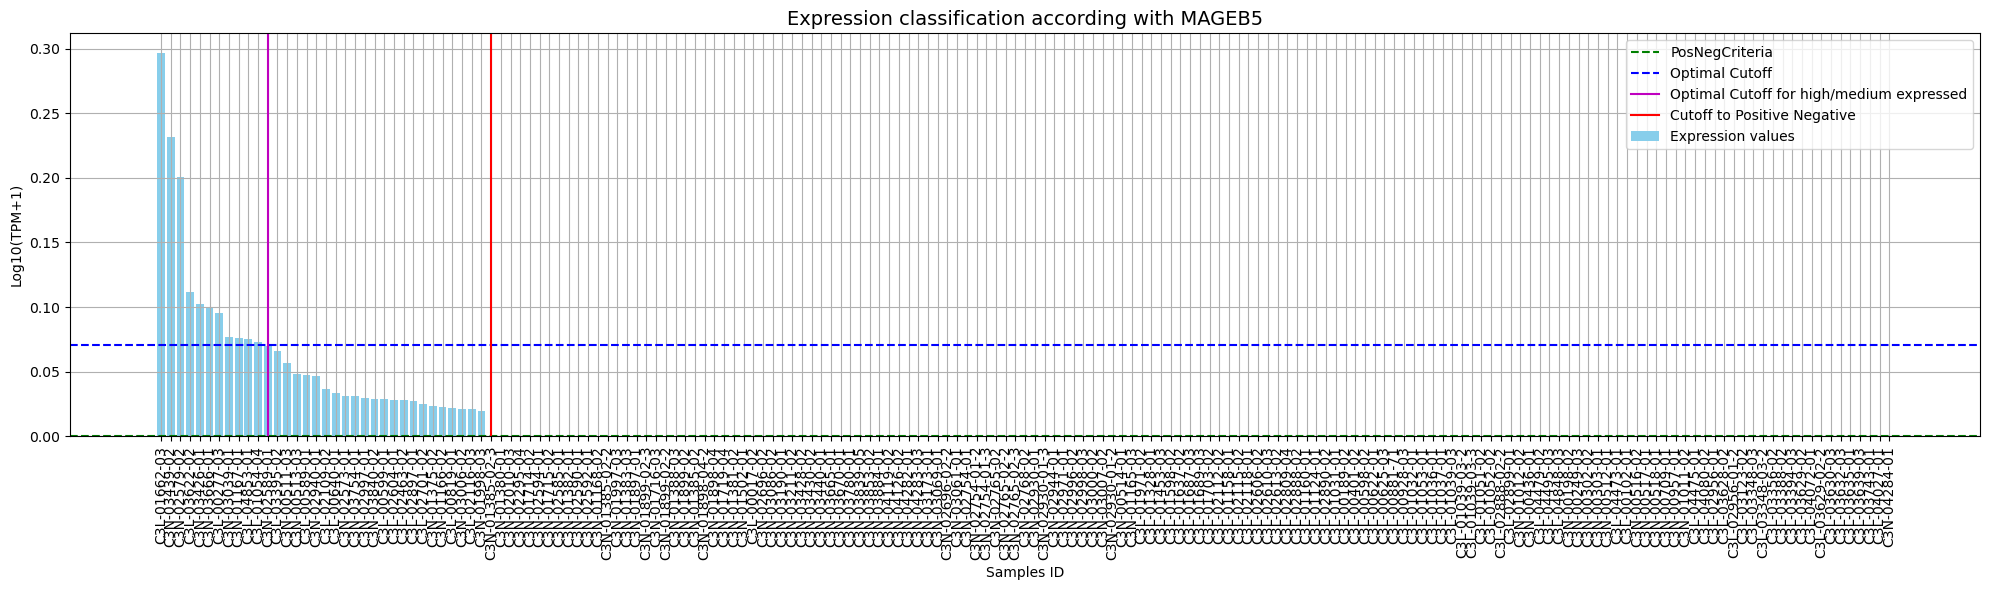


Processing MAGEB6
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defaul

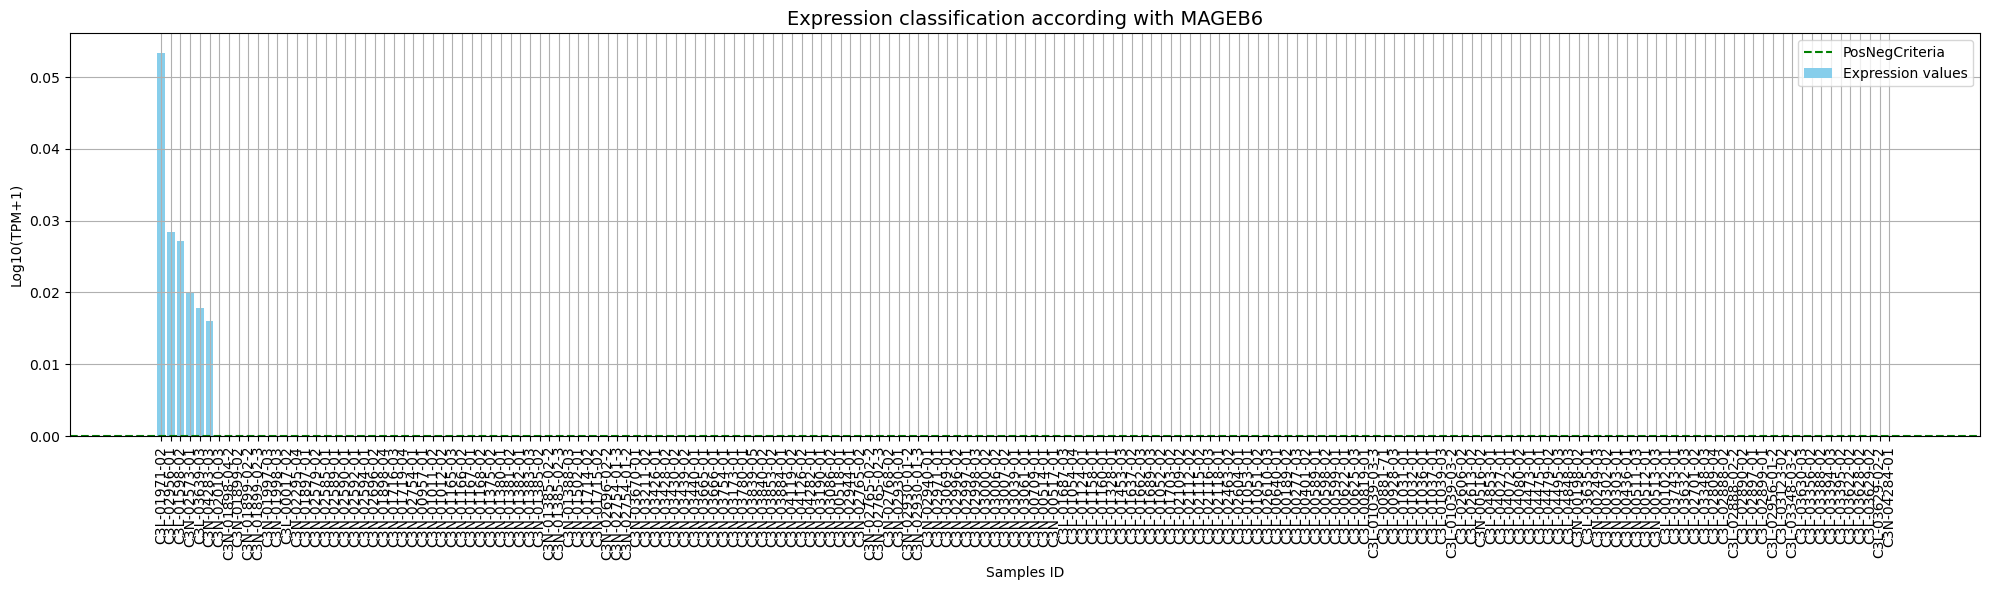


Processing MAGEB10
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defau

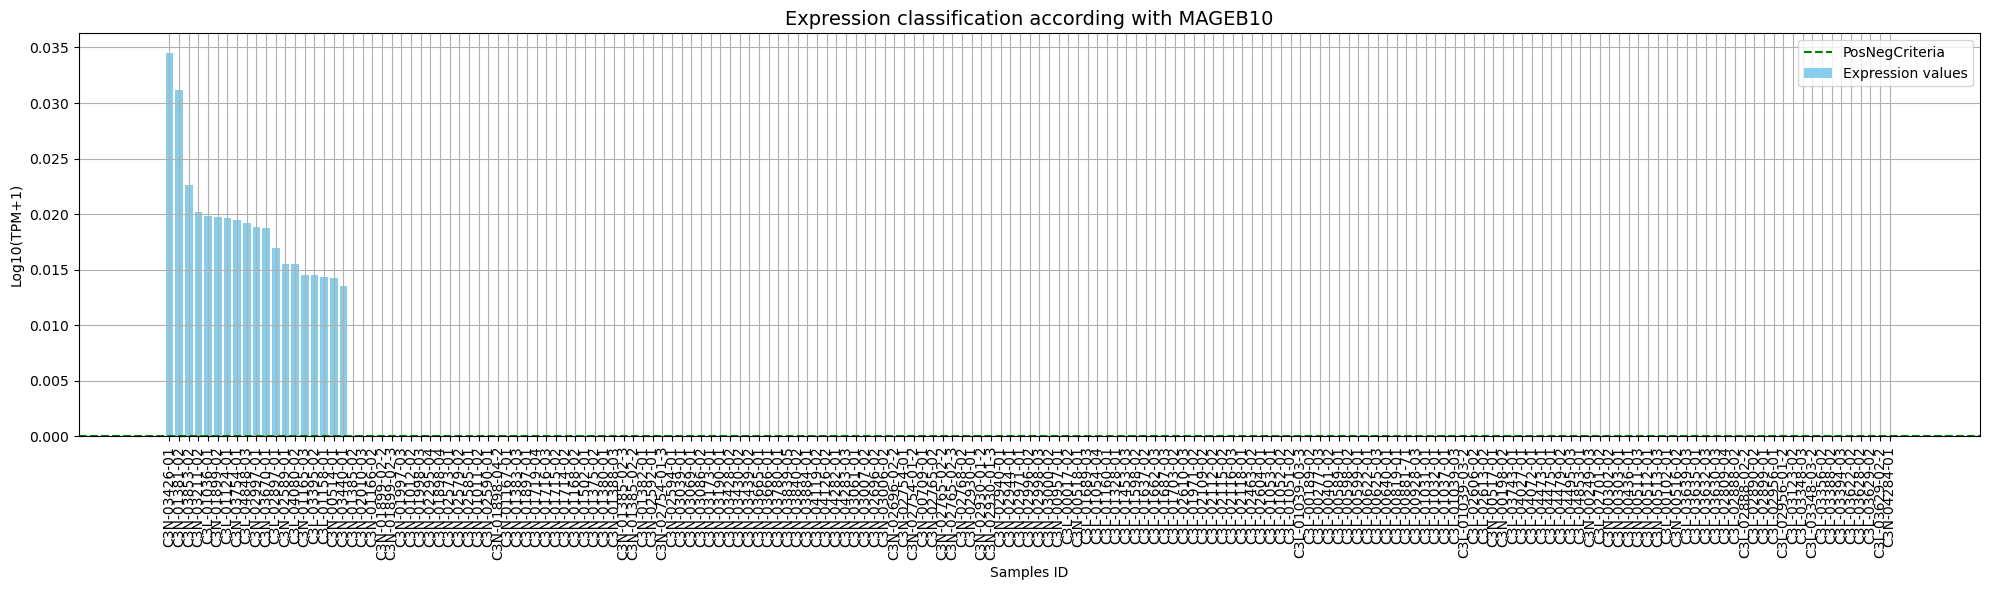


Processing MAGEB16
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...


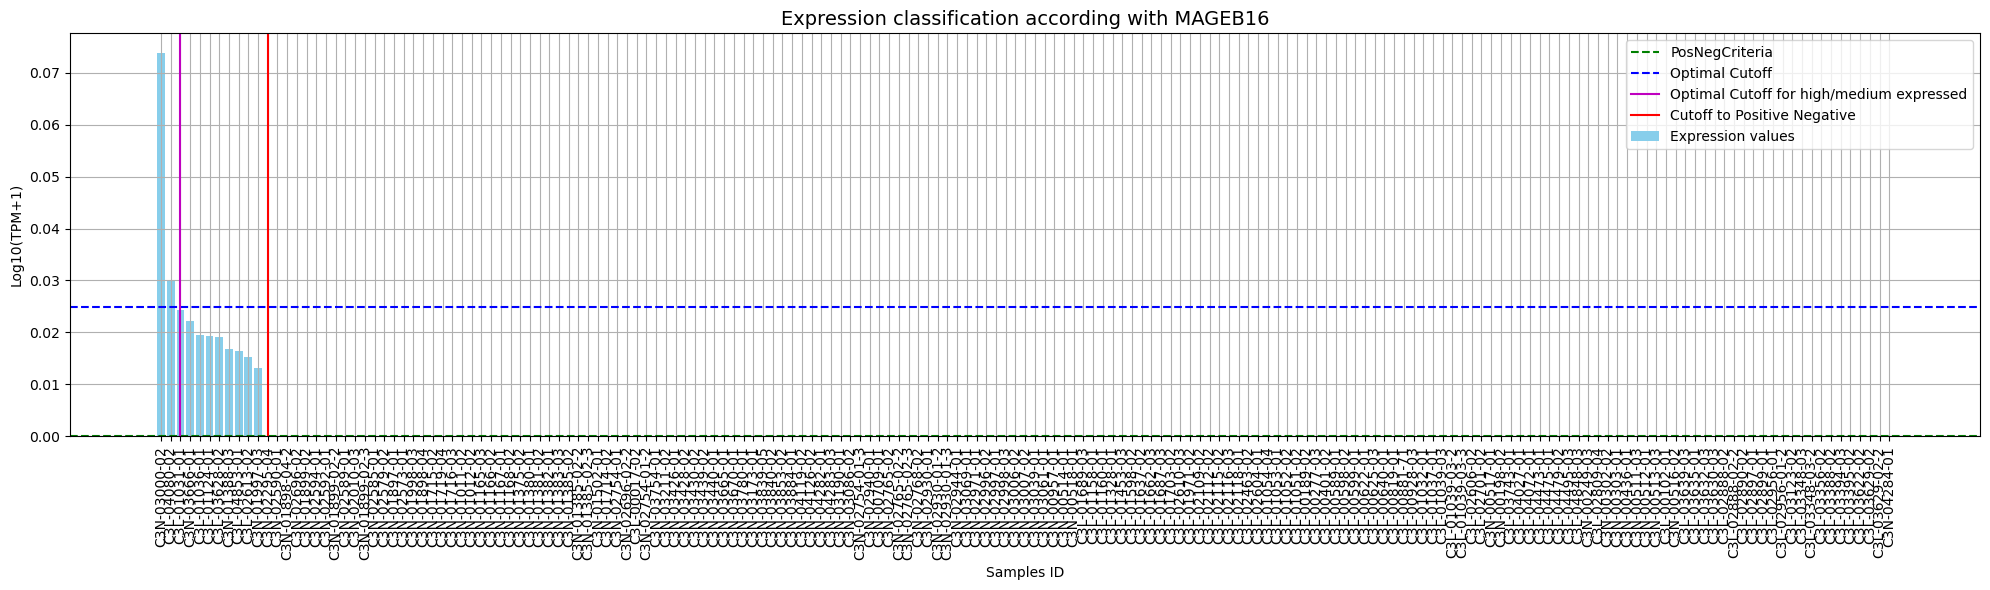


Processing MAGEB17
Attempt 1:
Finding optimal cutoff...


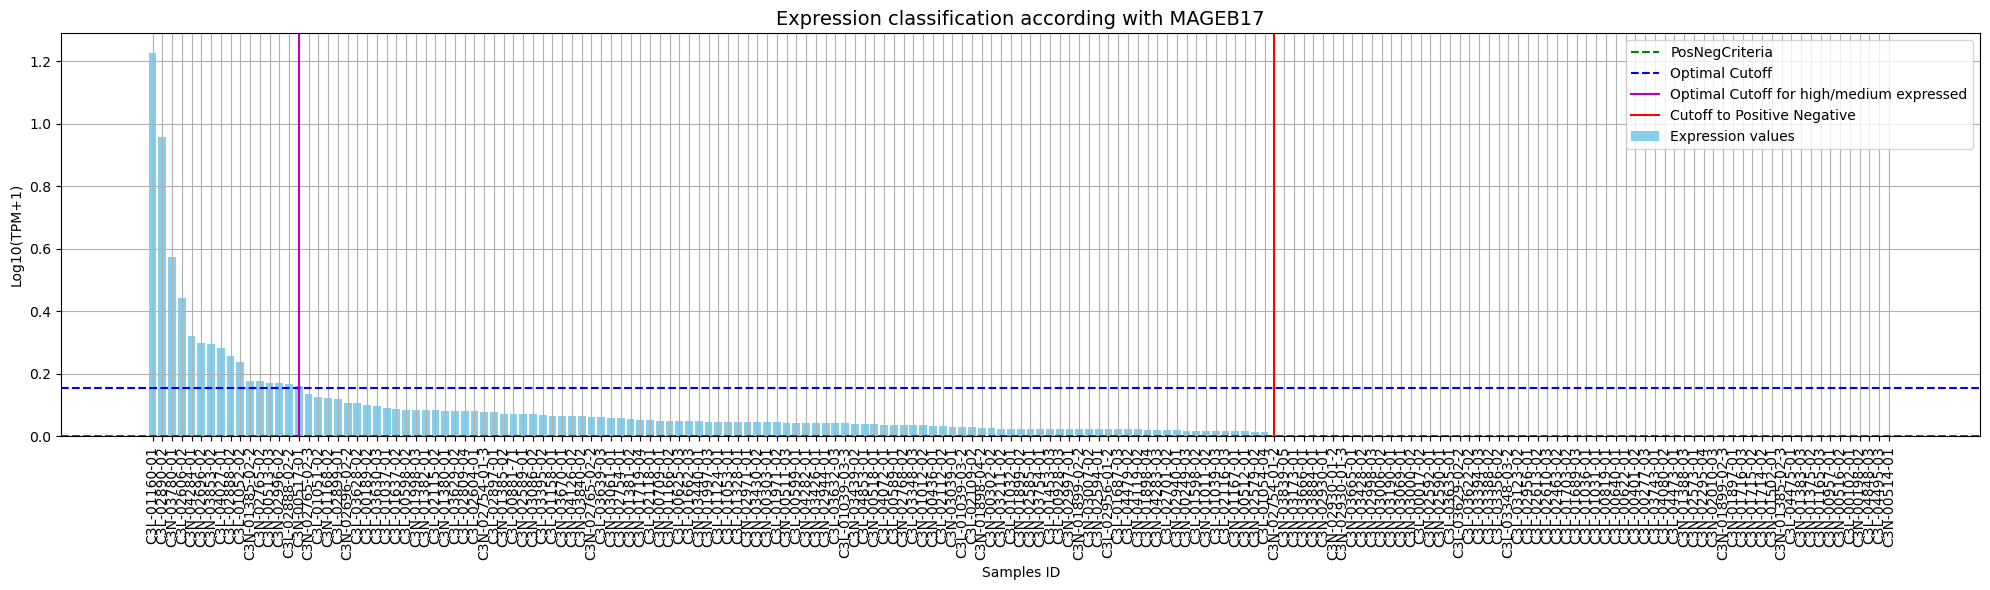


Processing MAGEB18
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defau

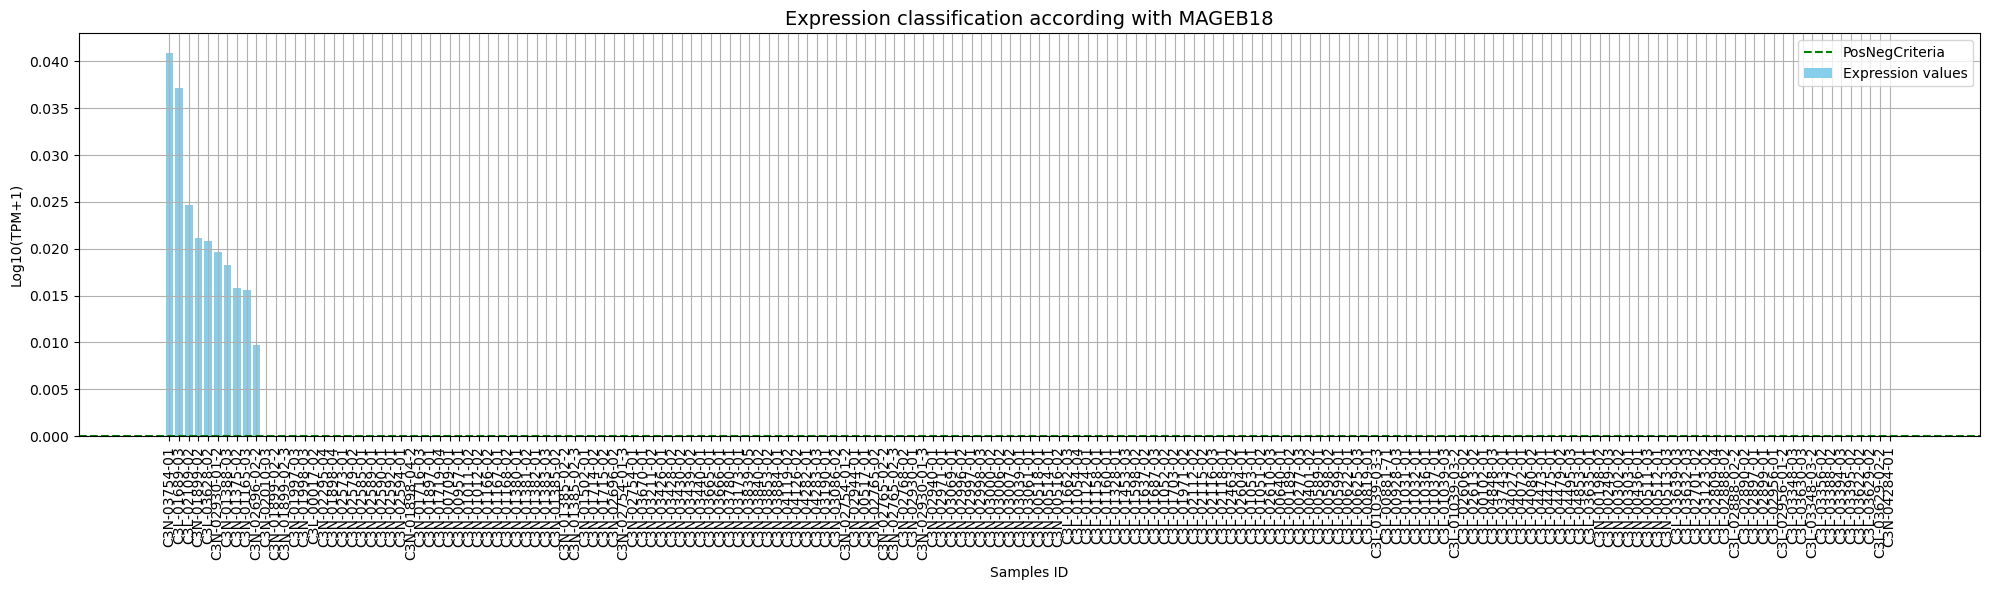


Processing MAGEC1
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 6:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning defaul

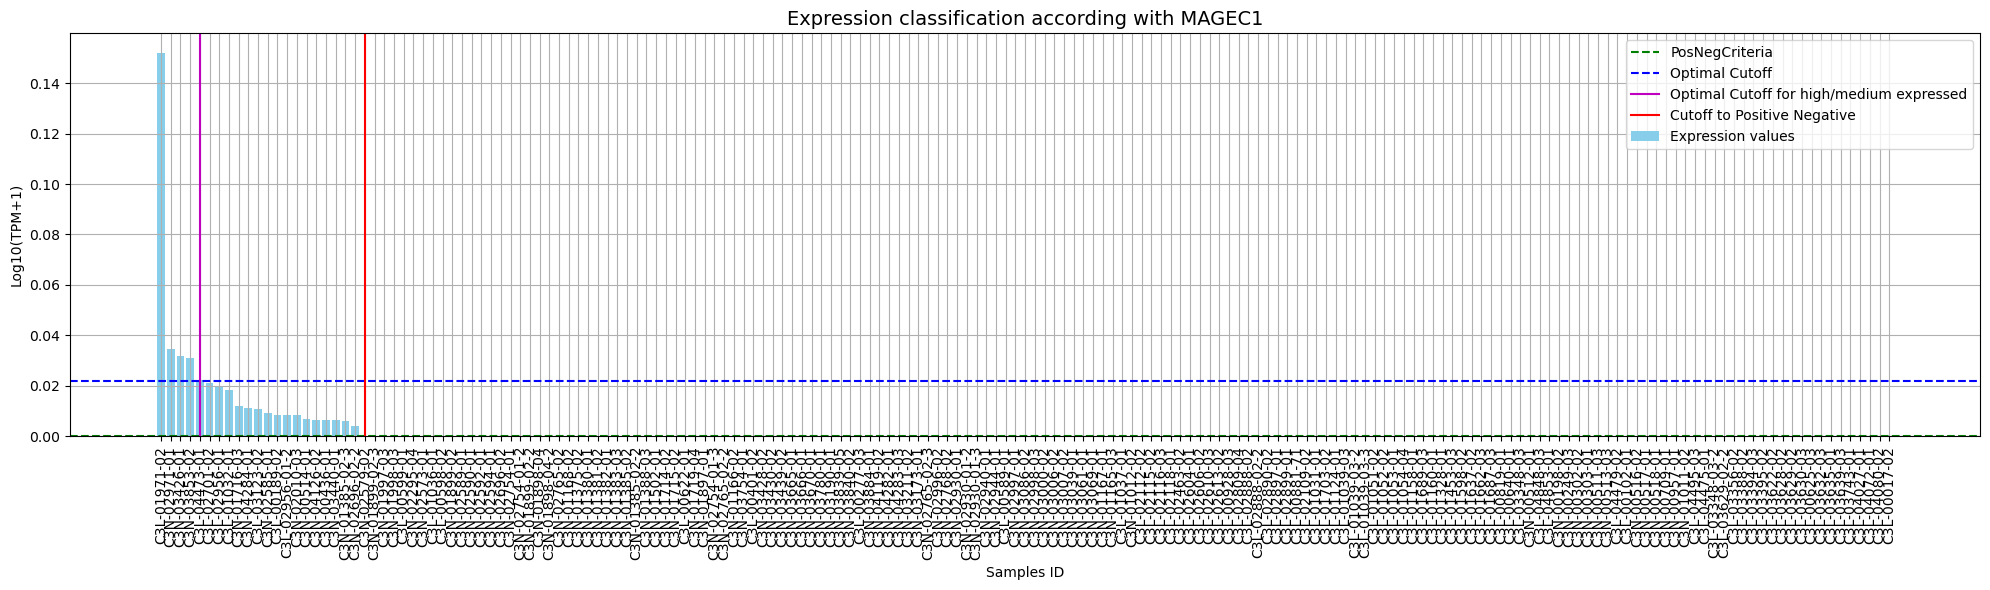


Processing MAGEC2
Attempt 1:
Finding optimal cutoff...


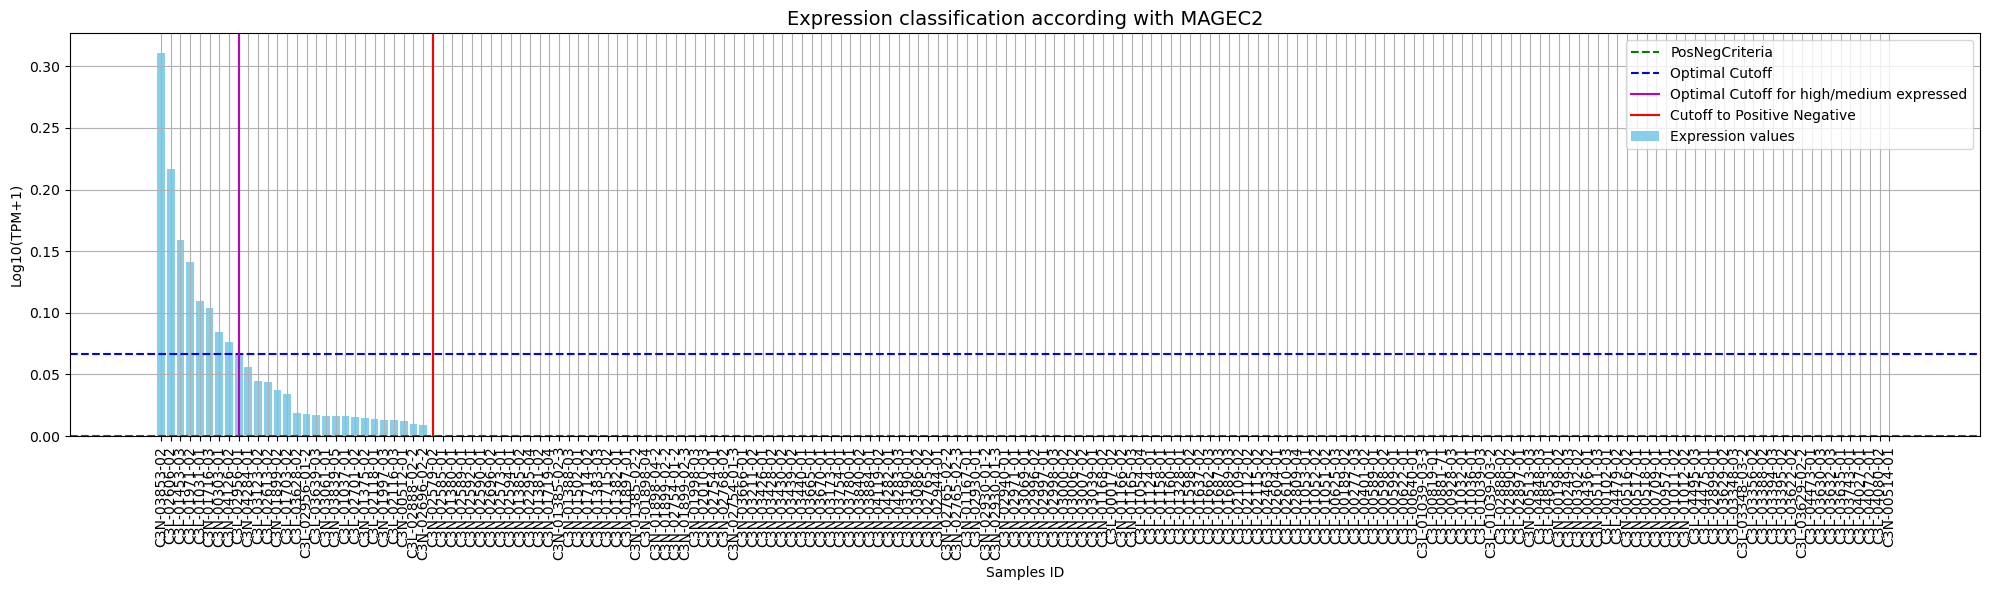


Processing MAGEC3
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...


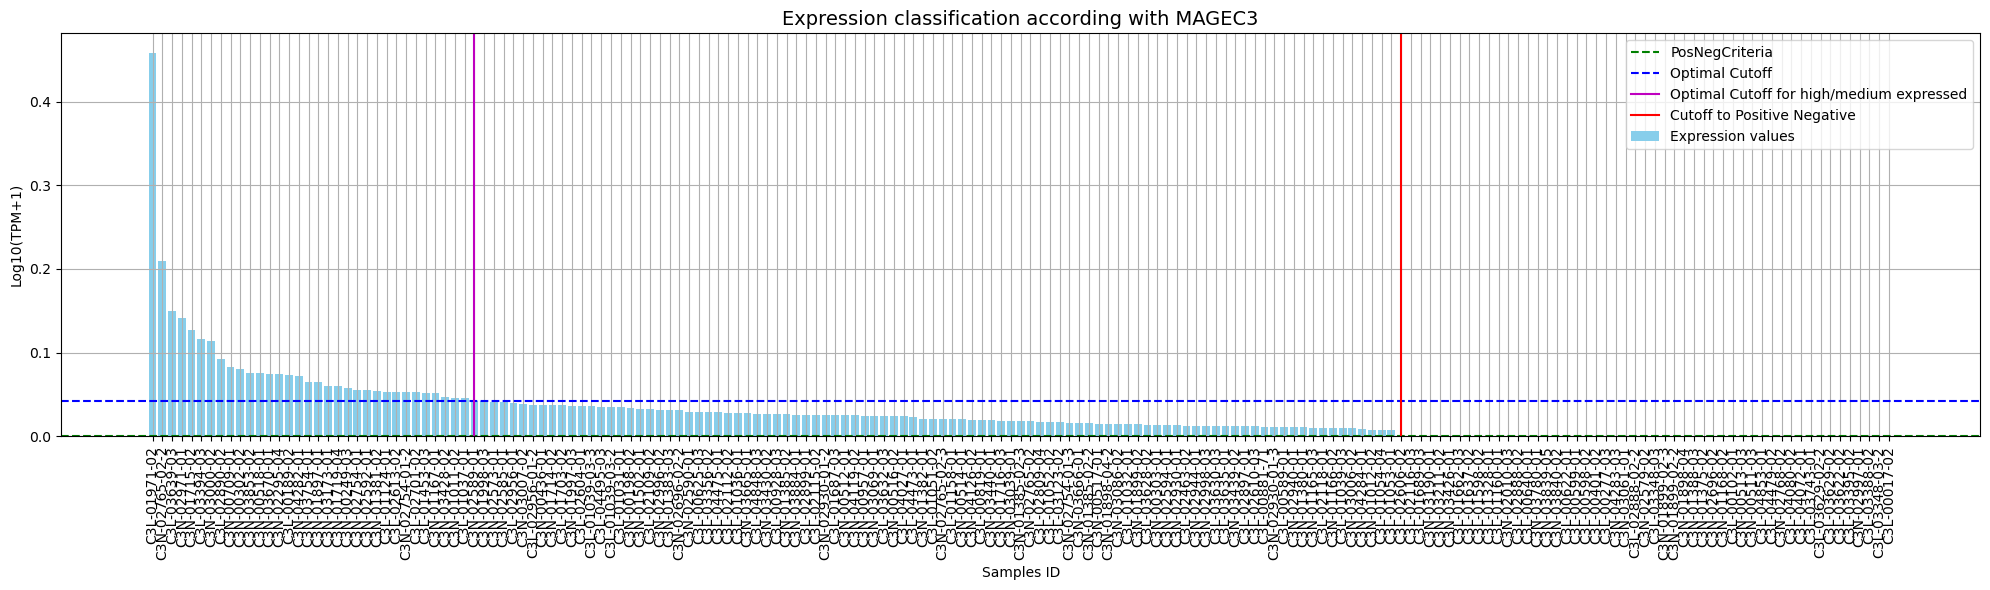


Processing CSAG1
Attempt 1:
Finding optimal cutoff...


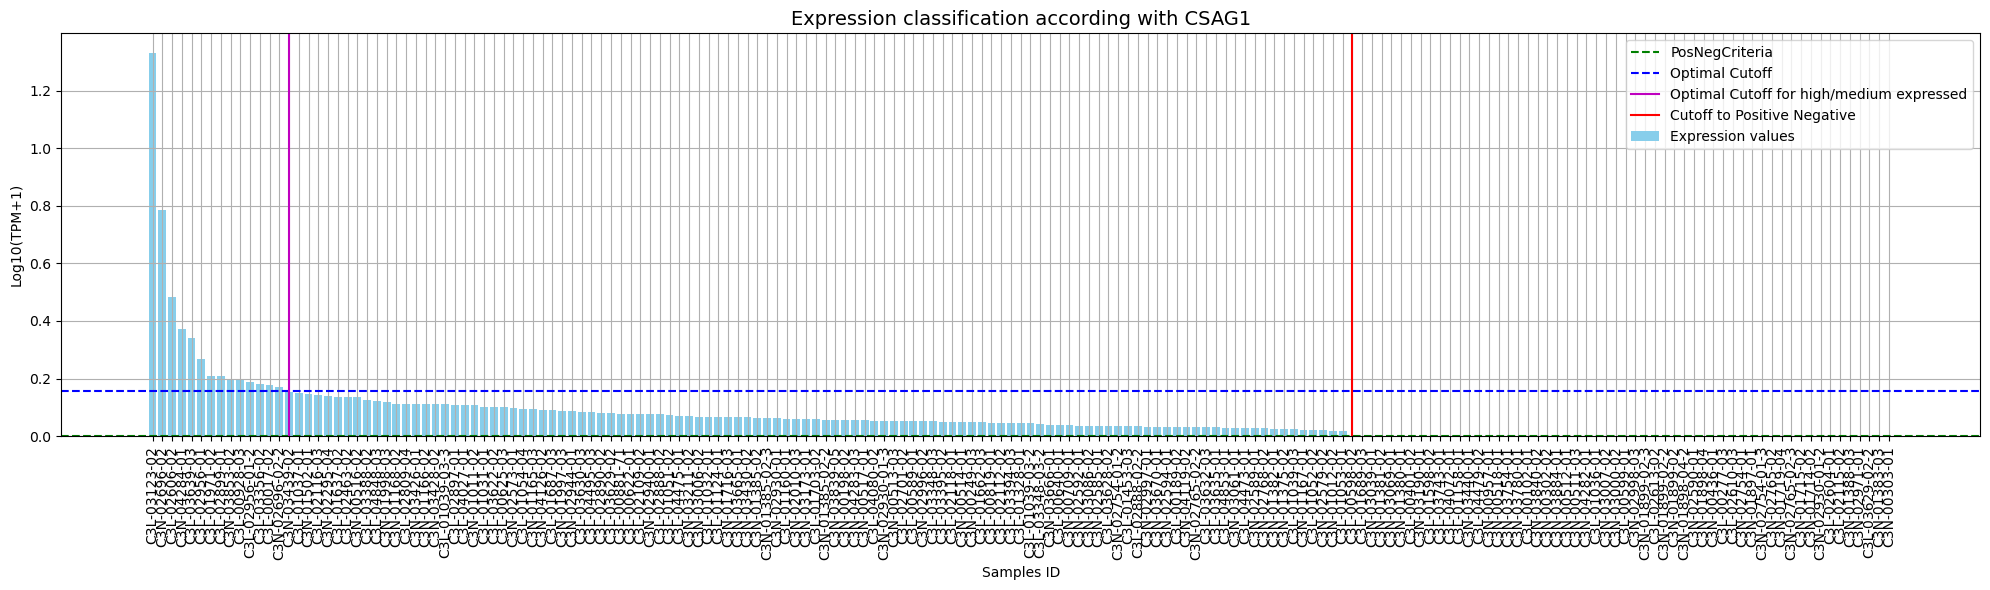


Processing CSAG2
Attempt 1:
Finding optimal cutoff...


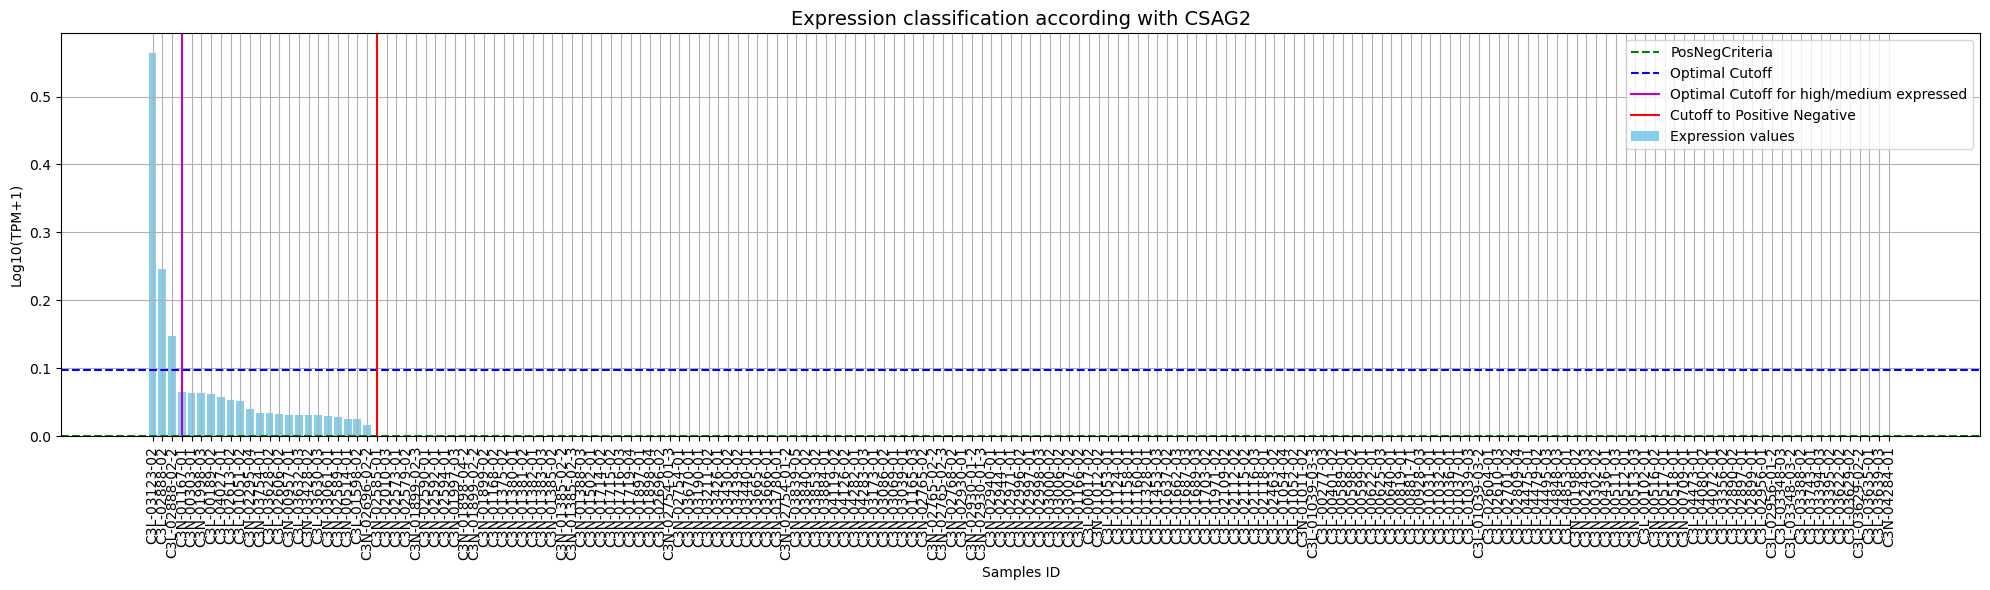


Processing CSAG3
Attempt 1:
Finding optimal cutoff...


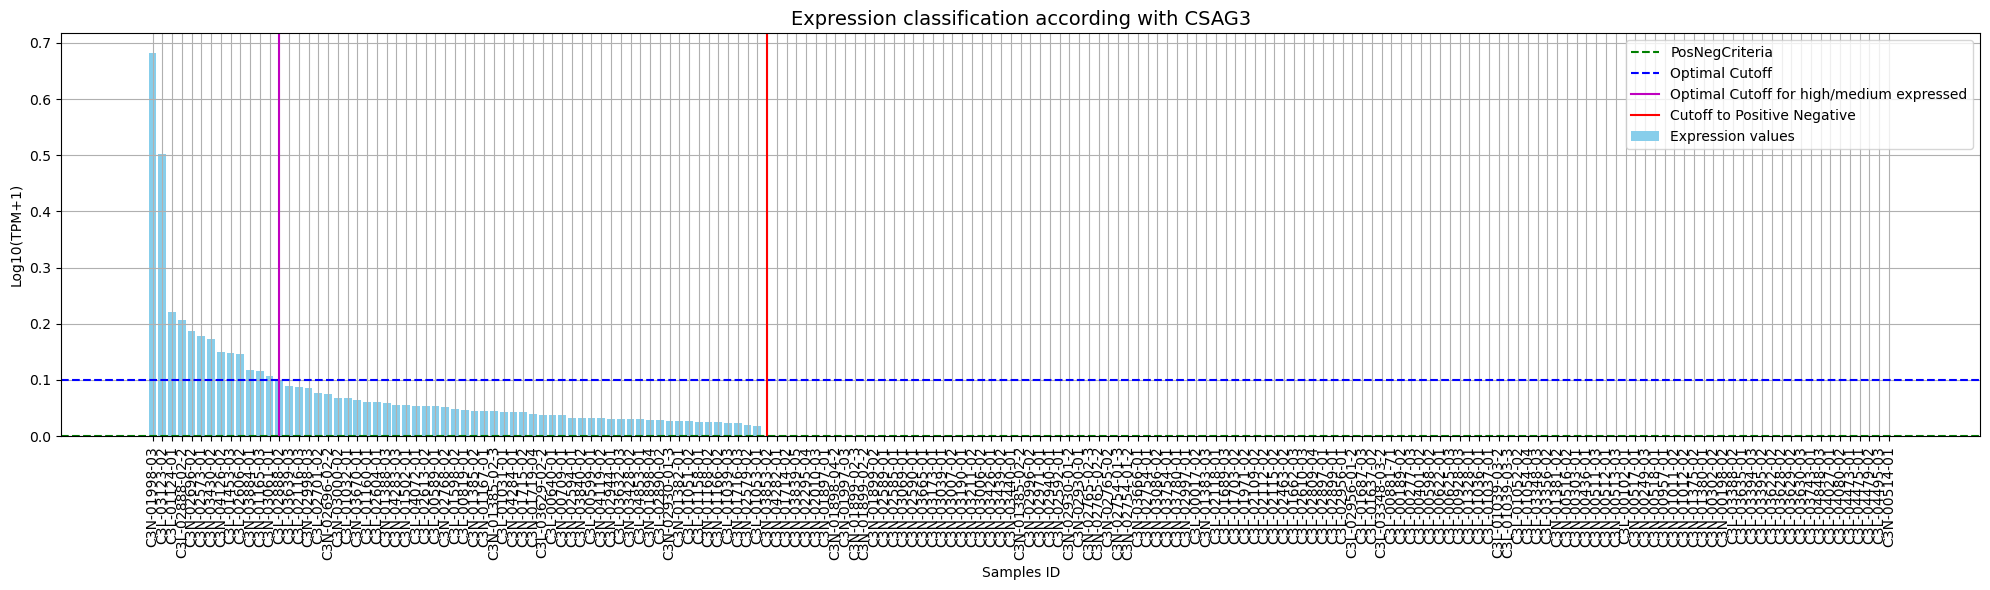


Processing CSAG4
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...


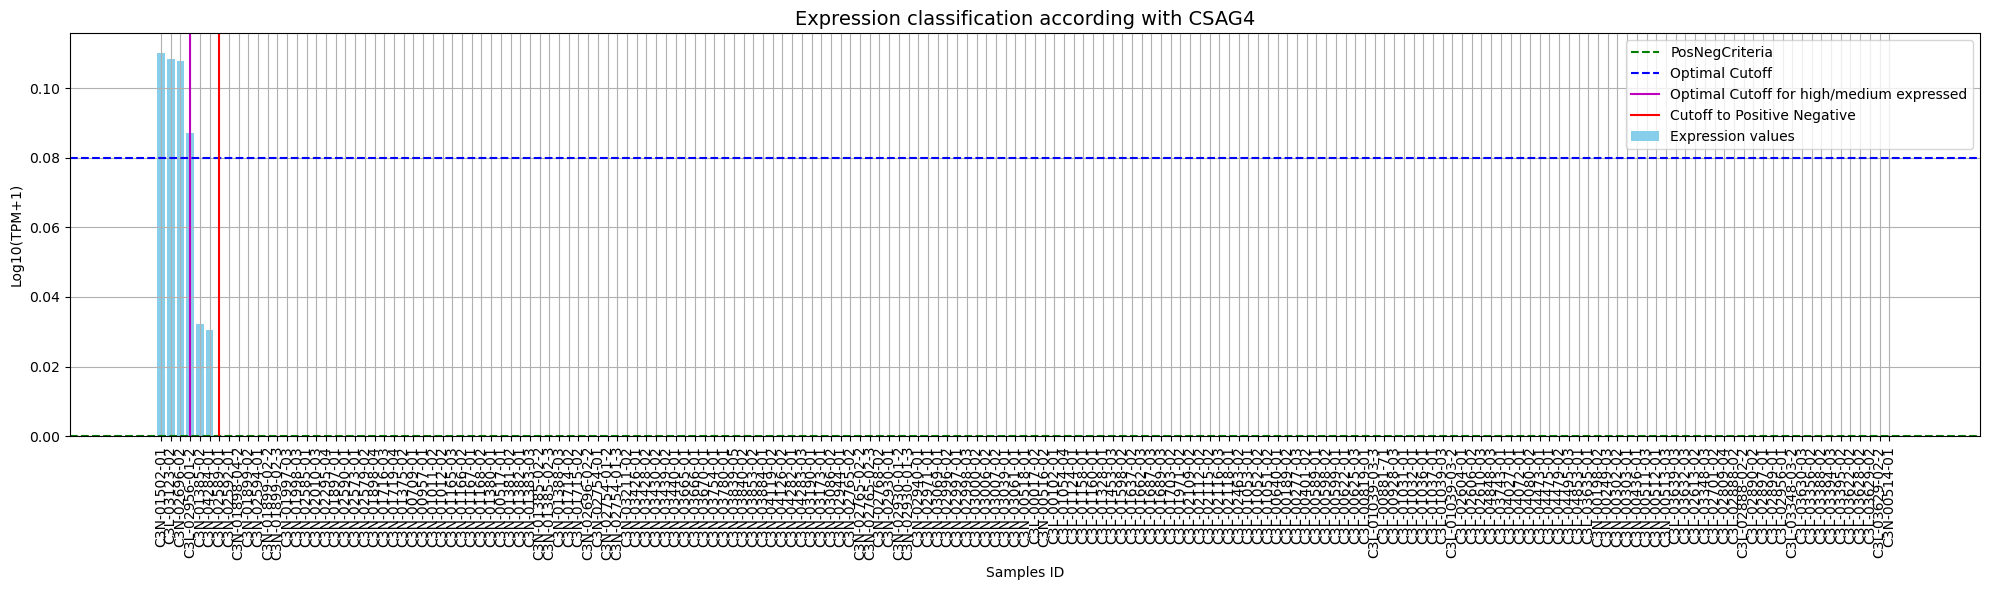


Processing MAGED1
Attempt 1:
Finding optimal cutoff...


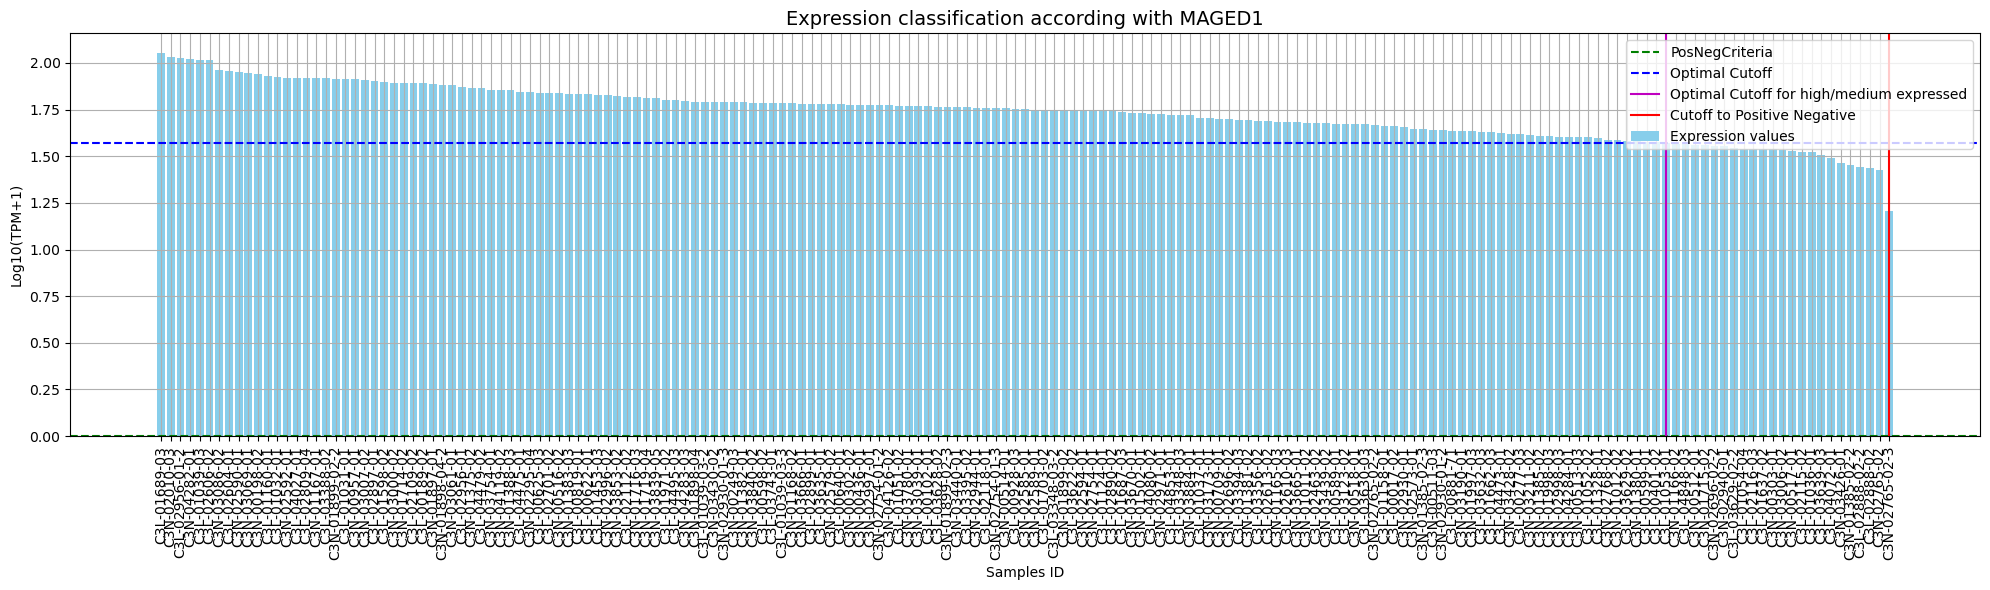


Processing MAGED2
Attempt 1:
Finding optimal cutoff...


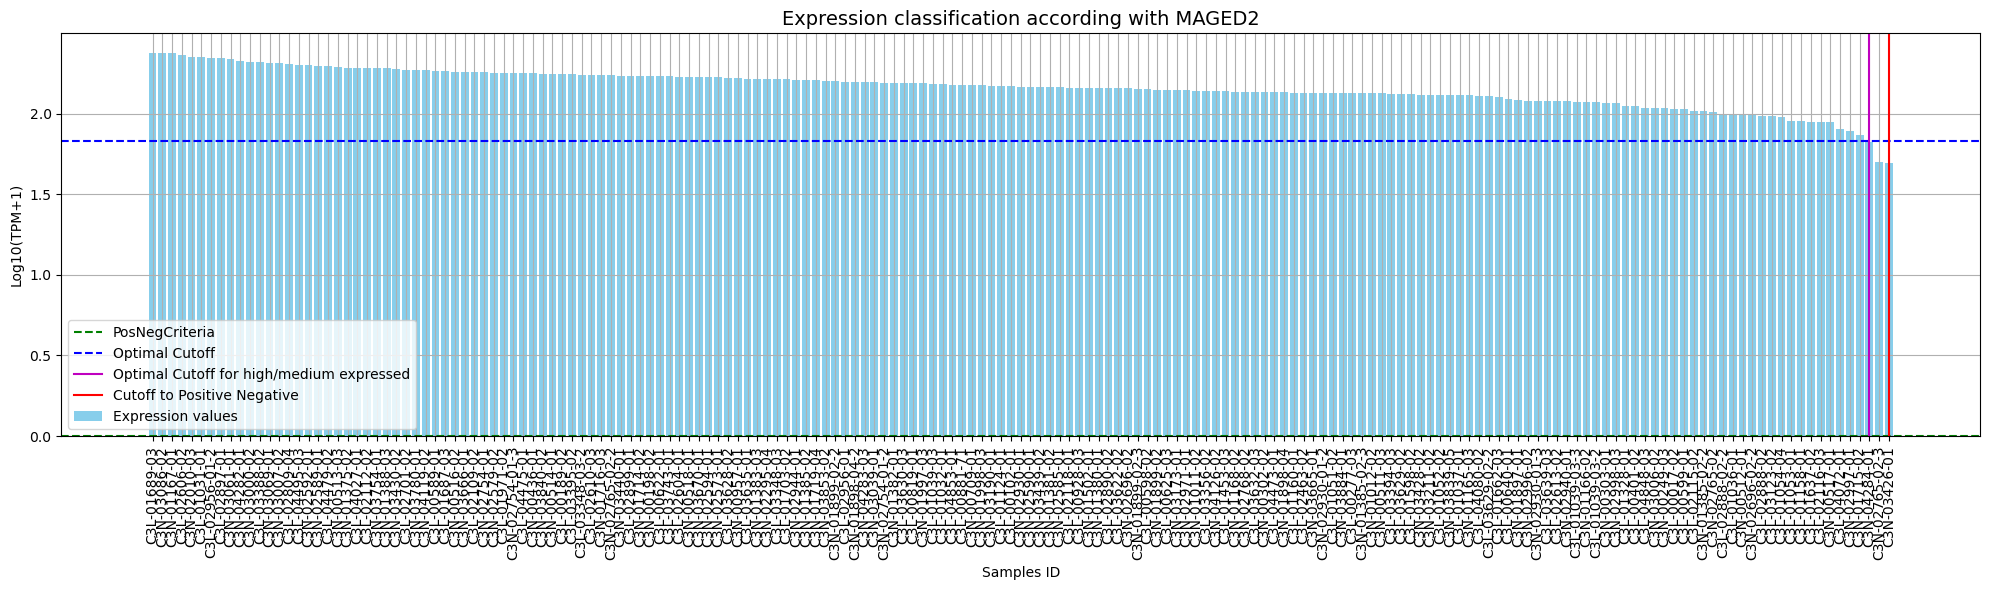


Processing TRO
Attempt 1:
Finding optimal cutoff...


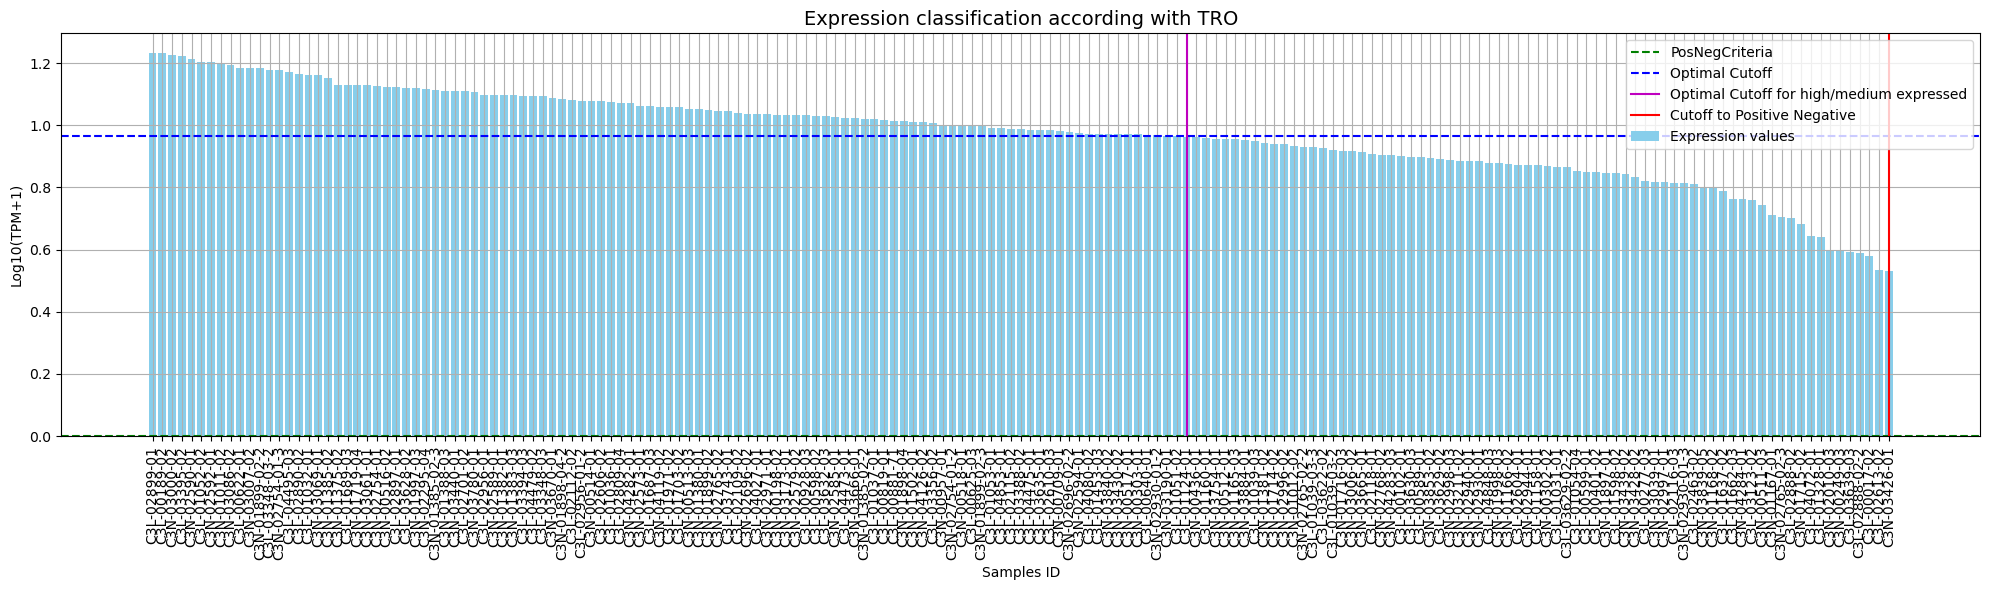


Processing MAGED4
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 4:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 5:
Finding optimal cutoff...


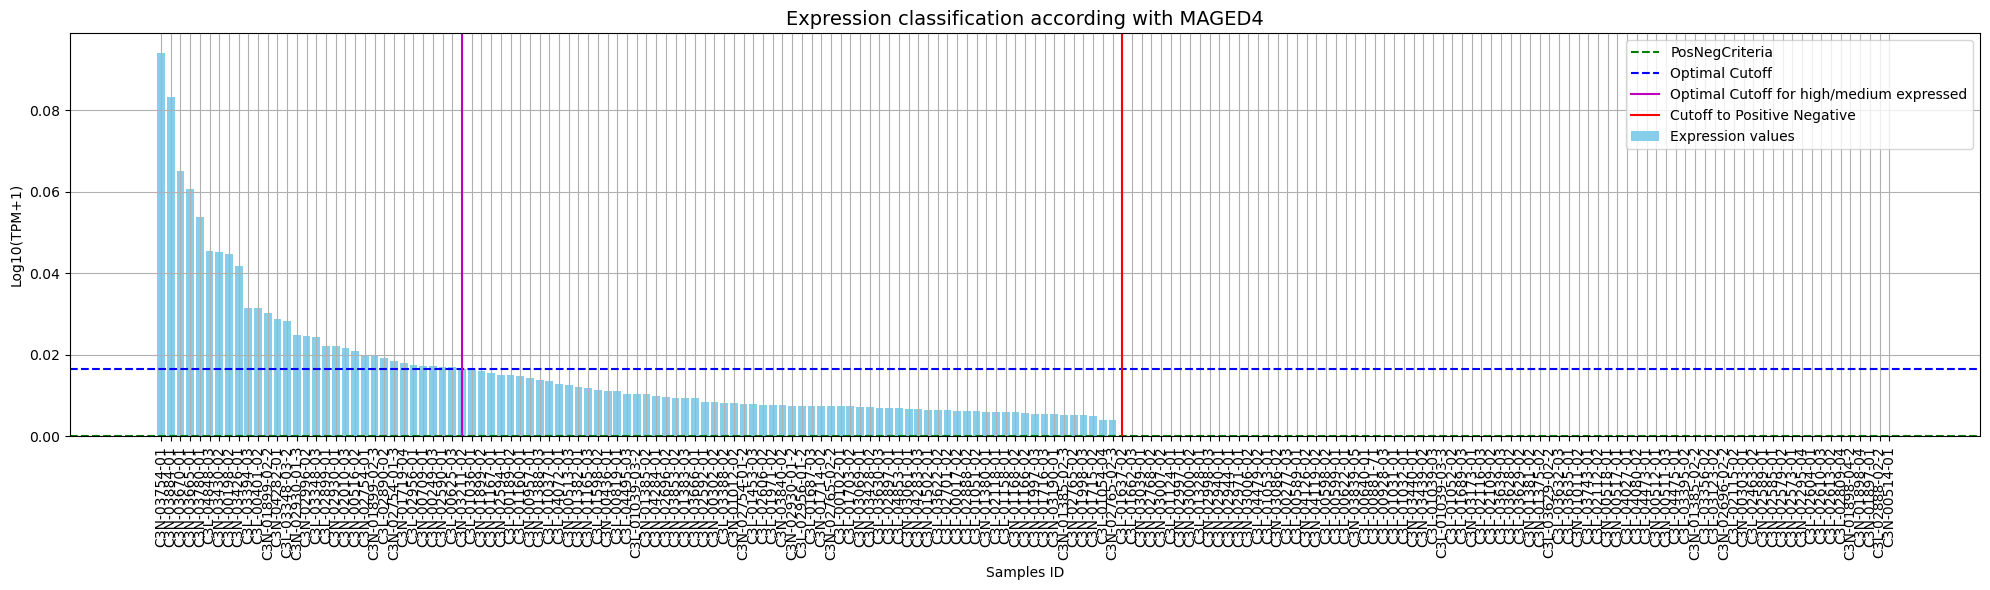


Processing MAGED4B
Attempt 1:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 2:
Finding optimal cutoff...
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Optimal cutoff value not found or equal to -1. Retrying...
Attempt 3:
Finding optimal cutoff...


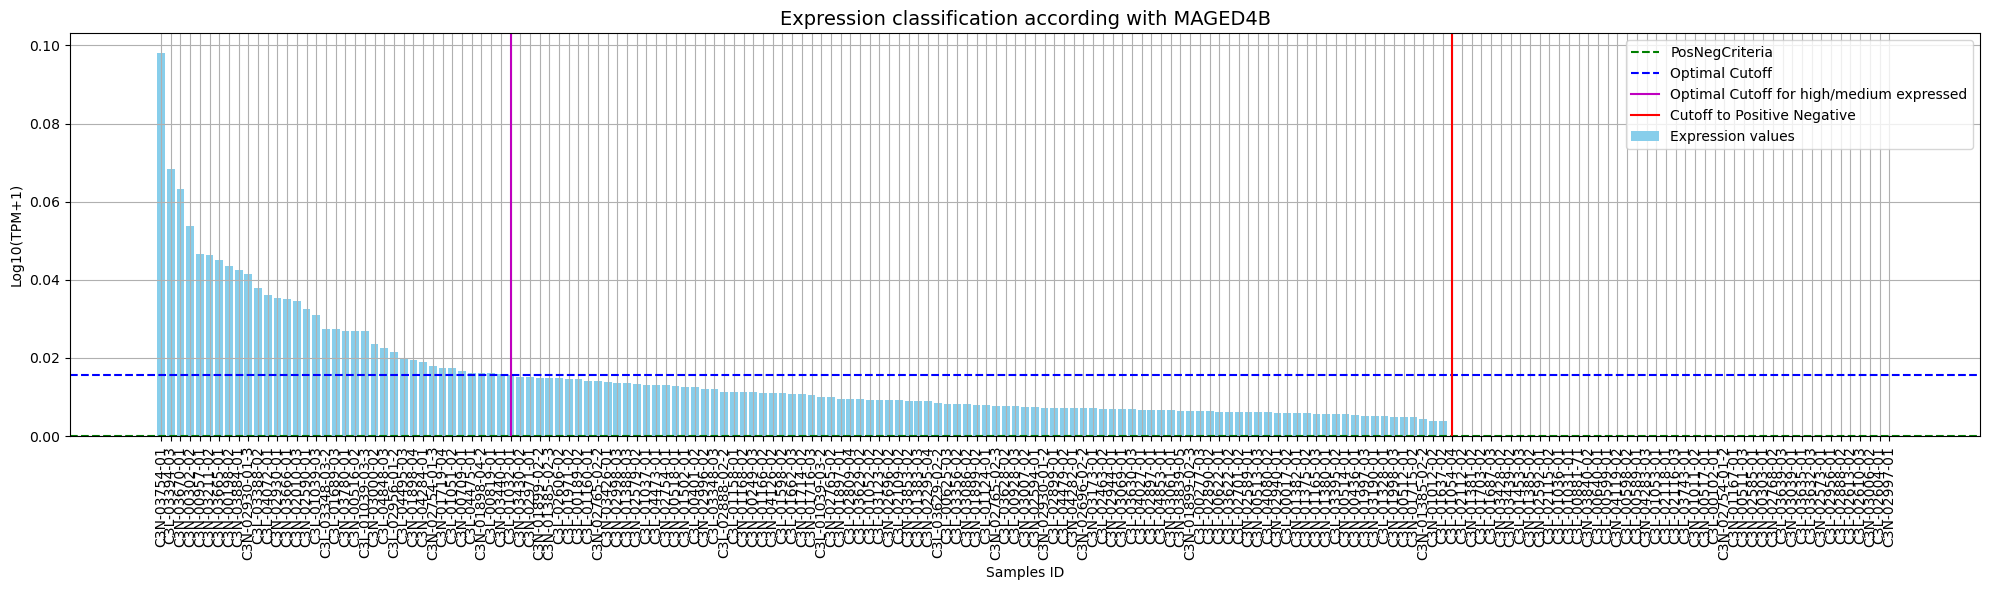


Processing MAGEE1
Attempt 1:
Finding optimal cutoff...


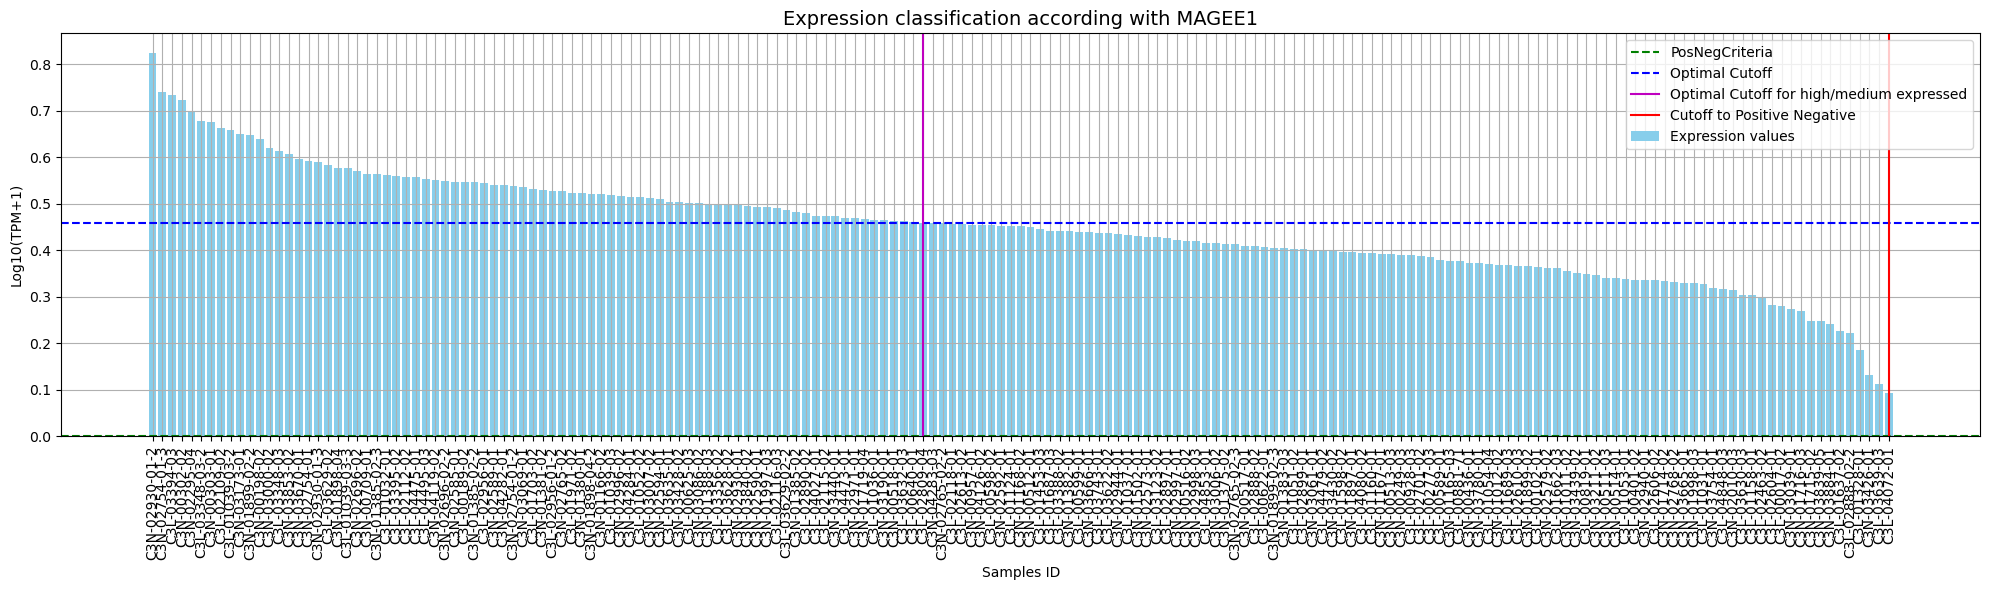


Processing MAGEE2
Attempt 1:
Finding optimal cutoff...


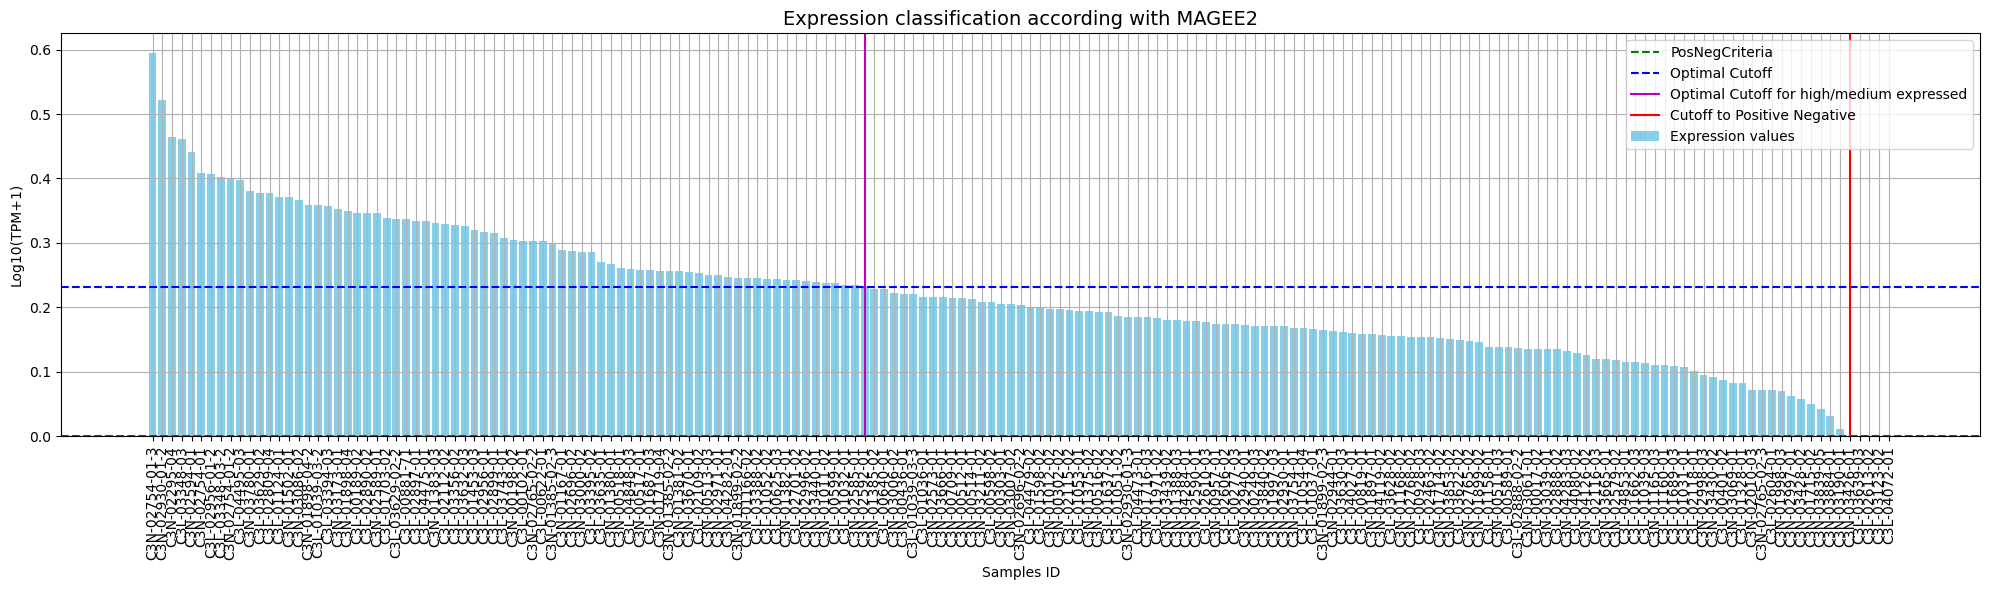


Processing MAGEF1
Attempt 1:
Finding optimal cutoff...


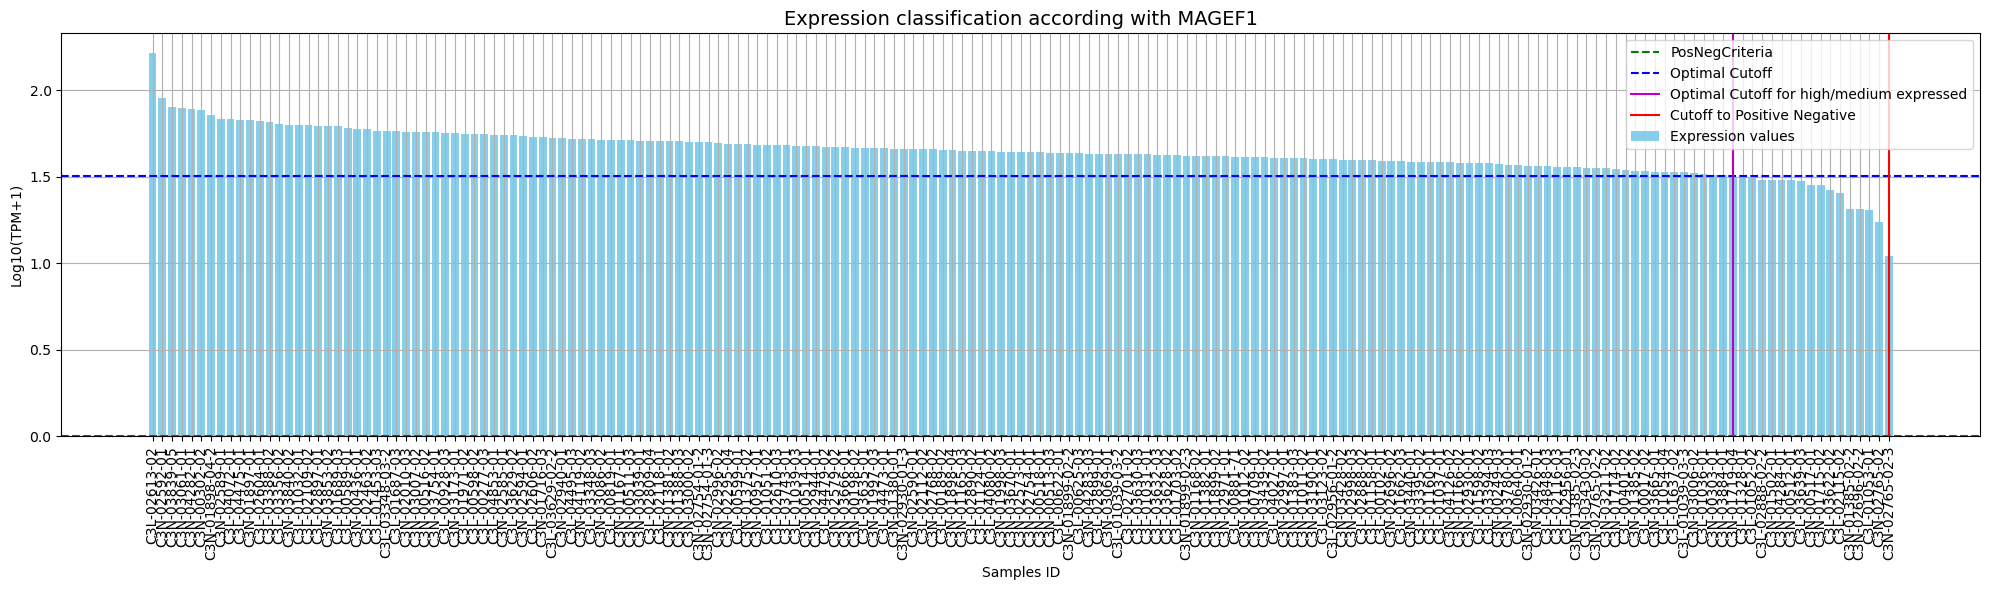


Processing NSMCE3
Attempt 1:
Finding optimal cutoff...


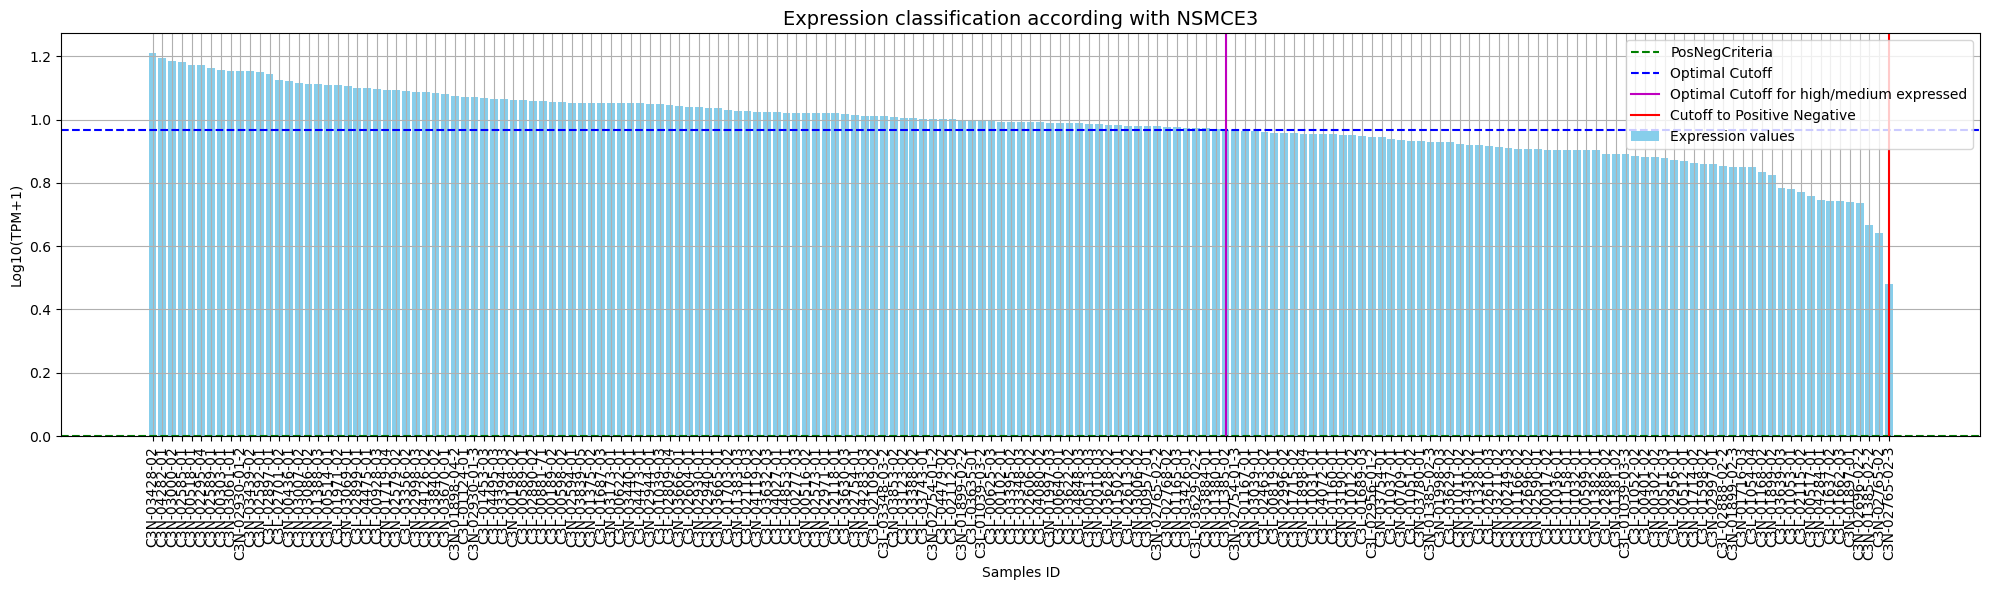


Processing MAGEH1
Attempt 1:
Finding optimal cutoff...


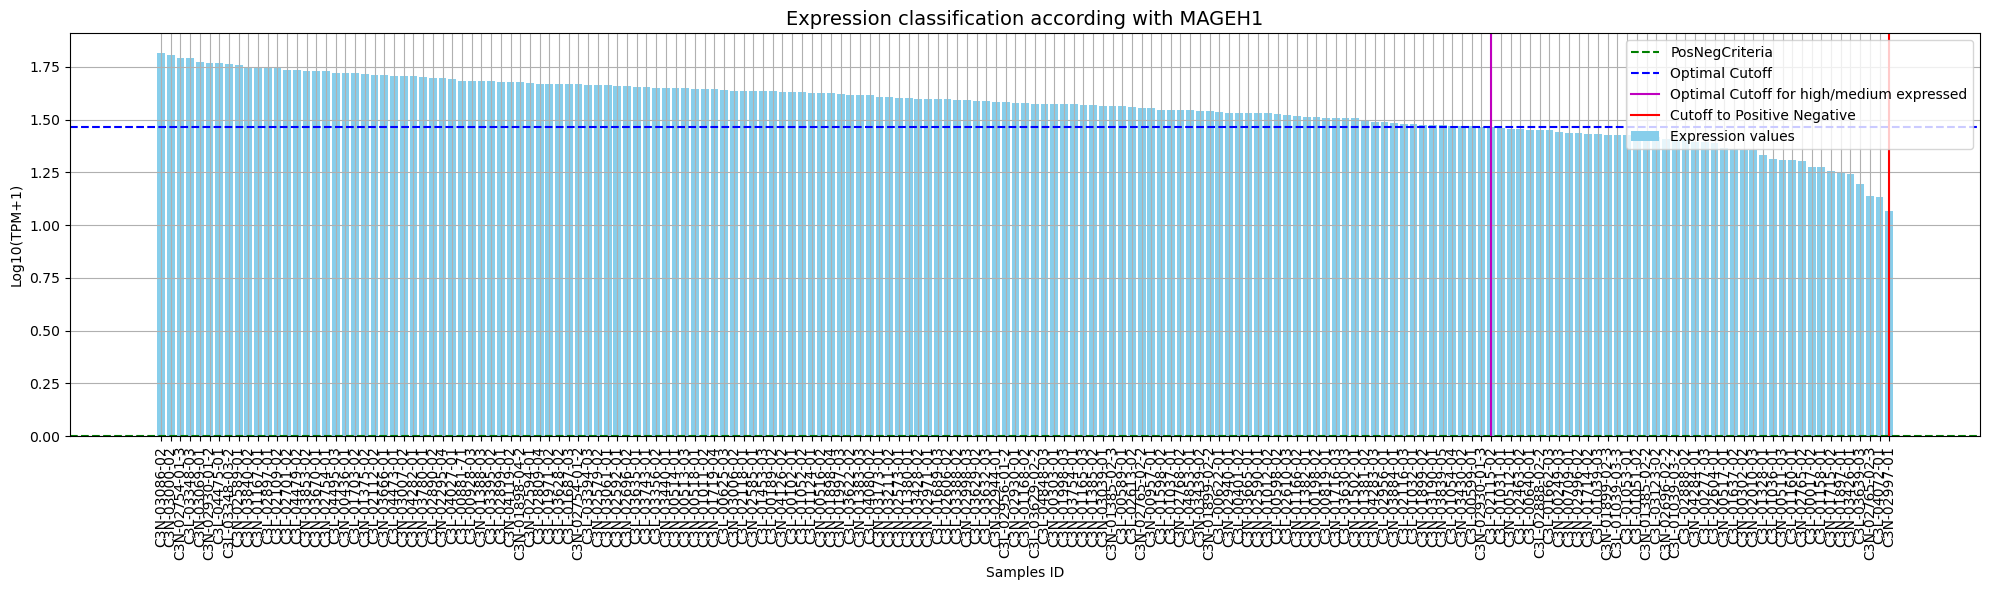


Processing MAGEL2
Attempt 1:
Finding optimal cutoff...


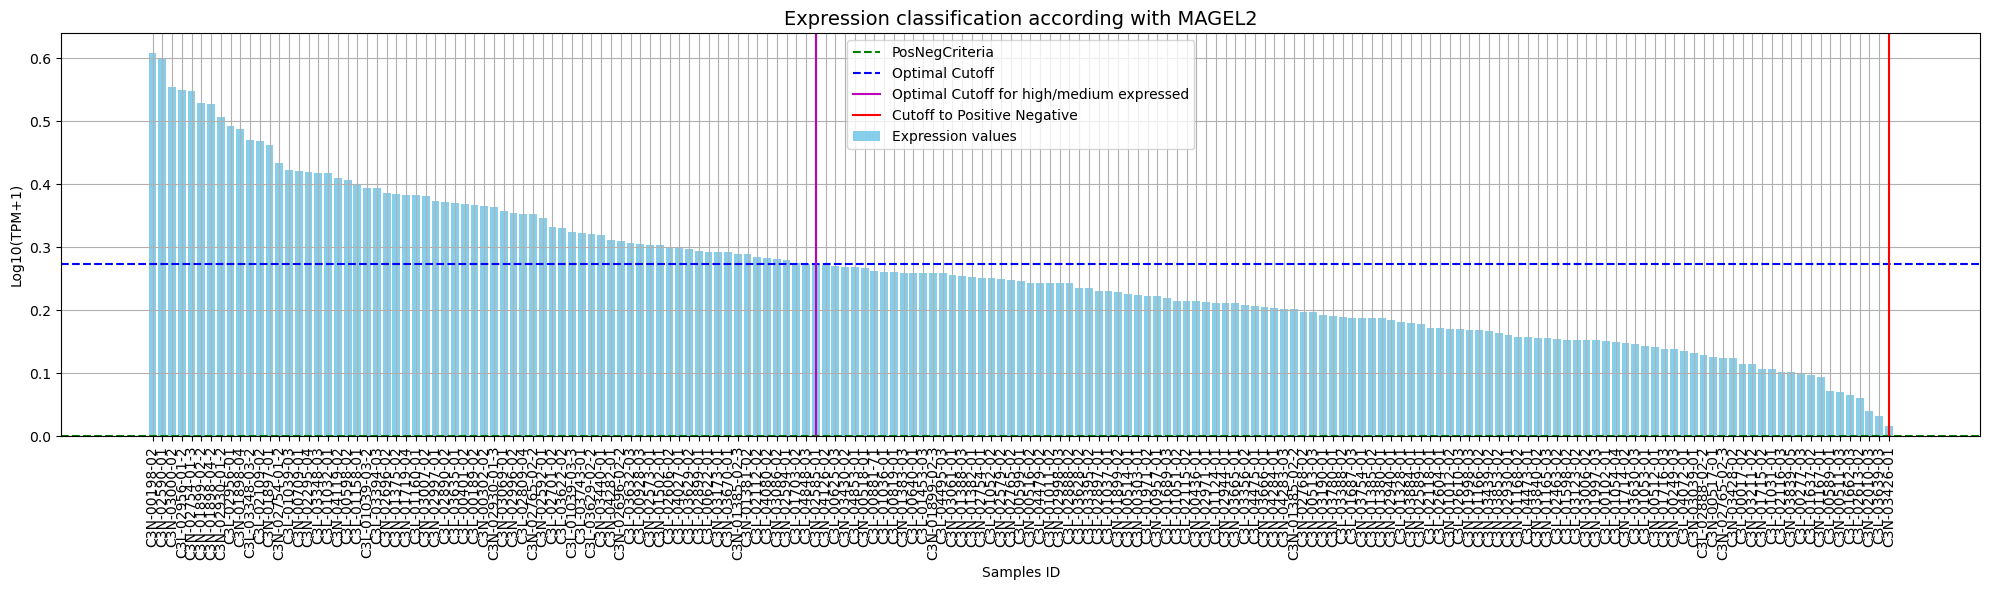


Processing TRIM28
Attempt 1:
Finding optimal cutoff...


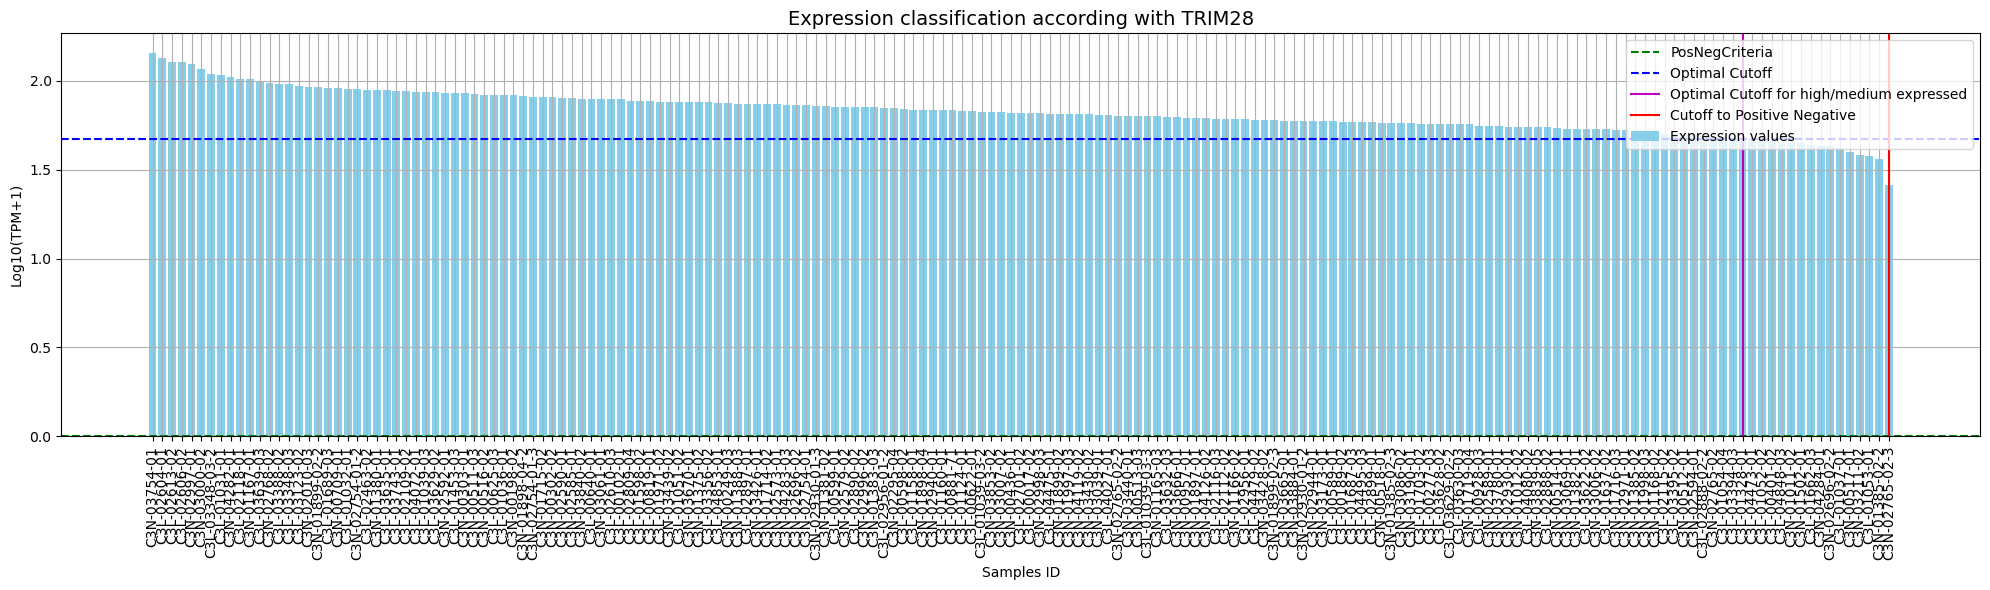


Processing NDN
Attempt 1:
Finding optimal cutoff...


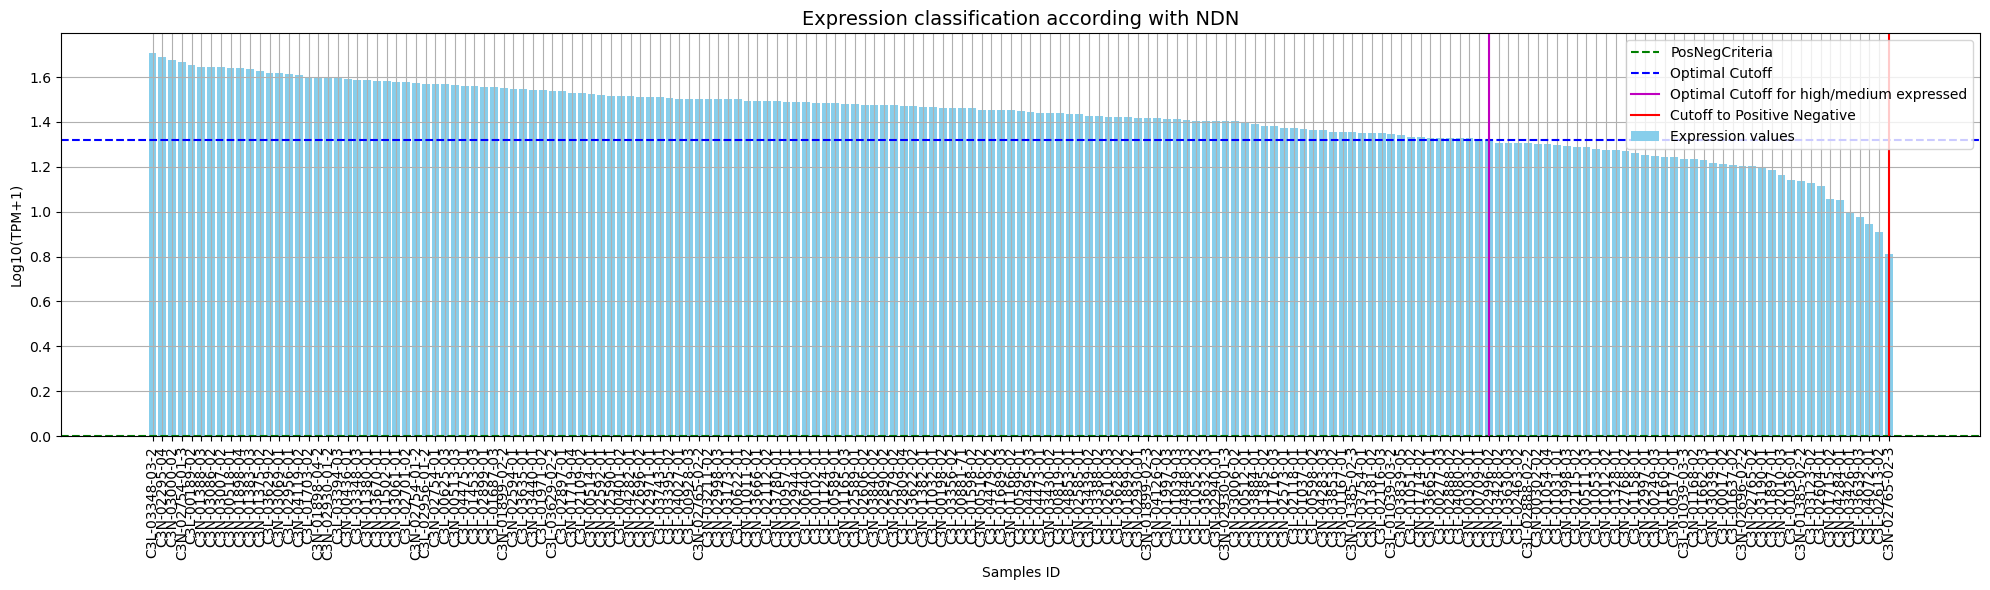

In [24]:
# Initialize a dictionary for basic parameters
basic = {
    "TPM Positive/Negative threshold": None,
    "log10(TPM+1) Positive/Negative threshold": None,
    "Optimal cutoff value": None,
    "Normalized": None
}

# Add an index to the dictionary
index = ["Parameter"]  # Define index values
basic_with_index = {index[0]: list(basic.keys()), **basic}  # Combine index with basic dictionary

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame(basic_with_index)

for i, gene in enumerate(column_order):
    attempt = 1
    print(f"\nProcessing {gene}")
    while attempt <= max_attempts:
        print(f"Attempt {attempt}:")
        cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff(df_numeric, [gene], PosNegCriteria)

        if cutoff_value is not None and cutoff_value != -1:
            log10_PosNegCriteria = np.log10(PosNegCriteria + 1)
            normalized_cutoff_value = np.log10(cutoff_value + 1)
            sorted_df = df_numeric.sort_values(by=gene, ascending=False)
            sample_names = sorted_df.index
            plot_results(sorted_df, [gene], PosNegCriteria, cutoff_value, sample_names)
            break
        else:
            print("Optimal cutoff value not found or equal to -1. Retrying...")
            attempt += 1

    if attempt > max_attempts:
        print("Maximum attempts reached. Unable to find a valid cutoff value.")
        log10_PosNegCriteria = None
        normalized_cutoff_value = None
        sorted_df = df_numeric.sort_values(by=gene, ascending=False)
        sample_names = sorted_df.index
        # Assuming optimal_cutoff should be replaced with cutoff_value
        plot_results(sorted_df, [gene], PosNegCriteria, cutoff_value, sample_names)

    data = {
        "TPM Positive/Negative threshold": [PosNegCriteria],
        "log10(TPM+1) Positive/Negative threshold": [log10_PosNegCriteria],
        "Optimal cutoff value": [cutoff_value],
        "Normalized": [normalized_cutoff_value]
    }

    temp_df = pd.DataFrame(data)
    temp_df = temp_df.transpose()
    temp_df.columns = [gene]
    result_df = pd.concat([result_df, temp_df], axis=1)

result_df.to_csv(os.path.join(toDataCutoff_directory, 'OptimalCutoff_general.csv'))

<h1><font color="#004D7F" size=4>3.3. Heatmap</font></h1>

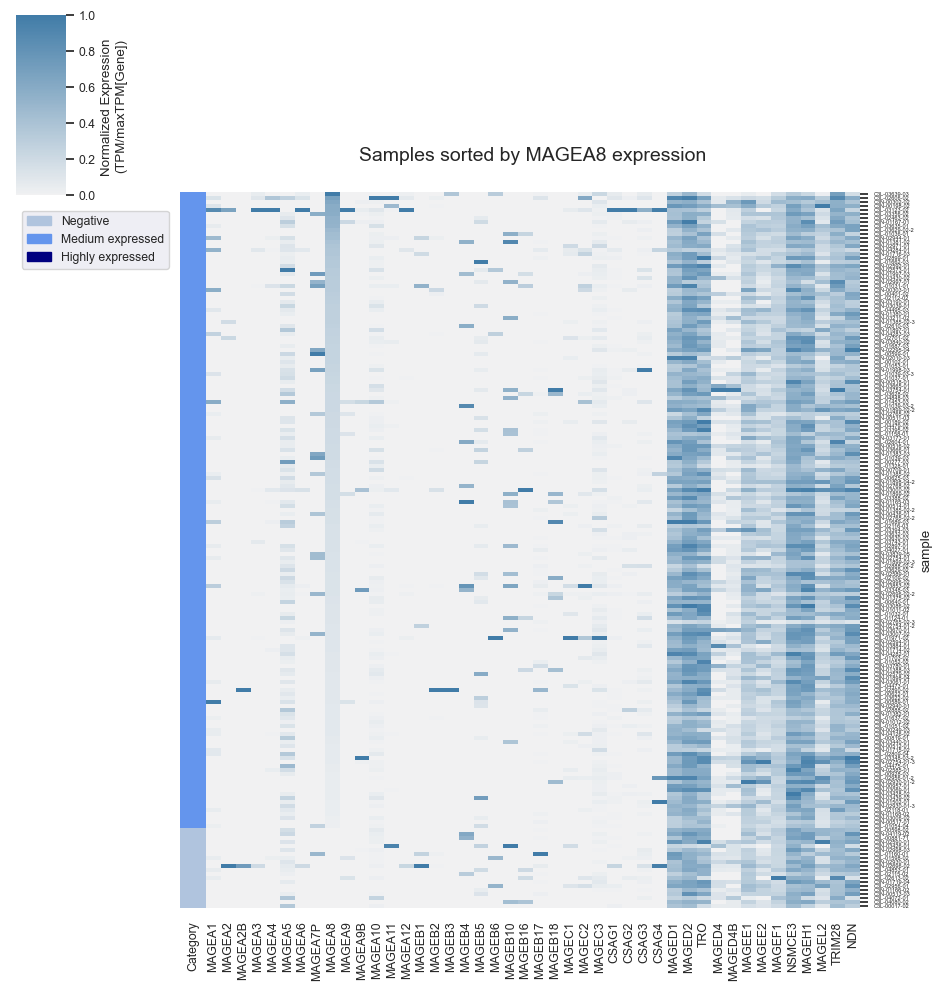

In [25]:
# Define the diverging color palette
custom_cmap = sns.diverging_palette(0, 240, as_cmap=True)
# Sort the DataFrame based on GeneName column
sorted_df_numeric = df_numeric.sort_values(by=GeneName, ascending=False)
# Group rows into categories based on sorted values of GeneName
sorted_df_numeric['Category'] = pd.cut(sorted_df_numeric[GeneName], bins=[-np.inf, PosNegCriteria, cutoff_value, np.inf], labels=['Negative', 'Medium expressed', 'Highly expressed'])
# Map categories to colors
color_map = {'Negative': 'lightsteelblue', 'Medium expressed': 'cornflowerblue', 'Highly expressed': 'navy'}
# Convert category labels to colors
row_colors = sorted_df_numeric['Category'].map(color_map)
# Define function to normalize columns except 'Category'
def normalize_column(col):
    if col.name != 'Category':
        return (col) / (col.max())
    else:
        return col
# Normalize expression values except 'Category'
normalized_df = sorted_df_numeric.apply(normalize_column, axis=0)
normalized_df.to_csv(os.path.join(toData_directory, f'SortedExpression_{GeneName}_Heatmap.csv'))
# Set font scale
sns.set(font_scale=0.8)
# Create the heatmap
g = sns.clustermap(normalized_df.drop('Category', axis=1), center=0, cbar_kws={'label': 'Normalized Expression \n(TPM/maxTPM[Gene])'}, row_cluster=False, col_cluster=False, xticklabels=True, yticklabels=True, cmap=custom_cmap, row_colors=row_colors )
# Set font size for y-axis labels
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=3)
# Set tick parameters
g.ax_heatmap.tick_params(axis='y', which='major', labelsize=4)
# Add text annotation indicating the ordering using GeneName
g.ax_heatmap.text(0.5, 1.05, 'Samples sorted by ' + GeneName + ' expression', horizontalalignment='center', verticalalignment='center', transform=g.ax_heatmap.transAxes, fontsize=14)
# Create a color bar for the category labels
color_bar = sns.color_palette([color_map[x] for x in ['Negative', 'Medium expressed', 'Highly expressed']])
legend = plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in color_bar], labels=color_map.keys(), bbox_to_anchor=(0.000000000001, -0.05), loc='upper left')
# Show the plot
plt.savefig(os.path.join(toPlots_directory, f'SortedExpression_{GeneName}_Heatmap.png'), dpi=300)  # Save as PNG with high quality
plt.show()

<h1><font color="#004D7F" size=4>3.4. Kaplan-Meier curve.</font></h1>

In [26]:
def find_optimal_cutoff_forKM(df, genes, value):
    # Select only the columns corresponding to the genes
    df_subset = df[genes]
    print("Name of gene:", genes)
    #print("Shape of df_subset:", df_subset.shape)
    # Drop rows under positive/negative threshold
    df_subset = df_subset[(df_subset > value).any(axis=1)].dropna()
    # Fit an exponential distribution to the data
    params = expon.fit(df_subset.values.ravel())
    # Generate samples from the fitted distribution
    samples = expon.rvs(*params, size=1000)
    # Cluster the samples using DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(samples.reshape(-1, 1))
    unique_labels, counts = np.unique(labels, return_counts=True)
    #print("Finding optimal cutoff...")
    # Check if there are at least two clusters
    if len(unique_labels) >= 2:
        # Sort clusters by size
        sorted_clusters = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
        # Calculate the difference between the means of the two largest clusters
        cluster1_indices = np.where(labels == sorted_clusters[0][0])[0]
        cluster2_indices = np.where(labels == sorted_clusters[1][0])[0]
        cluster1_mean = np.mean(samples[cluster1_indices])
        cluster2_mean = np.mean(samples[cluster2_indices])
        diff = np.abs(cluster1_mean - cluster2_mean)
        # Update optimal cutoff and optimal difference if difference is maximized
        optimal_cutoff = np.min([cluster1_mean, cluster2_mean])
        optimal_diff = diff
        optimal_labels = labels
        min_input = np.min(df_subset)
        max_input = np.max(df_subset)
    else:
        print("No optimal cutoff found greater than PosNegCriteria. Returning default values.")
        return value, None, None, None
    # Sort dataframe based on the selected gene in descending order
    sorted_df = df.sort_values(by=genes[0], ascending=False)
    sample_names = sorted_df.index  # Extract sample names from index
    return optimal_cutoff, optimal_diff, optimal_labels, None

Name of gene: ['MAGEA1']
Name of gene: ['MAGEA2']
Name of gene: ['MAGEA2B']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEA3']
Name of gene: ['MAGEA4']
Name of gene: ['MAGEA5']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEA6']
Name of gene: ['MAGEA7P']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEA8']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEA9']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEA9B']
Name of gene: ['MAGEA10']
Name of gene: ['MAGEA11']
Name of gene: ['MAGEA12']
Name of gene: ['MAGEB1']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['MAGEB2']
Name of gene: ['MAGEB3']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Name of gene: ['

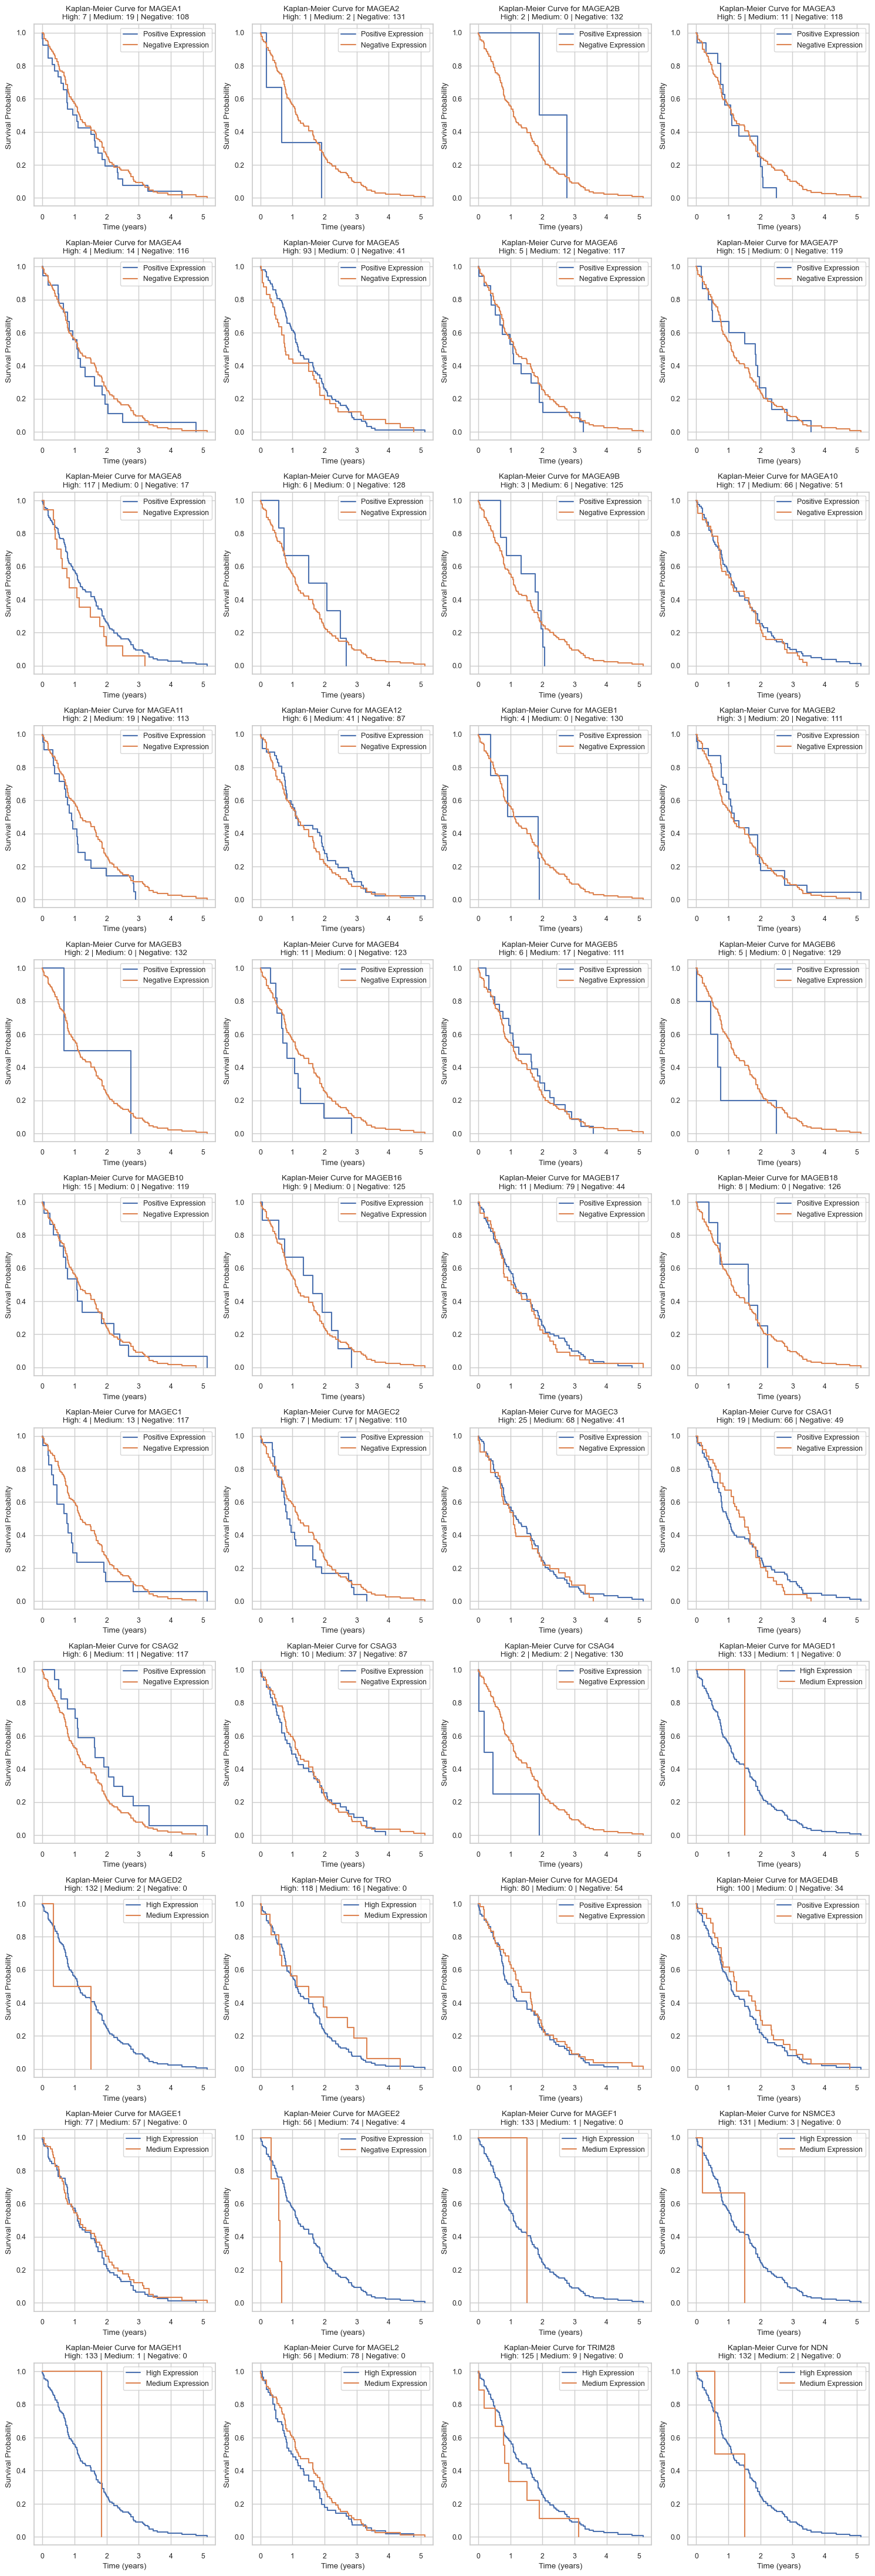

In [27]:
# Drop rows with missing or non-numeric values
df = df.dropna(subset=['days_to_death', 'vital_status'])
df = df[pd.to_numeric(df['days_to_death'], errors='coerce').notnull()]  # Ensure 'days_to_death' contains numeric values
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
# Convert 'vital_status' to categorical values
df['vital_status'] = df['vital_status'].astype('category')
# Plotting
num_cols = 4
num_rows = (len(column_order) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust figure size based on the number of rows
sns.set_style("whitegrid")

# Iterate over each gene column
for i, gene in enumerate(column_order):
    plt.subplot(num_rows, num_cols, i + 1)
    cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff_forKM(df, [gene], 0)
    # Filter the data based on gene expression levels
    high_expr_data = df[df[gene] > cutoff_value]
    medium_expr_data = df[(df[gene] > 0) & (df[gene] <= cutoff_value)]
    negative_expr_data = df[df[gene] == 0]  # Filter for values equal to 0
    #print(f' {high_expr_data.shape[0]},{medium_expr_data.shape[0]},{negative_expr_data.shape[0]}, {high_expr_data.shape[0]+medium_expr_data.shape[0]+negative_expr_data.shape[0]}' )
    # Check if there are no negative expression data points
    if negative_expr_data.shape[0] == 0:
        # Fit the Kaplan-Meier curve for high expression data
        kmf = KaplanMeierFitter()
        kmf.fit(durations=high_expr_data['days_to_death']/365, event_observed=high_expr_data['vital_status'] == 'Dead', label='High Expression')
        kmf.plot(ci_show=False)
        # Fit the Kaplan-Meier curve for medium expression data if there are entries
        if not medium_expr_data.empty:
            kmf.fit(durations=medium_expr_data['days_to_death']/365, event_observed=medium_expr_data['vital_status'] == 'Dead', label='Medium Expression')
            kmf.plot(ci_show=False)
    else:
        positive_expr_data = pd.concat([high_expr_data, medium_expr_data])
        # Create a KaplanMeierFitter object
        kmf = KaplanMeierFitter()
        # Fit the Kaplan-Meier curve for positive expression data
        kmf.fit(durations=positive_expr_data['days_to_death']/365, event_observed=positive_expr_data['vital_status'] == 'Dead', label='Positive Expression')
        kmf.plot(ci_show=False)
        if not negative_expr_data.empty:
            kmf.fit(durations=negative_expr_data['days_to_death']/365, event_observed=negative_expr_data['vital_status'] == 'Dead', label='Negative Expression')
            kmf.plot(ci_show=False)

    # Add labels and title
    plt.xlabel('Time (years)')
    plt.ylabel('Survival Probability')
    plt.title(f'Kaplan-Meier Curve for {gene} \n High: {high_expr_data.shape[0]} | Medium: {medium_expr_data.shape[0]} | Negative: {negative_expr_data.shape[0]}')
    # Add legend
    plt.legend()
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.savefig(os.path.join(toPlots_directory, f'Kaplan-Meier.png'), dpi=300)  # Save as PNG with high quality
plt.show()

<h1><font color="#004D7F" size=5>4. DEA experimental design </font></h1>

In [30]:
################ CREATING FILES TO DEA  ##############################################
data_raw= pd.read_csv(dataset_raw, sep=',',index_col=0)
raw = pd.DataFrame(data_raw)
transposed_raw= raw.transpose()
columnExample= ["MAGEA1"]
# Iterate over each gene column
for i, gene in enumerate(column_order):
    cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff_forKM(df, [gene], 0)
    # Filter the data based on gene expression levels
    high_expr_data = df[df[gene] > cutoff_value]
    medium_expr_data = df[(df[gene] > 0) & (df[gene] <= cutoff_value)]
    negative_expr_data = df[df[gene] == 0]
    minimumSamples=3 # minimum of samples per category to perform DEA
    if cutoff_value ==0:
        if int(negative_expr_data.shape[0]) >= minimumSamples:
            positive_expr_data = pd.concat([high_expr_data, medium_expr_data])
            print(f'Creating Negative ({negative_expr_data.shape[0]}) vs Positive ({positive_expr_data.shape[0]}) cls file')
            # obtaining samples names
            positiveSamples=positive_expr_data.index
            negativeSamples=negative_expr_data.index
            #Creating dataframes
            negativesdf=pd.DataFrame(negativeSamples)
            negativesdf['condition']= 'Control'
            positivesdf= pd.DataFrame(positiveSamples)
            positivesdf['condition']= 'Treatment'
            #merging and writing to csv
            combined_df = pd.concat([negativesdf, positivesdf], ignore_index=True)
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsPOS_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsPOS_RAW.csv")
            TotalIndex = combined_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)
            combined_df.to_csv(filename, index=False)
            print(f'Combined data has been written to: {filename} \n')
        else:
            print(f'Please modify positive/negative cutoff to have at least 3 samples per category. Current: {negative_expr_data.shape[0]} negative samples and {positive_expr_data.shape[0]} positive samples\n')
    else:  
        if medium_expr_data.shape[0] >=minimumSamples and high_expr_data.shape[0] >=minimumSamples and negative_expr_data.shape[0] >=minimumSamples: #all categories accomplished
            print(f'Creating Medium ({medium_expr_data.shape[0]})  vs High ({high_expr_data.shape[0]}), Negative ({negative_expr_data.shape[0]}) vs High ({high_expr_data.shape[0]}), and Negative ({negative_expr_data.shape[0]}) vs Medium ({medium_expr_data.shape[0]})cls files')
             # obtaining samples names
            highSamples=high_expr_data.index
            mediumSamples = medium_expr_data.index
            negativeSamples=negative_expr_data.index
            #merging and writing to csv
            mediumdf=pd.DataFrame(mediumSamples)
            mediumdf['condition']= 'Control'
            highdf= pd.DataFrame(highSamples)
            highdf['condition']= 'Treatment'
            combined_df = pd.concat([mediumdf, highdf], ignore_index=True)
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_MEDvsHIG_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_MEDvsHIG_RAW.csv")
            TotalIndex = combined_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)        
            combined_df.to_csv(filename, index=False)
            print(f'Combined data has been written to: {filename}')
            
            negativesdf=pd.DataFrame(negativeSamples)
            negativesdf['condition']= 'Control'
            highdf= pd.DataFrame(highSamples)
            highdf['condition']= 'Treatment'
            combined2_df = pd.concat([negativesdf, highdf], ignore_index=True)
            print(f'{combined2_df}')
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsHIG_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsHIG_RAW.csv")
            TotalIndex = combined2_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)
            combined2_df.to_csv(filename, index=False)

            negativesdf=pd.DataFrame(negativeSamples)
            negativesdf['condition']= 'Control'
            mediumdf=pd.DataFrame(mediumSamples)
            mediumdf['condition']= 'Treatment'
            combined3_df = pd.concat([negativesdf, mediumdf], ignore_index=True)
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsMED_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsMED_RAW.csv")
            TotalIndex = combined3_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)
            combined3_df.to_csv(filename, index=False)
            print(f'Combined data has been written to: {filename}\n')
            
        elif medium_expr_data.shape[0] <minimumSamples or high_expr_data.shape[0] <minimumSamples and negative_expr_data.shape[0] >=minimumSamples: #medium or high are insufficient
            positive_expr_data = pd.concat([high_expr_data, medium_expr_data])
            print(f'Creating Negative ({negative_expr_data.shape[0]}) vs Positive ({positive_expr_data.shape[0]}) cls file due to small (<3) sample size for High ({high_expr_data.shape[0]}) or Medium ({medium_expr_data.shape[0]}) categories')        
            # obtaining samples names
            positiveSamples=positive_expr_data.index
            negativeSamples=negative_expr_data.index
            #Creating dataframes
            negativesdf=pd.DataFrame(negativeSamples)
            negativesdf['condition']= 'Control'
            positivesdf= pd.DataFrame(positiveSamples)
            positivesdf['condition']= 'Treatment'
            #merging and writing to csv
            combined_df = pd.concat([negativesdf, positivesdf], ignore_index=True)
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsPOS_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_NEGvsPOS_RAW.csv")
            TotalIndex = combined_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)
            combined_df.to_csv(filename, index=False)
            print(f'Combined data has been written to: {filename}\n')
        elif negative_expr_data.shape[0] <minimumSamples and (medium_expr_data.shape[0] <minimumSamples or high_expr_data.shape[0] <minimumSamples): #Only medium or only High
            print(f'Please modify positive/negative cutoff to have at least 3 samples per category. Current: {negative_expr_data.shape[0]} negative, {medium_expr_data.shape[0]} medium ,and {high_expr_data.shape[0]} high samples\n')
        else: #Case for typical Type 2 gene (Negative <3 and samples are into High and medium)
            print(f'Creating High ({high_expr_data.shape[0]}) vs Medium ({medium_expr_data.shape[0]}) cls file due to small (<3) sample size for Negative category ({negative_expr_data.shape[0]})')
            # obtaining samples names
            highSamples=high_expr_data.index
            mediumSamples = medium_expr_data.index
            #Creating dataframes
            mediumdf=pd.DataFrame(mediumSamples)
            mediumdf['condition']= 'Control'
            highdf= pd.DataFrame(highSamples)
            highdf['condition']= 'Treatment'
            #merging and writing to csv
            combined_df = pd.concat([mediumdf, highdf], ignore_index=True)
            filename=os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_MEDvsHIG_DES.csv")
            filename_raw= os.path.join(deainput_directory, f"{formatted_date}_TCGA_{projectName}_{gene}_MEDvsHIG_RAW.csv")
            TotalIndex = combined_df['sample']
            transposed_sorted = transposed_raw[TotalIndex]
            transposed_sorted.to_csv(filename_raw, index=True)
            combined_df.to_csv(filename, index=False)
            print(f'Combined data has been written to: {filename}\n')

Name of gene: ['MAGEA1']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Creating Negative (108) vs Positive (26) cls file
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_MAGEA1_NEGvsPOS_DES.csv 

Name of gene: ['MAGEA2']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Creating Negative (131) vs Positive (3) cls file
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_MAGEA2_NEGvsPOS_DES.csv 

Name of gene: ['MAGEA2B']
No optimal cutoff found greater than PosNegCriteria. Returning default values.
Creating Negative (132) vs Positive (2) cls file
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240

Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_MAGEB1_NEGvsPOS_DES.csv 

Name of gene: ['MAGEB2']
Creating Medium (20)  vs High (3), Negative (111) vs High (3), and Negative (111) vs Medium (20)cls files
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_MAGEB2_MEDvsHIG_DES.csv
           sample  condition
0    C3L-00102-01    Control
1    C3L-00189-02    Control
2    C3L-00277-03    Control
3    C3L-00598-02    Control
4    C3L-00599-01    Control
..            ...        ...
109  C3N-04126-02    Control
110  C3N-04284-01    Control
111  C3L-02890-02  Treatment
112  C3N-00303-01  Treatment
113  C3N-03000-02  Treatment

[114 rows x 2 columns]
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC

Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_MAGEC3_NEGvsMED_DES.csv

Name of gene: ['CSAG1']
Creating Medium (65)  vs High (20), Negative (49) vs High (20), and Negative (49) vs Medium (65)cls files
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Input\240502_TCGA_CPTAC-3_CSAG1_MEDvsHIG_DES.csv
            sample  condition
0     C3L-00102-01    Control
1     C3L-00277-03    Control
2     C3L-00401-02    Control
3     C3L-00598-02    Control
4     C3L-00599-01    Control
..             ...        ...
64    C3N-02696-02  Treatment
65  C3N-02696-02-2  Treatment
66    C3N-03439-02  Treatment
67    C3N-03853-02  Treatment
68    C3N-04284-01  Treatment

[69 rows x 2 columns]
Combined data has been written to: C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TC

In [46]:
# Check if the directory exists
if not os.path.exists(deainput_directory):
    print(f"Error: The directory '{deainput_directory}' does not exist.")
else:
    # Get a sorted list of files
    files = sorted(os.listdir(deainput_directory))

    # Check if you have permission to write in the current directory
    try:
        with open(os.path.join(deainput_directory, 'directory_mapping.csv'), 'w') as file:
            # Initial flag for pairing files
            flag = True
            # Loop through the sorted files
            for f in files:
                if flag:
                    # Capture the first file of the pair
                    m1 = f
                    flag = False
                    # Extract the output name from the first file name, before an underscore
                    out = f.split('_DES')[0]
                else:
                    # Write the constructed string for the pair to the file
                    file.write(f"{deainput_directory}/{m1},{deainput_directory}/{f},{deaoutput_directory}/{out}\n")
                    # Reset the flag to capture the next pair
                    flag = True
        print(f"File 'directory_mapping.csv' created successfully in {deaoutput_directory}")
    except PermissionError:
        print(f"Permission denied: Unable to write to the directory {deaoutput_directory}")

File 'directory_mapping.csv' created successfully in C:\Users\TTUSVM\Documents\TCGA2\240502_TCGA_CPTAC-3_Output\240502_TCGA_CPTAC-3_DEA\240502_TCGA_CPTAC-3_DEA_Output


<h1><font color="#004D7F" size=5>5. Normal-tissue subset analysis </font></h1>

<h1><font color="#004D7F" size=4>5.1. Creating directory data structure </font></h1>

In [ ]:
# Get the current working directory
working_directory = os.getcwd()
print(working_directory)
# Get the current date
current_date = datetime.now()
# Format the date as YYMMDD
formatted_date = current_date.strftime('%y%m%d')
# Define directory paths
output_directory = os.path.join(working_directory, f"{formatted_date}_TCGA_{projectName}-normal_Output")
overview_directory = os.path.join(output_directory, f"{formatted_date}_TCGA_{projectName}-normal_Overview")
toPlots_directory = os.path.join(overview_directory, f"{formatted_date}_TCGA_{projectName}-normal_Plots")
#toPlotsCutoff_directory = os.path.join(toPlots_directory, f"{formatted_date}_TCGA_{projectName}-normal_Cutoff")
toData_directory = os.path.join(overview_directory, f"{formatted_date}_TCGA_{projectName}-normal_Data")
#toDataCutoff_directory = os.path.join(toData_directory, f"{formatted_date}_TCGA_{projectName}-normal_Cutoff")
todea_directory = os.path.join(output_directory, f"{formatted_date}_TCGA_{projectName}-normal_DEA")
deainput_directory = os.path.join(todea_directory, f"{formatted_date}_TCGA_{projectName}-normal_DEA_Input")
# Create directories if they don't exist
os.makedirs(output_directory, exist_ok=True)
os.makedirs(overview_directory, exist_ok=True)
os.makedirs(toPlots_directory, exist_ok=True)
#os.makedirs(toPlotsCutoff_directory, exist_ok=True)
os.makedirs(toData_directory, exist_ok=True)
#os.makedirs(toDataCutoff_directory, exist_ok=True)
os.makedirs(todea_directory, exist_ok=True)
os.makedirs(deainput_directory, exist_ok=True)
print("Directories created successfully:")
print(output_directory)
print(overview_directory)
print(toPlots_directory)
print(toPlotsCutoff_directory)
print(toData_directory)
print(toDataCutoff_directory)
print(todea_directory)
print(deainput_directory)

<h1><font color="#004D7F" size=4>1.3. Loading input table </font></h1>

In [ ]:
dataset=input("Enter path for csv file: ") 
#C:\\Users\\TTUSVM\\Documents\\GitHub\\TCGA-TTU\\TC3R\\Input\MAGE-TCGA-GBM_tpm_clinical.csv GBM
#C:/Users/TTUSVM/Documents/TCGA2/Output/240425_TCGA-PAAD/240425_TCGA-PAAD_tpm_clinical.csv   PAAD
#C:\Users\TTUSVM\Documents\TCGA2\Output\240425_CPTAC-3\240425_CPTAC-3_tpm_clinical.csv CPTAC-3
#C:\Users\TTUSVM\Documents\TCGA2\Output\240502_CPTAC-3\240502_CPTAC-3_tpm_clinical.csv CPTAC-3 normal

In [ ]:
# replace empty/invalid values with NaN
data= pd.read_csv(dataset, sep=',')
df = pd.DataFrame(data)
df.replace("\'--", np.nan, inplace=True)
df.replace('not reported', np.nan, inplace=True)
df.replace('Not Reported', np.nan, inplace=True)
df.set_index('sample', inplace=True)
df.head(4)

In [ ]:
# Count of null data points
print(df.isnull().sum())

In [ ]:
# drop columns with >0.8 NaN's
df = df.loc[:, df.isnull().mean() < .5]
df.info()

In [ ]:
df.describe()
# Write DataFrame description to CSV
df.describe().to_csv(os.path.join(toData_directory, 'DescriptiveStatistics.csv'))

<h1><font color="#004D7F" size=5>2. Visualization</font></h1>

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
# Reorder columns based on the provided order
column_order = [
    "MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "TRIM28", "NDN"
]
#df_numeric = df_numeric[column_order]
df_numeric=df_numeric[column_order]

<h1><font color="#004D7F" size=4>2.1 Distribution of TPMs expression.</font></h1>

In [ ]:
# Set colors
colors_pastel = sns.color_palette("Set2")

def plot_gene_histograms_type1(gene_list):
    num_genes = len(gene_list)
    num_rows = (num_genes // 6) + (1 if num_genes % 6 != 0 else 0)  # Calculate number of rows
    plt.figure(figsize=(15, 2 * num_rows))
    for i, gene in enumerate(gene_list, start=1):
        plt.subplot(num_rows, 6, i)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[2], edgecolor='black')
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(toPlots_directory, 'type1_TPM_Expression_histogram.png'), dpi=300)  # Save as PNG with high quality
    plt.show()
    
def plot_gene_histograms_type2(gene_list):
    plt.figure(figsize=(15, 10))
    for gene in gene_list:
        plt.subplot(5, 6, gene_list.index(gene) + 1)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[5], edgecolor='black')  # Using color from palette
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(toPlots_directory, 'type2_TPM_Expression_histogram.png'), dpi=300)  # Save as PNG with high quality
    plt.show()

In [ ]:
Type1 = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9","MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3","CSAG1", "CSAG2", "CSAG3", "CSAG4"]
Type2 = [ "MAGED1", "MAGED2", "TRO","MAGED4", "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "TRIM28", "NDN"]
plot_gene_histograms_type1(Type1)
plot_gene_histograms_type2(Type2)

In [ ]:
dataset_raw='/Users/TTUSVM/Documents/GitHub/TCGA-TTU/TC3R/Input/240328_TCGA-{projectName}_raw-counts.csv'
data_raw= pd.read_csv(dataset_raw, sep=',',index_col=0)
raw = pd.DataFrame(data_raw)
transposed_raw= raw.transpose()
transposed_raw.head()

In [ ]:
print(transposed_raw.shape)
mediumList=['TCGA-02-0047', 'TCGA-02-2486', 'TCGA-06-0125', 'TCGA-06-0129',
       'TCGA-06-0138', 'TCGA-06-0139', 'TCGA-06-0190', 'TCGA-06-0210',
       'TCGA-06-0686', 'TCGA-06-0749', 'TCGA-06-0878', 'TCGA-06-0882',
       'TCGA-06-1804', 'TCGA-06-2557', 'TCGA-06-2564', 'TCGA-06-2565',
       'TCGA-06-2567', 'TCGA-06-2569', 'TCGA-06-2570', 'TCGA-06-5410',
       'TCGA-06-5411', 'TCGA-06-5414', 'TCGA-06-5856', 'TCGA-06-5858',
       'TCGA-06-5859', 'TCGA-12-0616', 'TCGA-12-0618', 'TCGA-12-1597',
       'TCGA-14-1034', 'TCGA-14-1402', 'TCGA-14-1823', 'TCGA-14-1829',
       'TCGA-14-2554', 'TCGA-15-1444', 'TCGA-19-1787', 'TCGA-19-2629',
       'TCGA-26-1442', 'TCGA-26-5132', 'TCGA-26-5134', 'TCGA-26-5135',
       'TCGA-27-1834', 'TCGA-27-1835', 'TCGA-27-2519', 'TCGA-27-2523',
       'TCGA-27-2526', 'TCGA-27-2528', 'TCGA-28-2514', 'TCGA-28-5209',
       'TCGA-28-5213', 'TCGA-28-5215', 'TCGA-28-5218', 'TCGA-28-5220',
       'TCGA-32-1980', 'TCGA-32-1982', 'TCGA-32-2638', 'TCGA-32-4213',
       'TCGA-32-5222', 'TCGA-41-2571', 'TCGA-41-2572', 'TCGA-41-3915',
       'TCGA-41-5651', 'TCGA-76-4926', 'TCGA-76-4927', 'TCGA-76-4931',
       'TCGA-76-4932']

filtercito=transposed_raw[mediumList]
print(filtercito.shape)
filtercito.head()
filtercito.to_csv('cositohermoso', index=True)